In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

On this notebook the best pipeline for this classifier on dataset MIT-BIHArrhythmiaDatabase.csv has been applied on the entire dataset (merge of the four datasets)

In [2]:
df_cardio=pd.read_csv("C:/Users/matte/DataMiningJupyter/projectDM/datasets/preprocessed_dataset/dataset_Normalized.csv")

In [3]:
columns = df_cardio.columns.tolist()
columns.remove(columns[0])
df_cardio=df_cardio[columns]

In [4]:
df_cardio

patient  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0           133   0.0 -0.137054  -0.079354  0.069610 -0.083281  0.614133   
1           133   0.0 -0.079249  -0.050451 -0.097030  0.597254 -0.078704   
2           133   0.0 -0.050346  -1.900223  0.109399  0.680528 -0.010649   
3           133   2.0 -1.900120   1.828223  0.176376  0.256431 -0.101098   
4           133   0.0  1.828330  -0.079354  0.585577  0.607461 -0.083499   
...         ...   ...       ...        ...       ...       ...       ...   
711419       54   0.0 -4.460816  -0.429158 -0.345439  1.086720 -0.213846   
711420       54   0.0 -0.438464  -2.857743  0.095040  0.804837  0.211167   
711421       54   0.0 -6.918920  -7.383744  1.603278 -0.518048 -0.531231   
711422       54   0.0 -5.578136  -4.072036 -0.942216 -1.074539 -0.955163   
711423       54   0.0 -5.354672  -5.065549  1.085070 -0.027911  0.284400   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.392761  0.047159            15.0  ... -0.023370            14.0   
1      -0.078704 -0.137781             3.0  ...  0.081637            15.0   
2      -0.010649 -0.720620             6.0  ... -0.148539            33.0   
3      -0.707525 -0.101098             4.0  ...  0.046898            21.0   
4      -0.083499 -0.167858             3.0  ... -0.112552            32.0   
...          ...       ...             ...  ...       ...             ...   
711419 -0.213846 -0.699650            24.0  ... -0.443458             1.0   
711420  0.211167  0.008211             4.0  ... -0.224660            50.0   
711421 -0.531231 -1.296207            16.0  ...  0.521029             8.0   
711422 -1.249941 -0.955163             7.0  ...  0.940757            73.0   
711423 -0.402152  0.284400            70.0  ...  0.229242            21.0   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                 3.0           23.0            6.0     -0.023370   
1                 5.0           27.0            7.0      0.081637   
2                13.0           52.0            6.0     -0.148539   
3                 9.0           34.0            4.0      0.046898   
4                 5.0           43.0            6.0     -0.112552   
...               ...            ...            ...           ...   
711419            8.0           29.0           20.0     -0.443458   
711420            9.0           67.0            8.0     -0.224660   
711421            6.0           39.0           25.0      0.521029   
711422            6.0          115.0           36.0      0.940757   
711423           14.0           39.0            4.0      0.229242   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          -0.011650      0.082608      0.101373     -0.183387  
1           0.102992      0.191225      0.217544     -0.068248  
2          -0.060620      0.081080      0.204400      0.335172  
3           0.083728      0.279512      0.526785      0.450969  
4           0.012989      0.091491      0.134004      0.265232  
...              ...           ...           ...           ...  
711419     -0.443458     -0.443458     -0.443458     -0.443458  
711420     -0.120400     -0.016600      0.028074      0.123550  
711421      0.490847      0.369275      0.281510      0.121812  
711422      1.275964      0.376596     -0.212226     -0.621249  
711423      0.190114      0.158866      0.128646      0.057560  

[711424 rows x 34 columns]

In [5]:
from utils import handle_warning,cross_valid,print_plot,compare_plots,preprocessed_dataset,retrieve_fscore_avg

In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report

pipe_smote_PCA = Pipeline([
        ('sampling', SMOTE(random_state = 123)),
        ('scaler', StandardScaler()),  
        ("pca", PCA()),
        ('classification', KNeighborsClassifier(n_neighbors=10))
    ])
pipe_smote_PCA

Pipeline(steps=[('sampling', SMOTE(random_state=123)),
                ('scaler', StandardScaler()), ('pca', PCA()),
                ('classification', KNeighborsClassifier(n_neighbors=10))])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2238
         1.0       0.30      0.85      0.44        33
         2.0       0.17      1.00      0.29         1

    accuracy                           0.97      2272
   macro avg       0.49      0.94      0.57      2272
weighted avg       0.99      0.97      0.98      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.301075  0.166667   0.96919     0.489247   
recall        0.970956   0.848485  1.000000   0.96919     0.939814   
f1-score      0.985264   0.444444  0.285714   0.96919     0.571808   
support    2238.000000  33.000000  1.000000   0.96919  2272.000000   

           weighted avg  
precision      0.989482  
recall         0.969190  
f1-score       0.977101  
support     2272.000000  


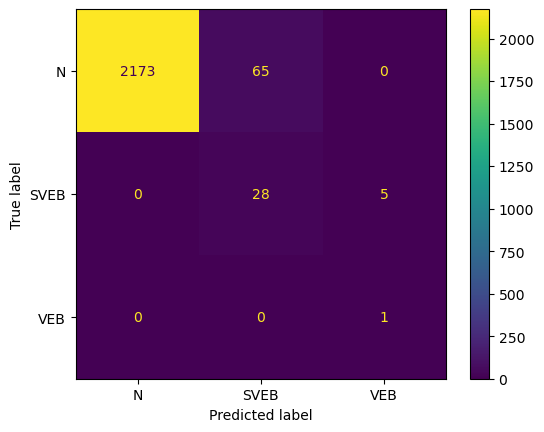

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90      1859
         1.0       0.04      1.00      0.07         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.81      1862
   macro avg       0.35      0.60      0.32      1862
weighted avg       1.00      0.81      0.90      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.036585  0.0  0.814178     0.345528      0.998448
recall        0.813878  1.000000  NaN  0.814178     0.604626      0.814178
f1-score      0.897390  0.070588  NaN  0.814178     0.322660      0.896058
support    1859.000000  3.000000  0.0  0.814178  1862.000000   1862.000000


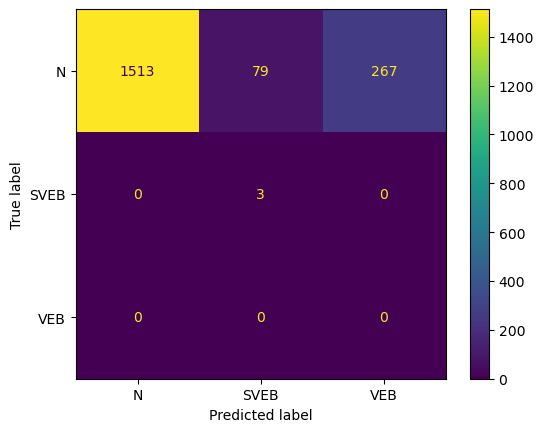

Fold 3:
  Test:  patient=2
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2083
   macro avg       0.33      0.32      0.33      2083
weighted avg       1.00      0.97      0.99      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.972156     0.333333      0.999040
recall        0.973090  0.0  NaN  0.972156     0.324363      0.972156
f1-score      0.986361  0.0  NaN  0.972156     0.328787      0.985414
support    2081.000000  2.0  0.0  0.972156  2083.000000   2083.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

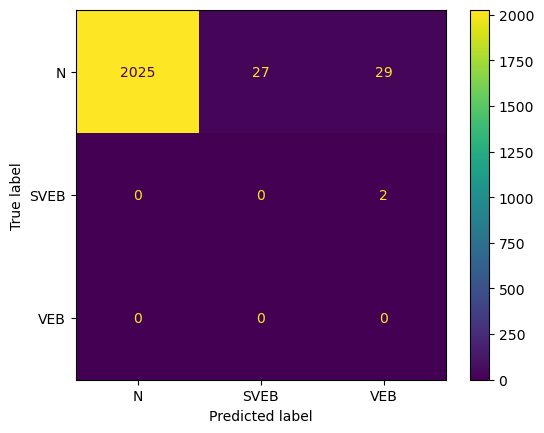

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.22      1.00      0.36        41

    accuracy                           0.92      2566
   macro avg       0.41      0.64      0.44      2566
weighted avg       0.99      0.92      0.95      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.221622  0.919719     0.407207      0.987563
recall        0.918416  NaN   1.000000  0.919719     0.639472      0.919719
f1-score      0.957473  NaN   0.362832  0.919719     0.440102      0.947972
support    2525.000000  0.0  41.000000  0.919719  2566.000000   2566.000000


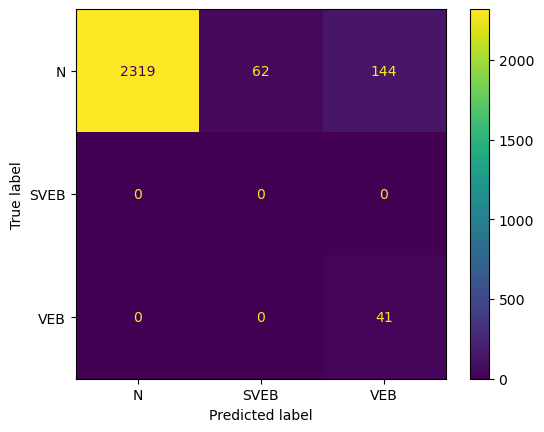

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1506
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.69      0.81       520

    accuracy                           0.92      2026
   macro avg       0.66      0.56      0.60      2026
weighted avg       0.98      0.92      0.94      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.978431  0.0    0.997207  0.915104     0.658546      0.983250
recall        0.994024  NaN    0.686538  0.915104     0.560187      0.915104
f1-score      0.986166  NaN    0.813212  0.915104     0.599793      0.941775
support    1506.000000  0.0  520.000000  0.915104  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

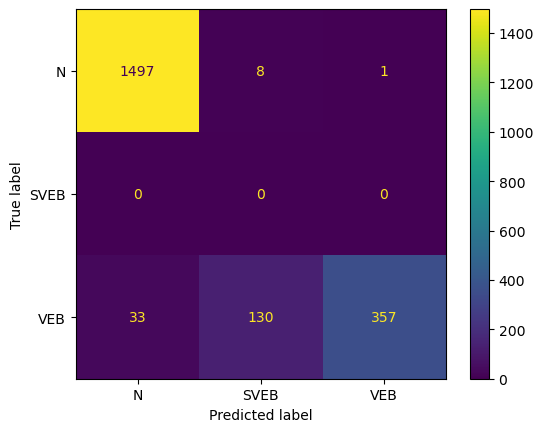

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       1.00      0.52      0.69      1739
         1.0       0.00      0.00      0.00         4
         2.0       0.02      1.00      0.04        17

    accuracy                           0.53      1760
   macro avg       0.34      0.51      0.24      1760
weighted avg       0.99      0.53      0.68      1760

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.021907  0.527273     0.340636      0.988280
recall        0.523864  0.0   1.000000  0.527273     0.507955      0.527273
f1-score      0.687547  0.0   0.042875  0.527273     0.243474      0.679758
support    1739.000000  4.0  17.000000  0.527273  1760.000000   1760.000000


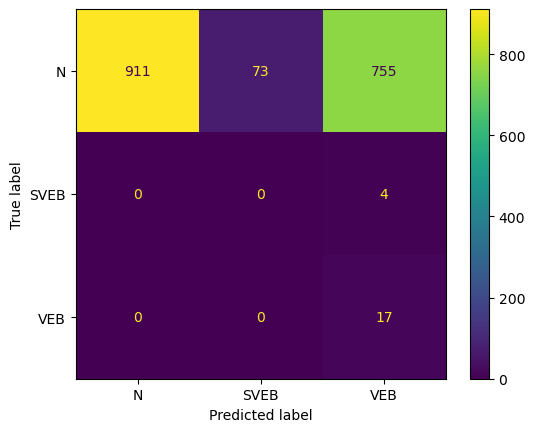

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.09      0.82      0.15        38

    accuracy                           0.86      2529
   macro avg       0.36      0.56      0.36      2529
weighted avg       0.98      0.86      0.91      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998146  0.0   0.085399  0.863582     0.361182      0.984431
recall        0.864312  NaN   0.815789  0.863582     0.560034      0.863582
f1-score      0.926420  NaN   0.154613  0.863582     0.360344      0.914823
support    2491.000000  0.0  38.000000  0.863582  2529.000000   2529.000000


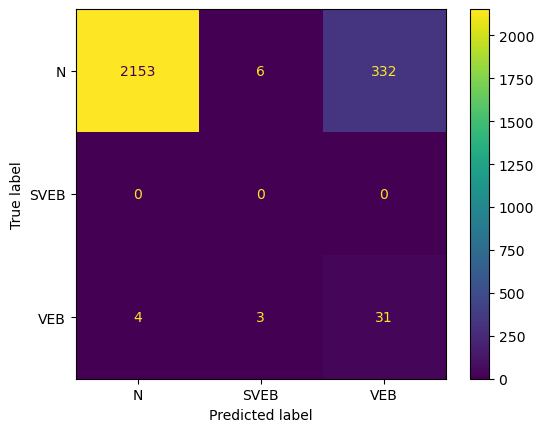

Fold 8:
  Test:  patient=7
              precision    recall  f1-score   support

         0.0       1.00      0.45      0.62      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.00         1

    accuracy                           0.45      2123
   macro avg       0.33      0.48      0.21      2123
weighted avg       1.00      0.45      0.62      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.000928  0.447951     0.333643      0.999529
recall        0.447691  NaN  1.000000  0.447951     0.482564      0.447951
f1-score      0.618490  NaN  0.001854  0.447951     0.206781      0.618199
support    2122.000000  0.0  1.000000  0.447951  2123.000000   2123.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

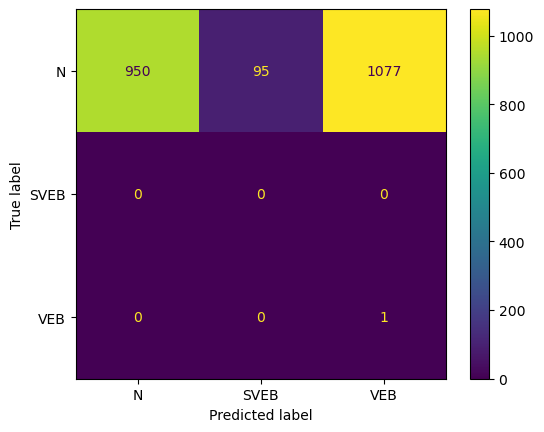

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      2536
         1.0       0.01      1.00      0.01         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.86      2538
   macro avg       0.34      0.62      0.31      2538
weighted avg       1.00      0.86      0.92      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.005814  0.0  0.857368     0.335271      0.999217
recall        0.857256  1.000000  NaN  0.857368     0.619085      0.857368
f1-score      0.923142  0.011561  NaN  0.857368     0.311568      0.922424
support    2536.000000  2.000000  0.0  0.857368  2538.000000   2538.000000


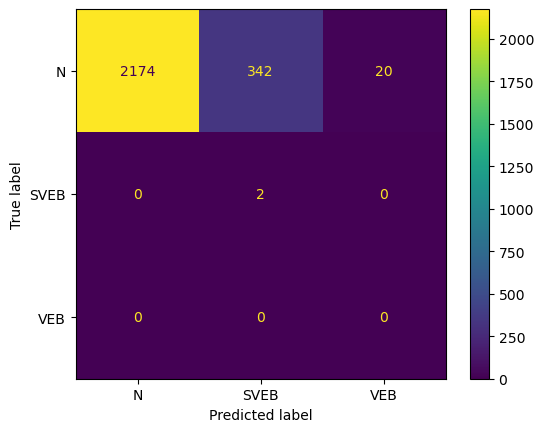

Fold 10:
  Test:  patient=9
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1788
         1.0       0.01      0.17      0.02         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1794
   macro avg       0.34      0.37      0.33      1794
weighted avg       1.00      0.95      0.97      1794

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.010989  0.0  0.946488     0.336996      0.996692
recall        0.949105  0.166667  NaN  0.946488     0.371924      0.946488
f1-score      0.973888  0.020619  NaN  0.946488     0.331502      0.970700
support    1788.000000  6.000000  0.0  0.946488  1794.000000   1794.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

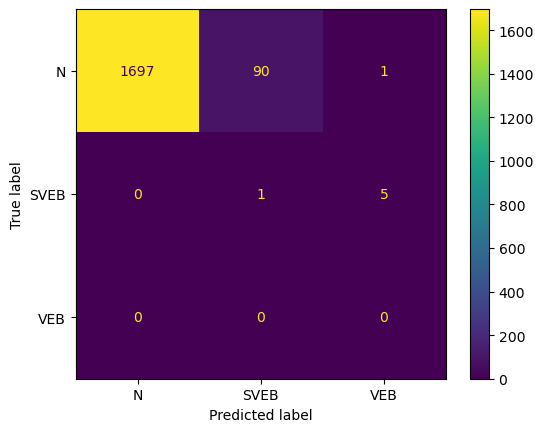

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      1819
         1.0       0.00      0.00      0.00        12
         2.0       0.07      0.49      0.12        43

    accuracy                           0.82      1874
   macro avg       0.35      0.44      0.34      1874
weighted avg       0.96      0.82      0.88      1874

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.988874   0.0   0.065217  0.817503     0.351364      0.961348
recall        0.830676   0.0   0.488372  0.817503     0.439683      0.817503
f1-score      0.902898   0.0   0.115068  0.817503     0.339322      0.879039
support    1819.000000  12.0  43.000000  0.817503  1874.000000   1874.000000


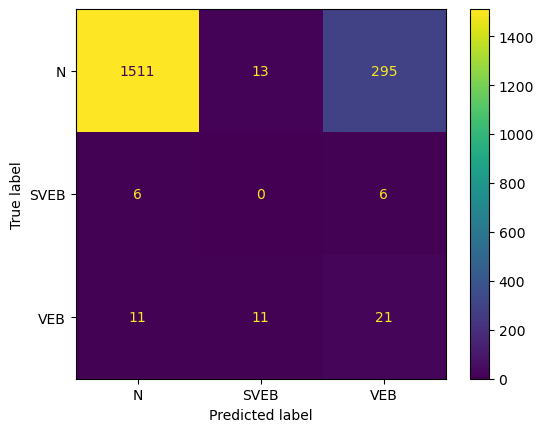

Fold 12:
  Test:  patient=11
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.98      0.99      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.978996     0.333333      1.000000
recall        0.978996  NaN  NaN  0.978996     0.326332      0.978996
f1-score      0.989386  NaN  NaN  0.978996     0.329795      0.989386
support    1952.000000  0.0  0.0  0.978996  1952.000000   1952.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

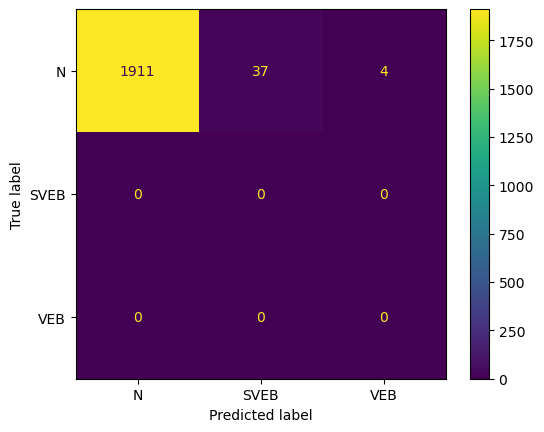

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2301
         1.0       0.00      0.00      0.00         1
         2.0       0.88      0.98      0.93       109

    accuracy                           0.96      2411
   macro avg       0.63      0.65      0.63      2411
weighted avg       0.99      0.96      0.98      2411

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999546  0.0    0.877049  0.958523     0.625532      0.993594
recall        0.957844  0.0    0.981651  0.958523     0.646499      0.958523
f1-score      0.978251  0.0    0.926407  0.958523     0.634886      0.975502
support    2301.000000  1.0  109.000000  0.958523  2411.000000   2411.000000


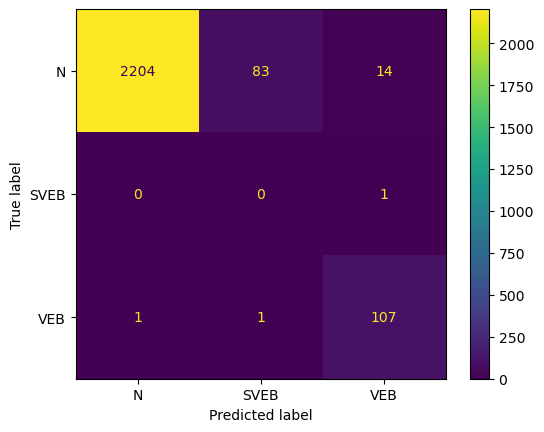

Fold 14:
  Test:  patient=13
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1534
   macro avg       0.33      0.32      0.33      1534
weighted avg       1.00      0.97      0.98      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.968709     0.333333      0.999348
recall        0.969341  0.0  NaN  0.968709     0.323114      0.968709
f1-score      0.984432  0.0  NaN  0.968709     0.328144      0.983790
support    1533.000000  1.0  0.0  0.968709  1534.000000   1534.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

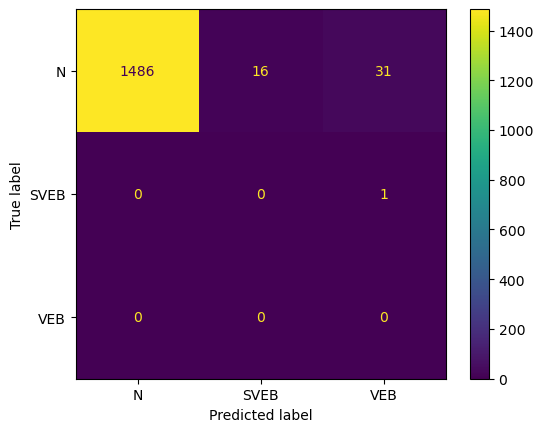

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.95      2165
         1.0       0.64      0.36      0.46        96
         2.0       0.04      0.62      0.08        16

    accuracy                           0.88      2277
   macro avg       0.56      0.63      0.49      2277
weighted avg       0.97      0.88      0.92      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991886   0.636364   0.040000  0.878788     0.556083   
recall        0.903464   0.364583   0.625000  0.878788     0.631016   
f1-score      0.945613   0.463576   0.075188  0.878788     0.494792   
support    2165.000000  96.000000  16.000000  0.878788  2277.000000   

           weighted avg  
precision      0.970209  
recall         0.878788  
f1-score       0.919173  
support     2277.000000  


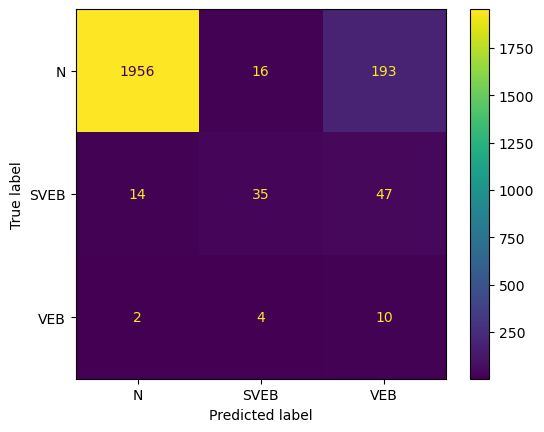

Fold 16:
  Test:  patient=15


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1542
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.82      0.90       444

    accuracy                           0.93      1986
   macro avg       0.65      0.60      0.62      1986
weighted avg       0.96      0.93      0.94      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.951251  0.0    1.000000  0.931017     0.650417      0.962149
recall        0.961738  NaN    0.824324  0.931017     0.595354      0.931017
f1-score      0.956466  NaN    0.903704  0.931017     0.620056      0.944670
support    1542.000000  0.0  444.000000  0.931017  1986.000000   1986.000000


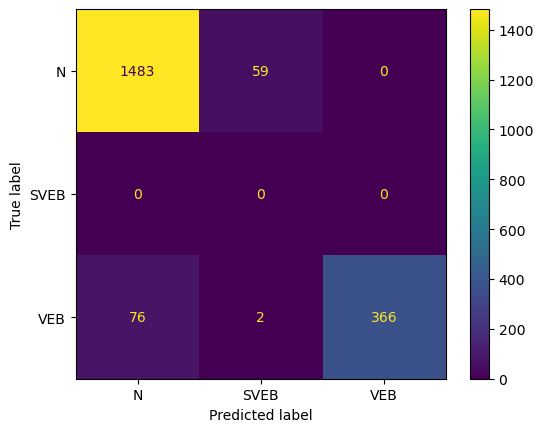

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1860
         1.0       0.07      1.00      0.13         1
         2.0       0.03      1.00      0.05         1

    accuracy                           0.97      1862
   macro avg       0.37      0.99      0.39      1862
weighted avg       1.00      0.97      0.99      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.071429  0.026316  0.973147     0.365915   
recall        0.973118  1.000000  1.000000  0.973147     0.991039   
f1-score      0.986376  0.133333  0.051282  0.973147     0.390330   
support    1860.000000  1.000000  1.000000  0.973147  1862.000000   

           weighted avg  
precision      0.998978  
recall         0.973147  
f1-score       0.985416  
support     1862.000000  


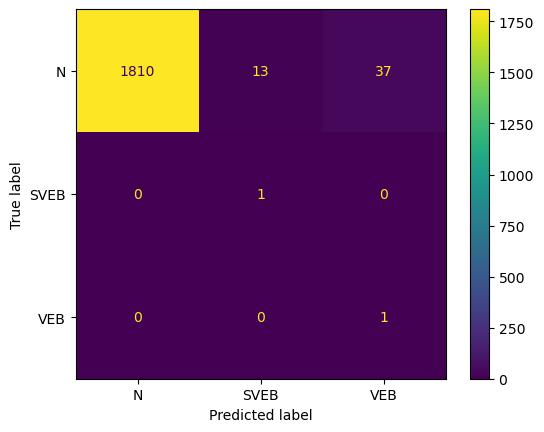

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         1.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.50      0.50      0.50      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.999192     0.500000      1.000000
recall        0.999192  NaN  0.999192     0.499596      0.999192
f1-score      0.999596  NaN  0.999192     0.499798      0.999596
support    2475.000000  0.0  0.999192  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

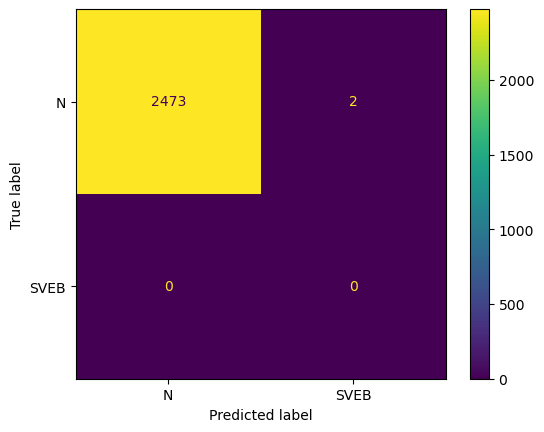

Fold 19:
  Test:  patient=18
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1514
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.33      0.50         3

    accuracy                           0.98      1517
   macro avg       0.67      0.44      0.50      1517
weighted avg       1.00      0.98      0.99      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  1.000000  0.984838     0.666667      1.000000
recall        0.986129  NaN  0.333333  0.984838     0.439821      0.984838
f1-score      0.993016  NaN  0.500000  0.984838     0.497672      0.992041
support    1514.000000  0.0  3.000000  0.984838  1517.000000   1517.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

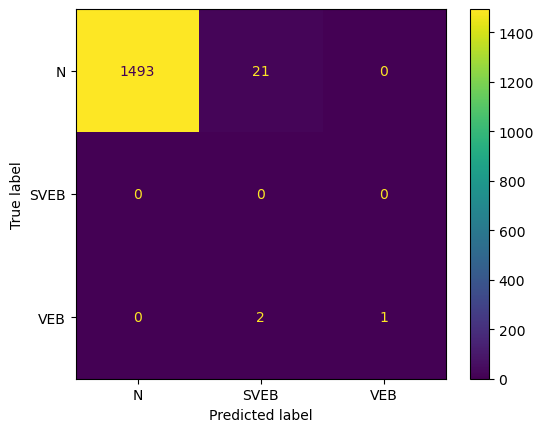

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.98      0.25      0.40      1535
         1.0       0.00      0.00      0.00        31
         2.0       0.03      0.87      0.07        47

    accuracy                           0.27      1613
   macro avg       0.34      0.37      0.16      1613
weighted avg       0.93      0.27      0.38      1613

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.979747   0.0   0.033856  0.265344     0.337868      0.933356
recall        0.252117   0.0   0.872340  0.265344     0.374819      0.265344
f1-score      0.401036   0.0   0.065183  0.265344     0.155406      0.383543
support    1535.000000  31.0  47.000000  0.265344  1613.000000   1613.000000


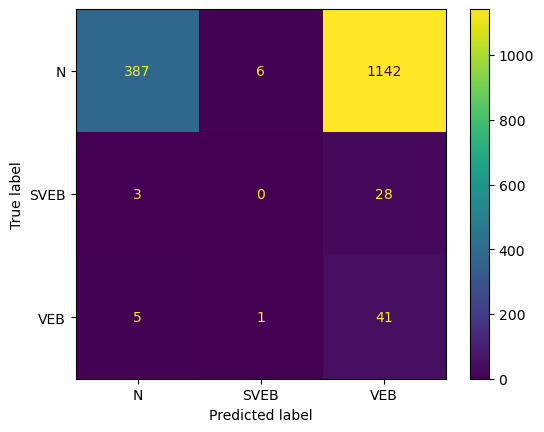

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95      1742
         1.0       0.01      0.03      0.02        30
         2.0       0.93      0.95      0.94       826

    accuracy                           0.93      2598
   macro avg       0.64      0.64      0.64      2598
weighted avg       0.94      0.93      0.94      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.966785   0.014493    0.930012  0.929561     0.637097   
recall        0.935706   0.033333    0.949153  0.929561     0.639397   
f1-score      0.950992   0.020202    0.939485  0.929561     0.636893   
support    1742.000000  30.000000  826.000000  0.929561  2598.000000   

           weighted avg  
precision      0.944097  
recall         0.929561  
f1-score       0.936585  
support     2598.000000  


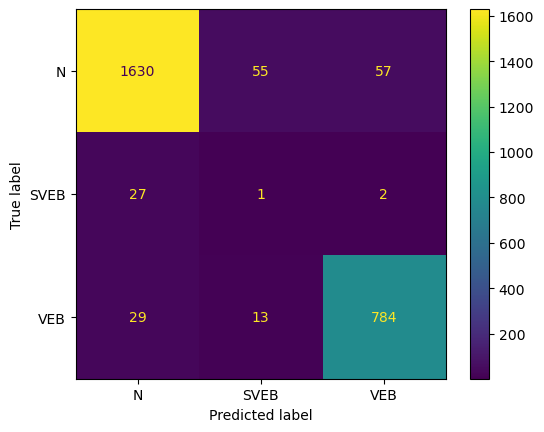

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.98      0.87      0.92      1634
         1.0       0.31      0.51      0.38       128
         2.0       0.60      0.90      0.72       198

    accuracy                           0.85      1960
   macro avg       0.63      0.76      0.67      1960
weighted avg       0.90      0.85      0.87      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.982032    0.305164    0.596667   0.84949     0.627954   
recall        0.869645    0.507812    0.904040   0.84949     0.760499   
f1-score      0.922428    0.381232    0.718876   0.84949     0.674178   
support    1634.000000  128.000000  198.000000   0.84949  1960.000000   

           weighted avg  
precision      0.898898  
recall         0.849490  
f1-score       0.866521  
support     1960.000000  


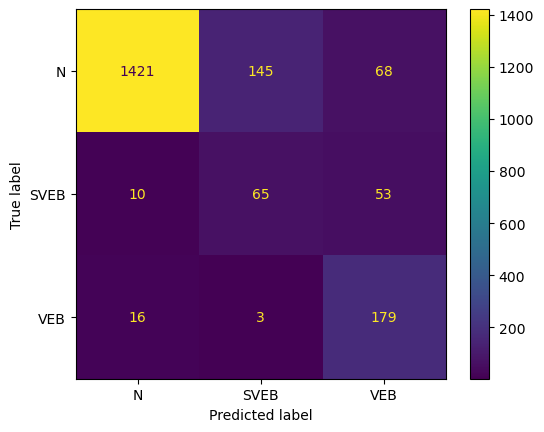

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2060
         1.0       0.66      0.64      0.65        55
         2.0       0.25      0.95      0.39        19

    accuracy                           0.96      2134
   macro avg       0.63      0.85      0.67      2134
weighted avg       0.98      0.96      0.97      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996514   0.660377   0.246575  0.962512     0.634489   
recall        0.971359   0.636364   0.947368  0.962512     0.851697   
f1-score      0.983776   0.648148   0.391304  0.962512     0.674409   
support    2060.000000  55.000000  19.000000  0.962512  2134.000000   

           weighted avg  
precision      0.981174  
recall         0.962512  
f1-score       0.969851  
support     2134.000000  


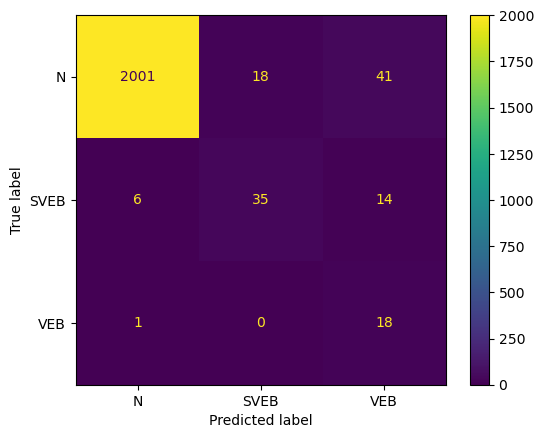

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.99      0.68      0.81      2528
         1.0       0.00      0.50      0.01         2
         2.0       0.42      0.94      0.58       444

    accuracy                           0.72      2974
   macro avg       0.47      0.71      0.47      2974
weighted avg       0.91      0.72      0.77      2974

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.991959  0.004115    0.422222  0.721587     0.472765   
recall        0.683149  0.500000    0.941441  0.721587     0.708197   
f1-score      0.809089  0.008163    0.582985  0.721587     0.466746   
support    2528.000000  2.000000  444.000000  0.721587  2974.000000   

           weighted avg  
precision      0.906236  
recall         0.721587  
f1-score       0.774794  
support     2974.000000  


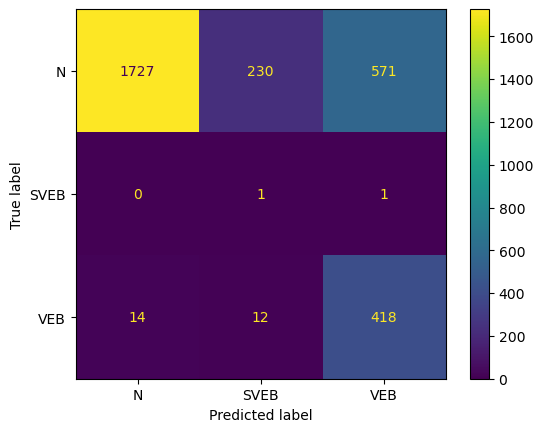

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2570
         1.0       0.05      0.67      0.09         3
         2.0       1.00      0.90      0.95        71

    accuracy                           0.98      2644
   macro avg       0.68      0.85      0.67      2644
weighted avg       1.00      0.98      0.99      2644

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.997634  0.045455   1.000000  0.981846     0.681030   
recall        0.984436  0.666667   0.901408  0.981846     0.850837   
f1-score      0.990991  0.085106   0.948148  0.981846     0.674749   
support    2570.000000  3.000000  71.000000  0.981846  2644.000000   

           weighted avg  
precision      0.996617  
recall         0.981846  
f1-score       0.988813  
support     2644.000000  


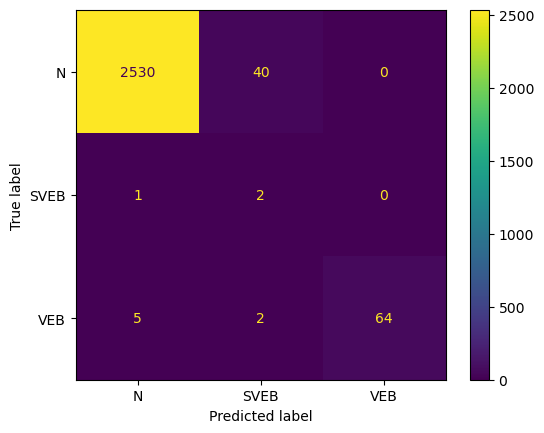

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.90      0.55      0.69      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.13      0.55      0.21       210

    accuracy                           0.52      1859
   macro avg       0.34      0.37      0.30      1859
weighted avg       0.76      0.52      0.59      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.901691    0.0    0.129464  0.521248     0.343719      0.763043
recall        0.552819    0.0    0.552381  0.521248     0.368400      0.521248
f1-score      0.685416    0.0    0.209765  0.521248     0.298394      0.592602
support    1543.000000  106.0  210.000000  0.521248  1859.000000   1859.000000


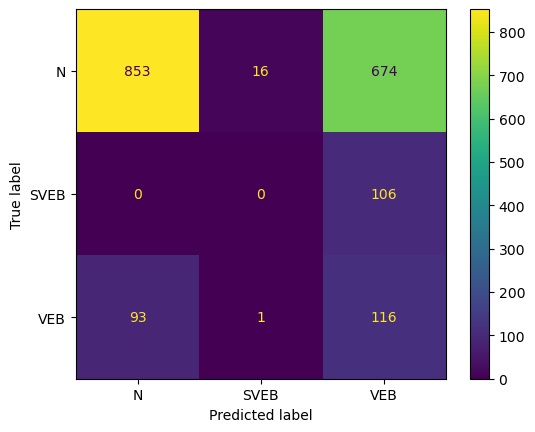

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.82      0.98      0.89      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.97      0.42      0.59       992

    accuracy                           0.76      2579
   macro avg       0.60      0.47      0.49      2579
weighted avg       0.88      0.76      0.77      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.819290  0.0    0.974419  0.761923     0.597903      0.878324
recall        0.975394  0.0    0.422379  0.761923     0.465924      0.761923
f1-score      0.890553  0.0    0.589311  0.761923     0.493288      0.773991
support    1585.000000  2.0  992.000000  0.761923  2579.000000   2579.000000


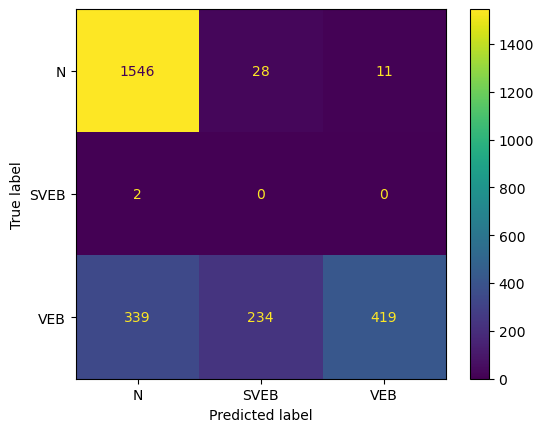

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2620
         1.0       0.79      0.60      0.68       383
         2.0       0.08      1.00      0.14         1

    accuracy                           0.93      3004
   macro avg       0.61      0.86      0.60      3004
weighted avg       0.93      0.93      0.93      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.947758    0.791096  0.076923  0.928762     0.605259   
recall        0.976336    0.603133  1.000000  0.928762     0.859823   
f1-score      0.961835    0.684444  0.142857  0.928762     0.596379   
support    2620.000000  383.000000  1.000000  0.928762  3004.000000   

           weighted avg  
precision      0.927495  
recall         0.928762  
f1-score       0.926196  
support     3004.000000  


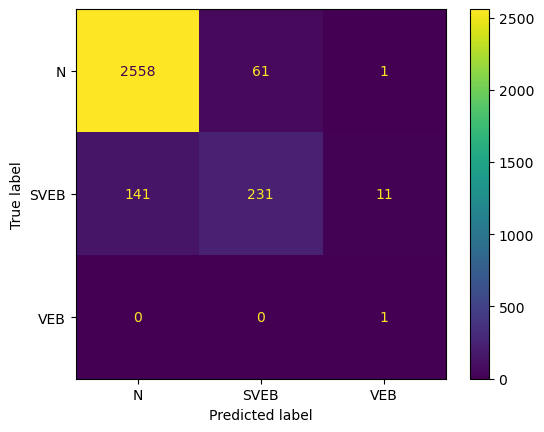

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90      2422
         1.0       0.01      0.05      0.01        22
         2.0       0.34      0.90      0.49       195

    accuracy                           0.82      2639
   macro avg       0.45      0.59      0.47      2639
weighted avg       0.94      0.82      0.86      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.991976   0.008130    0.337165  0.816597     0.445757   
recall        0.816680   0.045455    0.902564  0.816597     0.588233   
f1-score      0.895833   0.013793    0.490934  0.816597     0.466854   
support    2422.000000  22.000000  195.000000  0.816597  2639.000000   

           weighted avg  
precision      0.935389  
recall         0.816597  
f1-score       0.858562  
support     2639.000000  


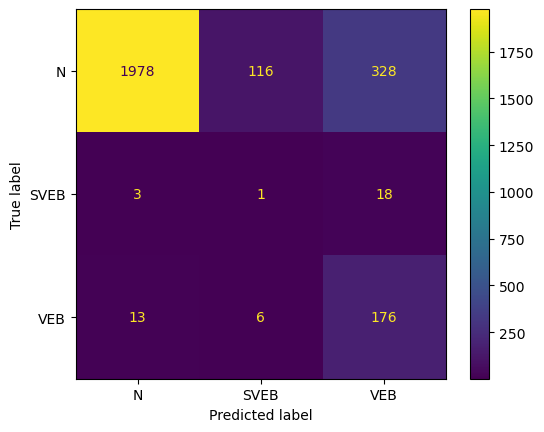

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2747
   macro avg       0.33      0.32      0.33      2747
weighted avg       1.00      0.97      0.98      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.969785     0.333333      1.000000
recall        0.969785  NaN  NaN  0.969785     0.323262      0.969785
f1-score      0.984661  NaN  NaN  0.969785     0.328220      0.984661
support    2747.000000  0.0  0.0  0.969785  2747.000000   2747.000000


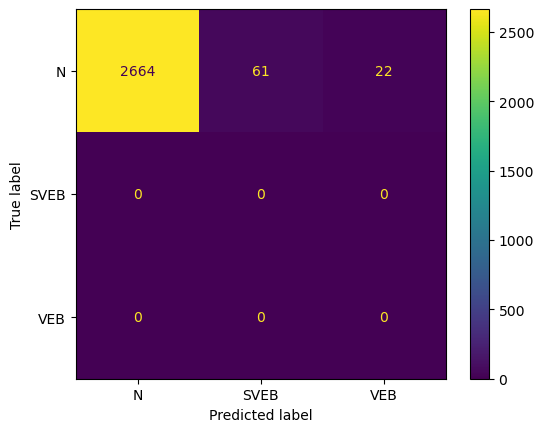

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      2640
         1.0       0.04      0.57      0.07        28
         2.0       0.67      0.52      0.58       220

    accuracy                           0.80      2888
   macro avg       0.55      0.64      0.51      2888
weighted avg       0.93      0.80      0.86      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.958242   0.036199    0.666667  0.799861     0.553703   
recall        0.825758   0.571429    0.518182  0.799861     0.638456   
f1-score      0.887080   0.068085    0.583120  0.799861     0.512762   
support    2640.000000  28.000000  220.000000  0.799861  2888.000000   

           weighted avg  
precision      0.927091  
recall         0.799861  
f1-score       0.855985  
support     2888.000000  


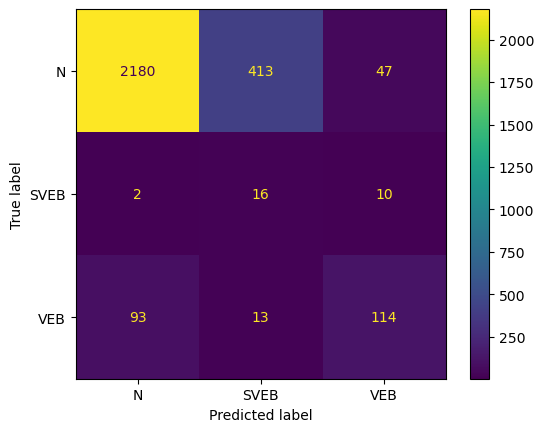

Fold 32:
  Test:  patient=31


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.41      0.58      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.17      0.96      0.30       256

    accuracy                           0.48      2258
   macro avg       0.39      0.46      0.29      2258
weighted avg       0.90      0.48      0.55      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.991637  0.0    0.174189  0.476971     0.388609      0.898959
recall        0.414585  NaN    0.964844  0.476971     0.459810      0.476971
f1-score      0.584713  NaN    0.295102  0.476971     0.293271      0.551878
support    2002.000000  0.0  256.000000  0.476971  2258.000000   2258.000000


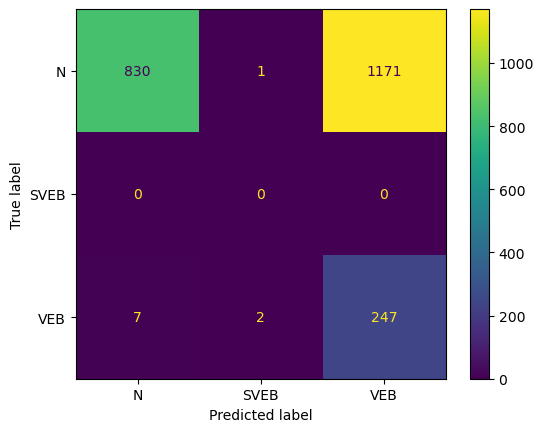

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      0.64      0.78      3194
         1.0       0.00      1.00      0.01         3
         2.0       0.99      0.87      0.93       164

    accuracy                           0.65      3361
   macro avg       0.66      0.84      0.57      3361
weighted avg       0.99      0.65      0.79      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.994668  0.002602    0.986207  0.653972     0.661159   
recall        0.642455  1.000000    0.871951  0.653972     0.838135   
f1-score      0.780673  0.005190    0.925566  0.653972     0.570477   
support    3194.000000  3.000000  164.000000  0.653972  3361.000000   

           weighted avg  
precision      0.993370  
recall         0.653972  
f1-score       0.787051  
support     3361.000000  


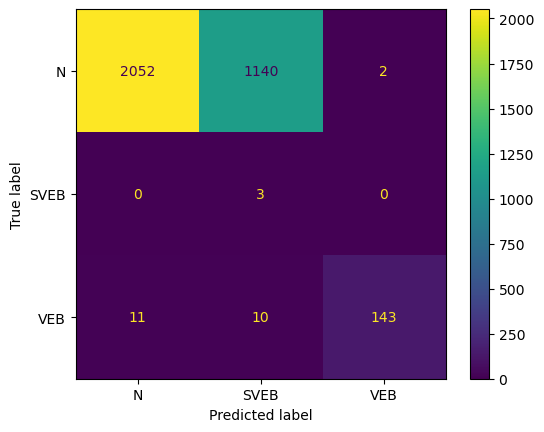

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2081
         1.0       1.00      0.14      0.25         7
         2.0       0.34      0.91      0.50        64

    accuracy                           0.94      2152
   macro avg       0.78      0.67      0.57      2152
weighted avg       0.97      0.94      0.95      2152

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.993942  1.000000   0.341176  0.942379     0.778373   
recall        0.946180  0.142857   0.906250  0.942379     0.665096   
f1-score      0.969473  0.250000   0.495726  0.942379     0.571733   
support    2081.000000  7.000000  64.000000  0.942379  2152.000000   

           weighted avg  
precision      0.974549  
recall         0.942379  
f1-score       0.953044  
support     2152.000000  


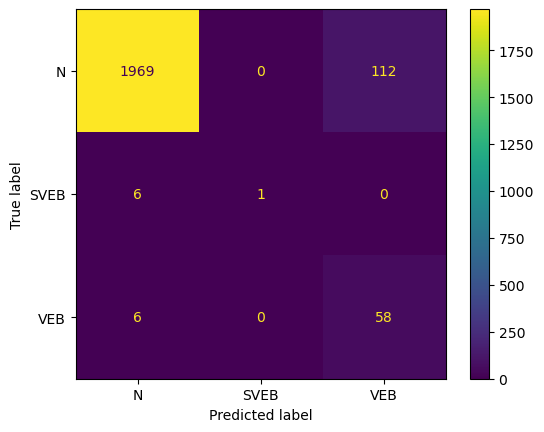

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1953
         1.0       0.90      0.81      0.85        94

    accuracy                           0.99      2047
   macro avg       0.95      0.90      0.92      2047
weighted avg       0.99      0.99      0.99      2047

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.990830   0.904762  0.987298     0.947796      0.986878
recall        0.995904   0.808511  0.987298     0.902207      0.987298
f1-score      0.993361   0.853933  0.987298     0.923647      0.986958
support    1953.000000  94.000000  0.987298  2047.000000   2047.000000


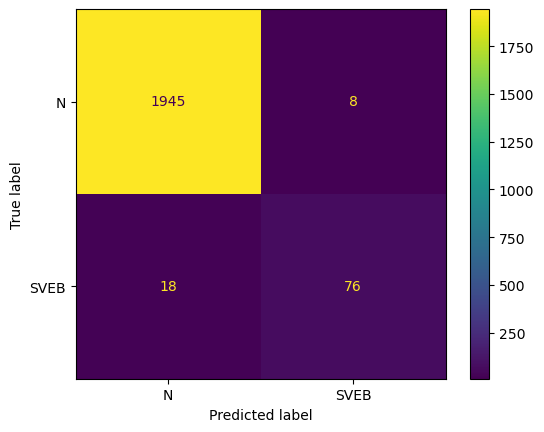

Fold 36:
  Test:  patient=35
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.91      0.27      0.41       396

    accuracy                           0.84      2426
   macro avg       0.61      0.41      0.45      2426
weighted avg       0.92      0.84      0.85      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.923333  0.0    0.913793  0.842951     0.612375      0.921776
recall        0.955172  NaN    0.267677  0.842951     0.407616      0.842951
f1-score      0.938983  NaN    0.414062  0.842951     0.451015      0.853299
support    2030.000000  0.0  396.000000  0.842951  2426.000000   2426.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

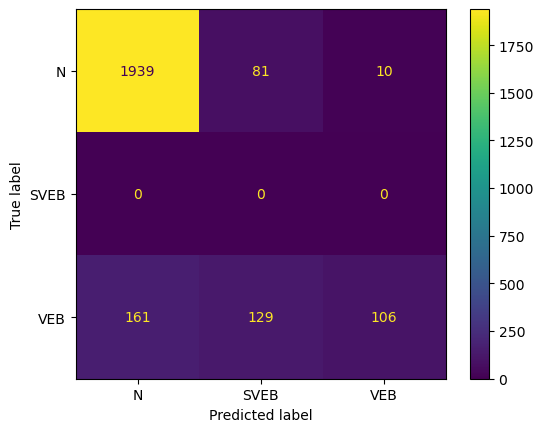

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94      2273
         1.0       0.50      0.33      0.40       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      2482
   macro avg       0.48      0.42      0.45      2482
weighted avg       0.90      0.89      0.90      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.940429    0.500000  0.0  0.892828     0.480143      0.903342
recall        0.944567    0.330144  NaN  0.892828     0.424903      0.892828
f1-score      0.942493    0.397695  NaN  0.892828     0.446729      0.896618
support    2273.000000  209.000000  0.0  0.892828  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

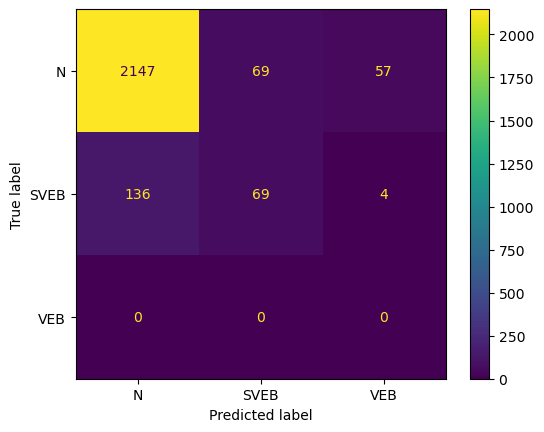

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      2044
         1.0       0.16      0.42      0.23        73
         2.0       0.90      0.68      0.77       473

    accuracy                           0.90      2590
   macro avg       0.67      0.69      0.66      2590
weighted avg       0.93      0.90      0.91      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.969548   0.158163    0.896648  0.898069     0.674786   
recall        0.965753   0.424658    0.678647  0.898069     0.689686   
f1-score      0.967647   0.230483    0.772563  0.898069     0.656898   
support    2044.000000  73.000000  473.000000  0.898069  2590.000000   

           weighted avg  
precision      0.933366  
recall         0.898069  
f1-score       0.911243  
support     2590.000000  


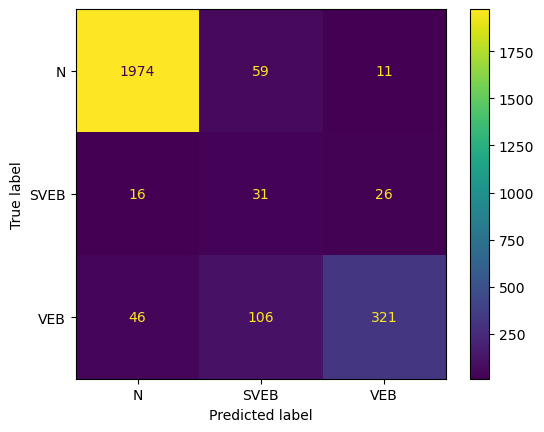

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.89      0.34      0.49      1687
         1.0       0.00      0.00      0.00         3
         2.0       0.16      0.56      0.25       362

    accuracy                           0.38      2052
   macro avg       0.35      0.30      0.25      2052
weighted avg       0.76      0.38      0.45      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.894246  0.0    0.160032  0.378168     0.351426      0.763413
recall        0.340842  0.0    0.555249  0.378168     0.298697      0.378168
f1-score      0.493562  0.0    0.248455  0.378168     0.247339      0.449600
support    1687.000000  3.0  362.000000  0.378168  2052.000000   2052.000000


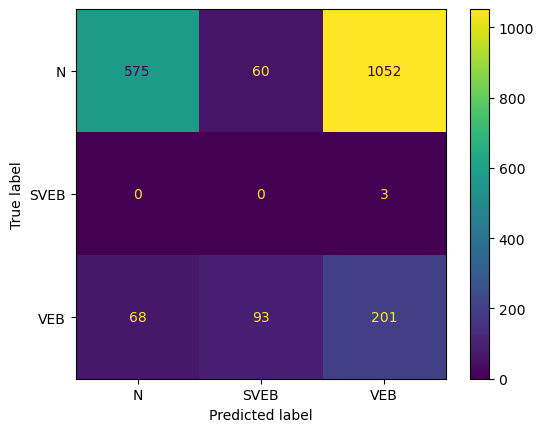

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.01      1.00      0.02         1

    accuracy                           0.89      2255
   macro avg       0.34      0.63      0.32      2255
weighted avg       1.00      0.89      0.94      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.008333  0.886918     0.336111      0.999560
recall        0.886868  NaN  1.000000  0.886918     0.628956      0.886918
f1-score      0.940042  NaN  0.016529  0.886918     0.318857      0.939633
support    2254.000000  0.0  1.000000  0.886918  2255.000000   2255.000000


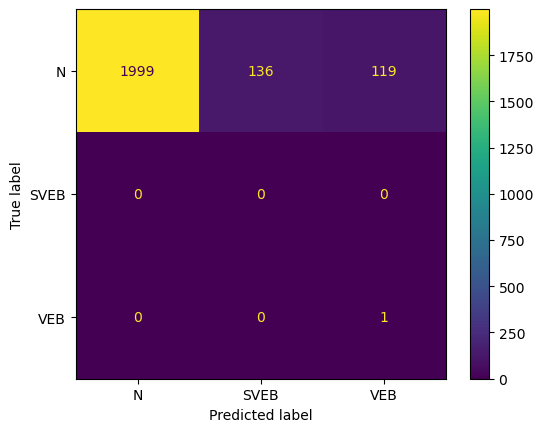

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1567
         1.0       0.01      1.00      0.03         1
         2.0       0.00      0.00      0.00         2

    accuracy                           0.96      1570
   macro avg       0.34      0.65      0.34      1570
weighted avg       1.00      0.96      0.98      1570

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999334  0.014706  0.0  0.956051     0.338013      0.997434
recall        0.957243  1.000000  0.0  0.956051     0.652414      0.956051
f1-score      0.977836  0.028986  0.0  0.956051     0.335607      0.975986
support    1567.000000  1.000000  2.0  0.956051  1570.000000   1570.000000


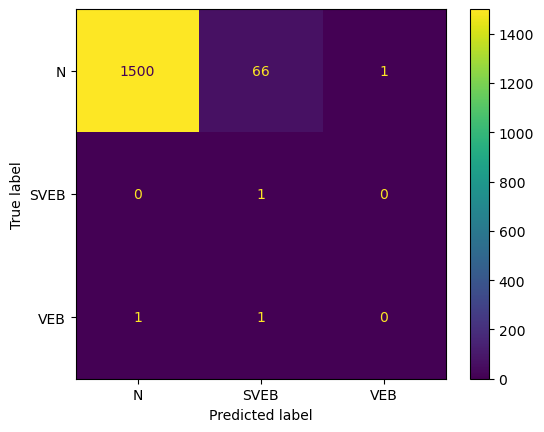

Fold 42:
  Test:  patient=41


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.23      0.99      0.38       398
         1.0       0.94      0.05      0.09      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.26      1779
   macro avg       0.39      0.34      0.16      1779
weighted avg       0.78      0.26      0.15      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.233234     0.941176  0.0  0.256886     0.391470      0.782795
recall       0.987437     0.046343  NaN  0.256886     0.344593      0.256886
f1-score     0.377340     0.088337  NaN  0.256886     0.155226      0.152993
support    398.000000  1381.000000  0.0  0.256886  1779.000000   1779.000000


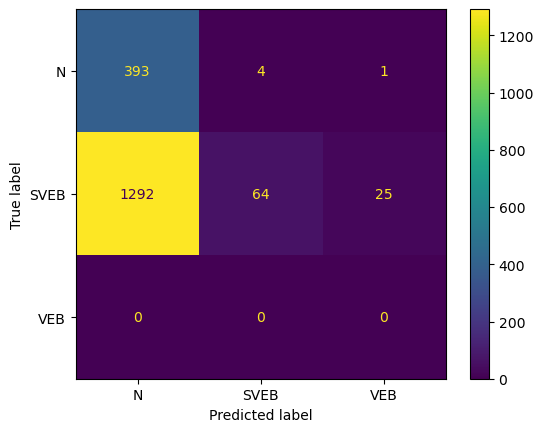

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      2229
         1.0       0.02      0.29      0.03         7
         2.0       0.97      0.85      0.91       831

    accuracy                           0.93      3067
   macro avg       0.65      0.70      0.63      3067
weighted avg       0.96      0.93      0.94      3067

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.961191  0.016949    0.967258  0.926312     0.648466   
recall        0.955585  0.285714    0.853189  0.926312     0.698163   
f1-score      0.958380  0.032000    0.906650  0.926312     0.632343   
support    2229.000000  7.000000  831.000000  0.926312  3067.000000   

           weighted avg  
precision      0.960680  
recall         0.926312  
f1-score       0.942250  
support     3067.000000  


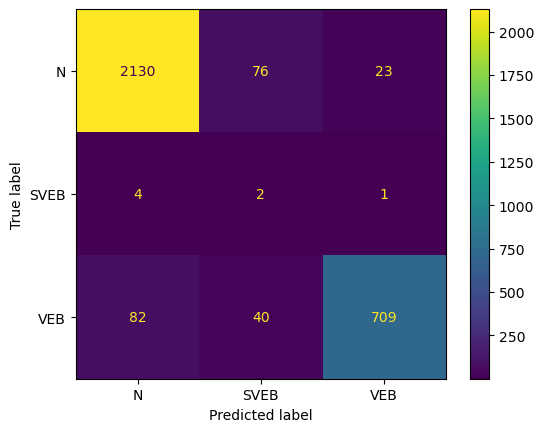

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2699
         1.0       0.74      0.62      0.67        50
         2.0       1.00      0.33      0.50         3

    accuracy                           0.99      2752
   macro avg       0.91      0.65      0.72      2752
weighted avg       0.99      0.99      0.99      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.992986   0.738095  1.000000  0.989099     0.910361   
recall        0.996665   0.620000  0.333333  0.989099     0.650000   
f1-score      0.994822   0.673913  0.500000  0.989099     0.722912   
support    2699.000000  50.000000  3.000000  0.989099  2752.000000   

           weighted avg  
precision      0.988363  
recall         0.989099  
f1-score       0.988453  
support     2752.000000  


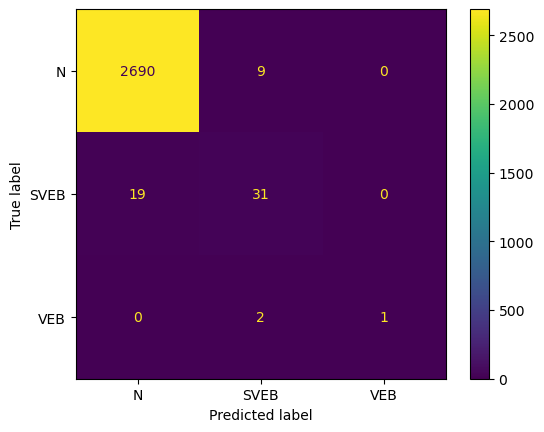

Fold 45:
  Test:  patient=44


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.40      0.56       210
         1.0       0.00      0.00      0.00         0
         2.0       0.02      0.67      0.03         3

    accuracy                           0.40       213
   macro avg       0.33      0.35      0.20       213
weighted avg       0.97      0.40      0.56       213

                  0.0  1.0       2.0  accuracy   macro avg  weighted avg
precision    0.988095  0.0  0.015873  0.399061    0.334656      0.974402
recall       0.395238  NaN  0.666667  0.399061    0.353968      0.399061
f1-score     0.564626  NaN  0.031008  0.399061    0.198545      0.557110
support    210.000000  0.0  3.000000  0.399061  213.000000    213.000000


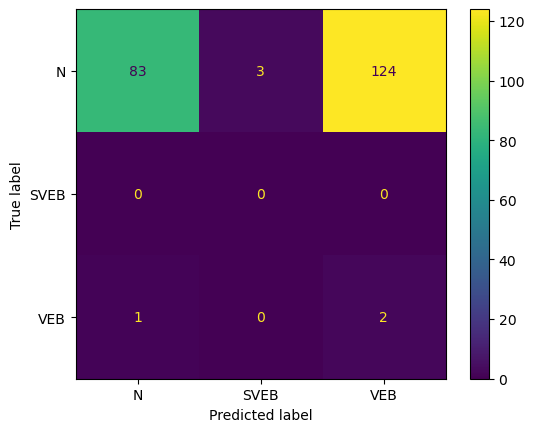

Fold 46:
  Test:  patient=45
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97     56792
         1.0       0.04      0.02      0.02      1530
         2.0       0.79      0.78      0.79      4060

    accuracy                           0.94     62382
   macro avg       0.60      0.59      0.59     62382
weighted avg       0.93      0.94      0.94     62382

                    0.0          1.0          2.0  accuracy     macro avg  \
precision      0.966429     0.035821     0.788081  0.944872      0.596777   
recall         0.981335     0.015686     0.784975  0.944872      0.593999   
f1-score       0.973825     0.021818     0.786525  0.944872      0.594056   
support    56792.000000  1530.000000  4060.000000  0.944872  62382.000000   

           weighted avg  
precision      0.931997  
recall         0.944872  
f1-score       0.938286  
support    62382.000000  


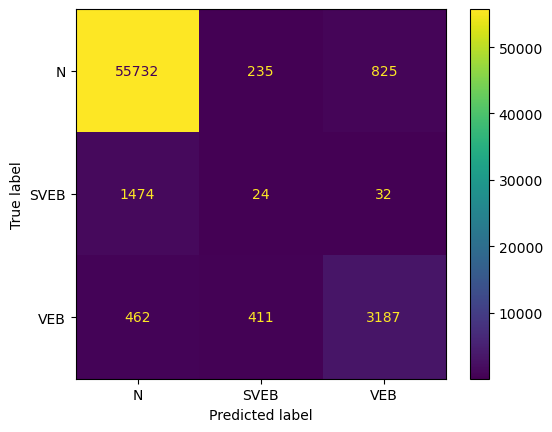

Fold 47:
  Test:  patient=46
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94     18041
         1.0       0.00      0.40      0.00         5
         2.0       0.34      0.96      0.50        24

    accuracy                           0.88     18070
   macro avg       0.45      0.75      0.48     18070
weighted avg       1.00      0.88      0.93     18070

                    0.0       1.0        2.0  accuracy     macro avg  \
precision      0.999937  0.000929   0.338235  0.878417      0.446367   
recall         0.878444  0.400000   0.958333  0.878417      0.745592   
f1-score       0.935261  0.001854   0.500000  0.878417      0.479038   
support    18041.000000  5.000000  24.000000  0.878417  18070.000000   

           weighted avg  
precision      0.998782  
recall         0.878417  
f1-score       0.934425  
support    18070.000000  


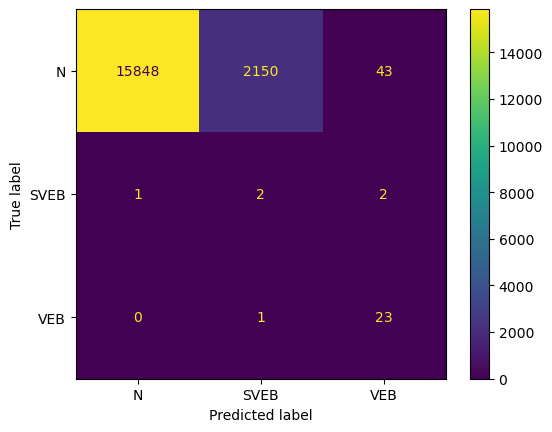

Fold 48:
  Test:  patient=47


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91     25232
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.45      0.13        33

    accuracy                           0.83     25265
   macro avg       0.36      0.43      0.35     25265
weighted avg       1.00      0.83      0.91     25265

                    0.0  1.0        2.0  accuracy     macro avg  weighted avg
precision      0.999189  0.0   0.077720  0.829883      0.358970      0.997986
recall         0.830374  NaN   0.454545  0.829883      0.428307      0.829883
f1-score       0.906993  NaN   0.132743  0.829883      0.346579      0.905982
support    25232.000000  0.0  33.000000  0.829883  25265.000000  25265.000000


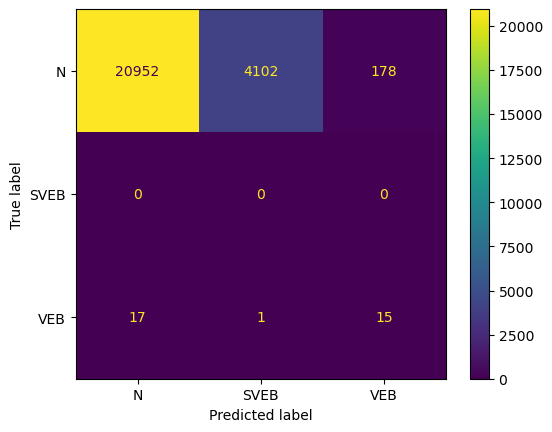

Fold 49:
  Test:  patient=48


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        66
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.85        66
   macro avg       0.33      0.28      0.31        66
weighted avg       1.00      0.85      0.92        66

                 0.0  1.0  2.0  accuracy  macro avg  weighted avg
precision   1.000000  0.0  0.0  0.848485   0.333333      1.000000
recall      0.848485  NaN  NaN  0.848485   0.282828      0.848485
f1-score    0.918033  NaN  NaN  0.848485   0.306011      0.918033
support    66.000000  0.0  0.0  0.848485  66.000000     66.000000


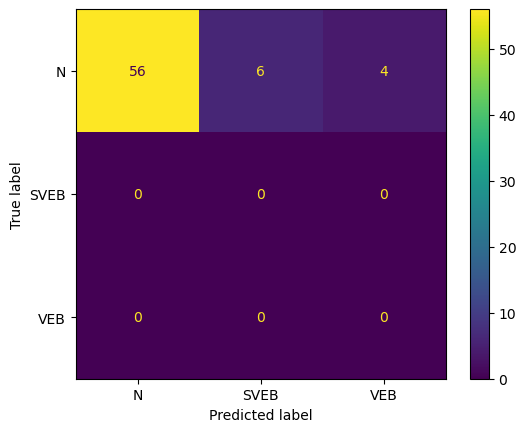

Fold 50:
  Test:  patient=49


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92     20894
         1.0       0.00      0.00      0.00         0
         2.0       0.91      0.92      0.92      1538

    accuracy                           0.86     22432
   macro avg       0.64      0.59      0.61     22432
weighted avg       0.99      0.86      0.92     22432

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.996833  0.0     0.913325  0.862741      0.636719   
recall         0.858668  NaN     0.918075  0.862741      0.592248   
f1-score       0.922606  NaN     0.915694  0.862741      0.612767   
support    20894.000000  0.0  1538.000000  0.862741  22432.000000   

           weighted avg  
precision      0.991107  
recall         0.862741  
f1-score       0.922132  
support    22432.000000  


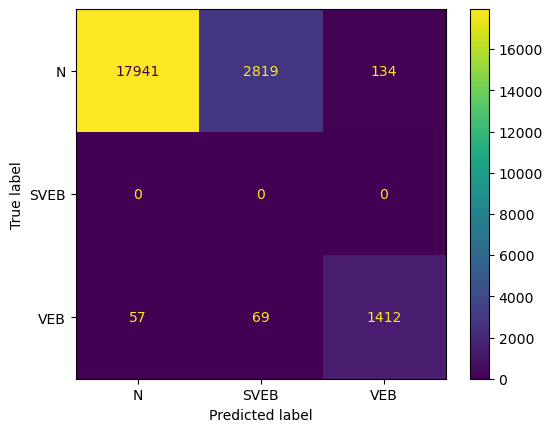

Fold 51:
  Test:  patient=50


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.82      0.90     14088
         1.0       0.00      0.00      0.00         0
         2.0       0.92      0.78      0.85       658

    accuracy                           0.82     14746
   macro avg       0.64      0.53      0.58     14746
weighted avg       0.99      0.82      0.90     14746

                    0.0  1.0         2.0  accuracy     macro avg  weighted avg
precision      0.993918  0.0    0.924324  0.821579      0.639414      0.990812
recall         0.823538  NaN    0.779635  0.821579      0.534391      0.821579
f1-score       0.900741  NaN    0.845837  0.821579      0.582193      0.898291
support    14088.000000  0.0  658.000000  0.821579  14746.000000  14746.000000


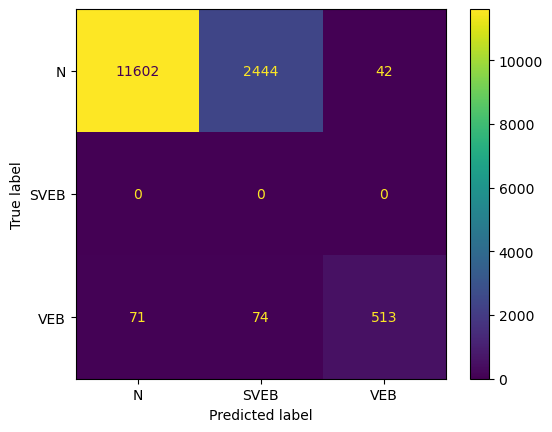

Fold 52:
  Test:  patient=51
              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90      3548
         1.0       0.03      0.27      0.05        11
         2.0       0.40      0.99      0.57       361

    accuracy                           0.84      3920
   macro avg       0.48      0.70      0.51      3920
weighted avg       0.94      0.84      0.87      3920

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.998633   0.030000    0.399329  0.837245     0.475987   
recall        0.823563   0.272727    0.988920  0.837245     0.695070   
f1-score      0.902688   0.054054    0.568924  0.837245     0.508555   
support    3548.000000  11.000000  361.000000  0.837245  3920.000000   

           weighted avg  
precision      0.940724  
recall         0.837245  
f1-score       0.869569  
support     3920.000000  


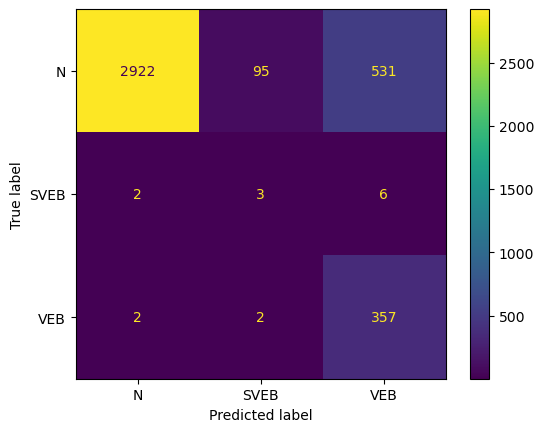

Fold 53:
  Test:  patient=52


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      0.52      0.68     14681
         1.0       0.00      0.00      0.00         0
         2.0       0.34      0.66      0.45      1835

    accuracy                           0.54     16516
   macro avg       0.44      0.40      0.38     16516
weighted avg       0.90      0.54      0.65     16516

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.968612  0.0     0.343900  0.538811      0.437504   
recall         0.523398  NaN     0.662125  0.538811      0.395174   
f1-score       0.679579  NaN     0.452683  0.538811      0.377421   
support    14681.000000  0.0  1835.000000  0.538811  16516.000000   

           weighted avg  
precision      0.899204  
recall         0.538811  
f1-score       0.654370  
support    16516.000000  


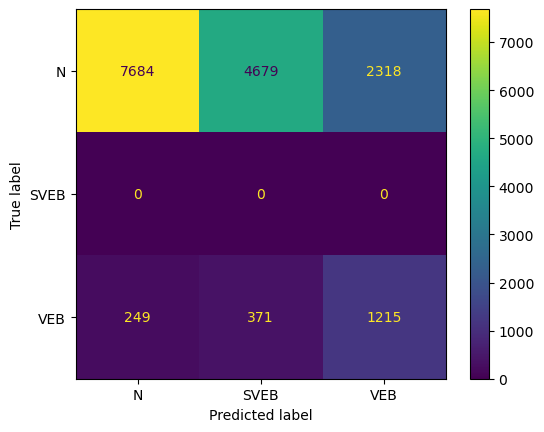

Fold 54:
  Test:  patient=53
              precision    recall  f1-score   support

         0.0       1.00      0.32      0.48     79883
         1.0       0.00      0.13      0.00        23
         2.0       0.05      0.93      0.09      2689

    accuracy                           0.34     82595
   macro avg       0.35      0.46      0.19     82595
weighted avg       0.97      0.34      0.47     82595

                    0.0        1.0          2.0  accuracy     macro avg  \
precision      0.997047   0.000959     0.046389   0.33703      0.348132   
recall         0.317039   0.130435     0.932689   0.33703      0.460054   
f1-score       0.481099   0.001904     0.088381   0.33703      0.190461   
support    79883.000000  23.000000  2689.000000   0.33703  82595.000000   

           weighted avg  
precision       0.96582  
recall          0.33703  
f1-score        0.46818  
support     82595.00000  


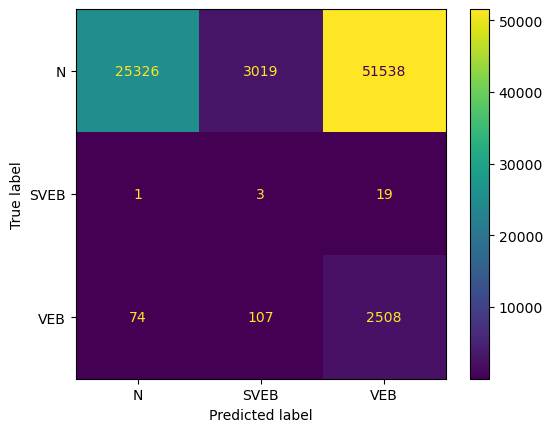

Fold 55:
  Test:  patient=54
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      5452
         1.0       0.00      0.00      0.00         1
         2.0       0.26      0.86      0.40        65

    accuracy                           0.94      5518
   macro avg       0.42      0.60      0.46      5518
weighted avg       0.99      0.94      0.96      5518

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999806  0.0   0.262911  0.943639     0.420906      0.990944
recall        0.944791  0.0   0.861538  0.943639     0.602110      0.943639
f1-score      0.971520  0.0   0.402878  0.943639     0.458133      0.964646
support    5452.000000  1.0  65.000000  0.943639  5518.000000   5518.000000


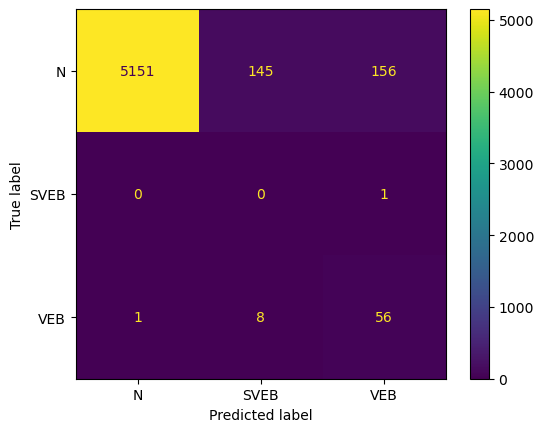

Fold 56:
  Test:  patient=55
              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94      1844
         1.0       0.11      0.80      0.20        30
         2.0       0.18      0.33      0.24         6

    accuracy                           0.89      1880
   macro avg       0.43      0.68      0.46      1880
weighted avg       0.98      0.89      0.93      1880

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.995781   0.114286  0.181818  0.892553     0.430628   
recall        0.895879   0.800000  0.333333  0.892553     0.676404   
f1-score      0.943192   0.200000  0.235294  0.892553     0.459495   
support    1844.000000  30.000000  6.000000  0.892553  1880.000000   

           weighted avg  
precision      0.979116  
recall         0.892553  
f1-score       0.929073  
support     1880.000000  


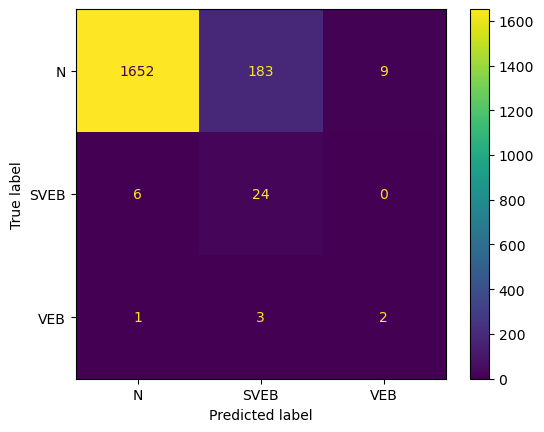

Fold 57:
  Test:  patient=56
              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      2173
         1.0       0.21      0.45      0.29        66
         2.0       0.69      0.88      0.77       268

    accuracy                           0.90      2507
   macro avg       0.63      0.75      0.67      2507
weighted avg       0.93      0.90      0.91      2507

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.984691   0.214286    0.690058  0.901476     0.629679   
recall        0.917625   0.454545    0.880597  0.901476     0.750923   
f1-score      0.949976   0.291262    0.773770  0.901476     0.671670   
support    2173.000000  66.000000  268.000000  0.901476  2507.000000   

           weighted avg  
precision      0.932913  
recall         0.901476  
f1-score       0.913798  
support     2507.000000  


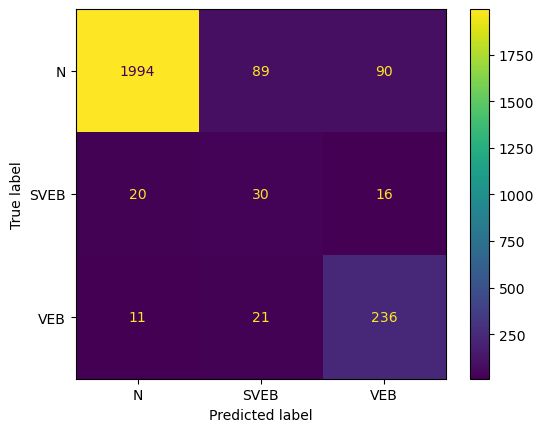

Fold 58:
  Test:  patient=57


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1584
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.69      0.82        85

    accuracy                           0.98      1669
   macro avg       0.66      0.56      0.60      1669
weighted avg       0.99      0.98      0.99      1669

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.990596  0.0   1.000000  0.982025     0.663532      0.991075
recall        0.997475  NaN   0.694118  0.982025     0.563864      0.982025
f1-score      0.994023  NaN   0.819444  0.982025     0.604489      0.985132
support    1584.000000  0.0  85.000000  0.982025  1669.000000   1669.000000


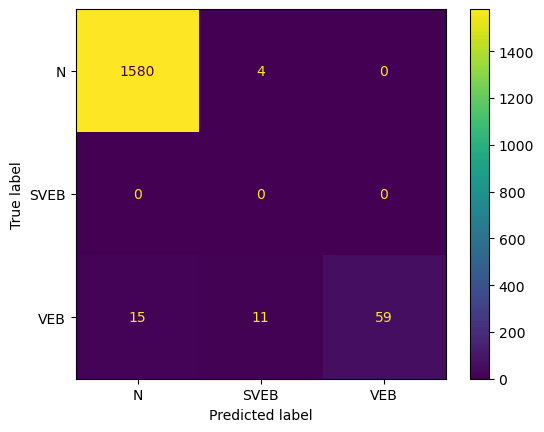

Fold 59:
  Test:  patient=58
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1922
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      0.99       143

    accuracy                           0.99      2065
   macro avg       0.67      0.66      0.66      2065
weighted avg       1.00      0.99      1.00      2065

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999477  0.0    1.000000   0.99322     0.666492      0.999513
recall        0.993757  NaN    0.986014   0.99322     0.659923      0.993220
f1-score      0.996608  NaN    0.992958   0.99322     0.663189      0.996356
support    1922.000000  0.0  143.000000   0.99322  2065.000000   2065.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

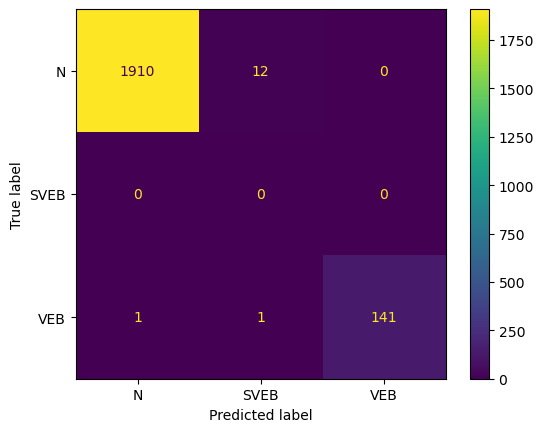

Fold 60:
  Test:  patient=59


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89      2651
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.63      0.76       181

    accuracy                           0.80      2832
   macro avg       0.65      0.48      0.55      2832
weighted avg       0.99      0.80      0.88      2832

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.992166  0.0    0.957983  0.800494     0.650050      0.989981
recall        0.812146  NaN    0.629834  0.800494     0.480660      0.800494
f1-score      0.893176  NaN    0.760000  0.800494     0.551059      0.884664
support    2651.000000  0.0  181.000000  0.800494  2832.000000   2832.000000


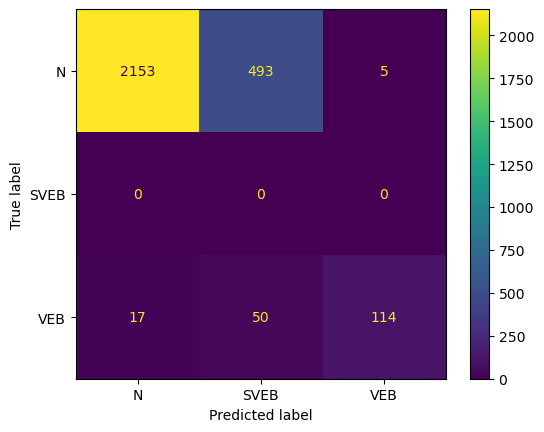

Fold 61:
  Test:  patient=60


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95      2089
         1.0       0.00      0.00      0.00         0
         2.0       0.52      0.95      0.67       207

    accuracy                           0.90      2296
   macro avg       0.51      0.62      0.54      2296
weighted avg       0.96      0.90      0.92      2296

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998937  0.0    0.518421  0.904181     0.505786      0.955615
recall        0.899473  NaN    0.951691  0.904181     0.617055      0.904181
f1-score      0.946599  NaN    0.671210  0.904181     0.539270      0.921771
support    2089.000000  0.0  207.000000  0.904181  2296.000000   2296.000000


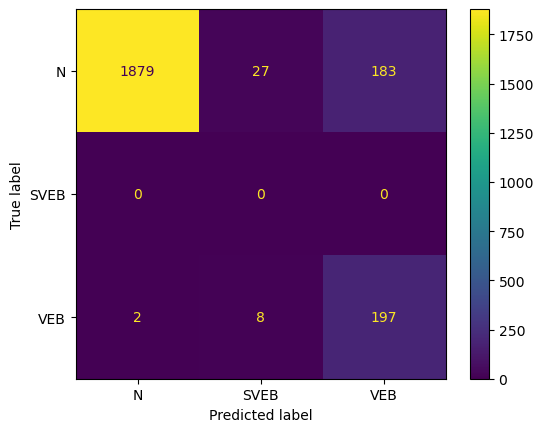

Fold 62:
  Test:  patient=61
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2950
         1.0       0.31      0.68      0.43        40
         2.0       0.62      0.55      0.58        29

    accuracy                           0.98      3019
   macro avg       0.64      0.74      0.67      3019
weighted avg       0.99      0.98      0.98      3019

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.998280   0.313953   0.615385  0.975489     0.642539   
recall        0.983729   0.675000   0.551724  0.975489     0.736818   
f1-score      0.990951   0.428571   0.581818  0.975489     0.667114   
support    2950.000000  40.000000  29.000000  0.975489  3019.000000   

           weighted avg  
precision      0.985535  
recall         0.975489  
f1-score       0.979570  
support     3019.000000  


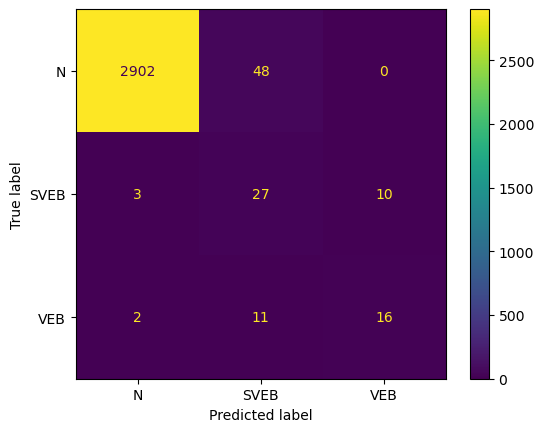

Fold 63:
  Test:  patient=62


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1911
         1.0       0.22      0.69      0.34        29
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      1940
   macro avg       0.41      0.55      0.44      1940
weighted avg       0.98      0.96      0.97      1940

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.995669   0.224719  0.0  0.958247     0.406796      0.984144
recall        0.962323   0.689655  NaN  0.958247     0.550660      0.958247
f1-score      0.978712   0.338983  NaN  0.958247     0.439232      0.969149
support    1911.000000  29.000000  0.0  0.958247  1940.000000   1940.000000


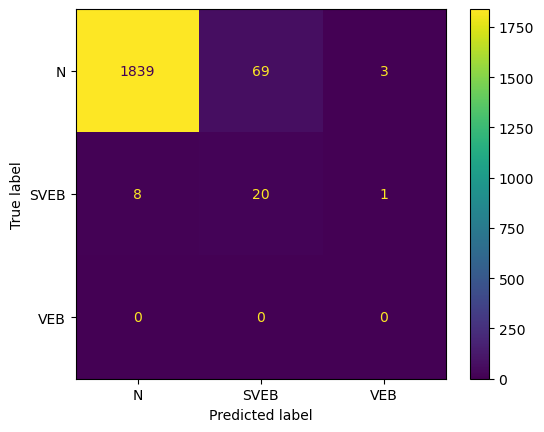

Fold 64:
  Test:  patient=63
              precision    recall  f1-score   support

         0.0       1.00      0.54      0.70      1744
         1.0       0.02      0.95      0.05        20
         2.0       0.11      0.50      0.17         8

    accuracy                           0.54      1772
   macro avg       0.38      0.66      0.31      1772
weighted avg       0.98      0.54      0.69      1772

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.023810  0.105263  0.541196     0.376358   
recall        0.536697   0.950000  0.500000  0.541196     0.662232   
f1-score      0.698507   0.046455  0.173913  0.541196     0.306292   
support    1744.000000  20.000000  8.000000  0.541196  1772.000000   

           weighted avg  
precision      0.984943  
recall         0.541196  
f1-score       0.688780  
support     1772.000000  


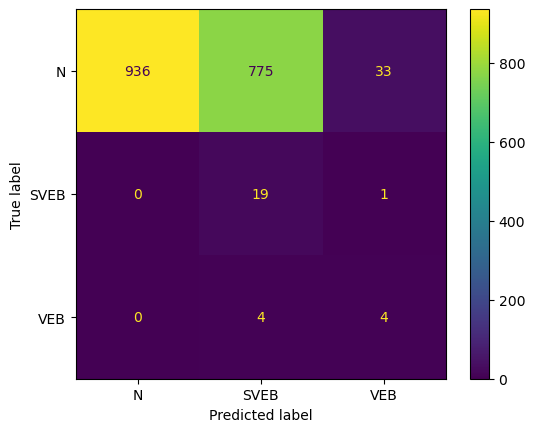

Fold 65:
  Test:  patient=64


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2430
         1.0       0.63      0.65      0.64       112
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2542
   macro avg       0.54      0.54      0.54      2542
weighted avg       0.97      0.97      0.97      2542

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.985136    0.629310  0.0  0.967349     0.538149      0.969459
recall        0.981893    0.651786  NaN  0.967349     0.544560      0.967349
f1-score      0.983512    0.640351  NaN  0.967349     0.541288      0.968392
support    2430.000000  112.000000  0.0  0.967349  2542.000000   2542.000000


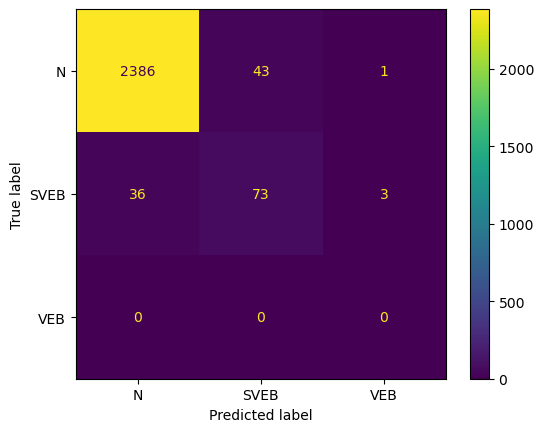

Fold 66:
  Test:  patient=65
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1837
         1.0       0.19      0.88      0.32         8
         2.0       1.00      0.89      0.94        56

    accuracy                           0.98      1901
   macro avg       0.73      0.92      0.75      1901
weighted avg       1.00      0.98      0.99      1901

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.999449  0.194444   1.000000  0.984219     0.731298   
recall        0.987480  0.875000   0.892857  0.984219     0.918446   
f1-score      0.993428  0.318182   0.943396  0.984219     0.751669   
support    1837.000000  8.000000  56.000000  0.984219  1901.000000   

           weighted avg  
precision      0.996078  
recall         0.984219  
f1-score       0.989113  
support     1901.000000  


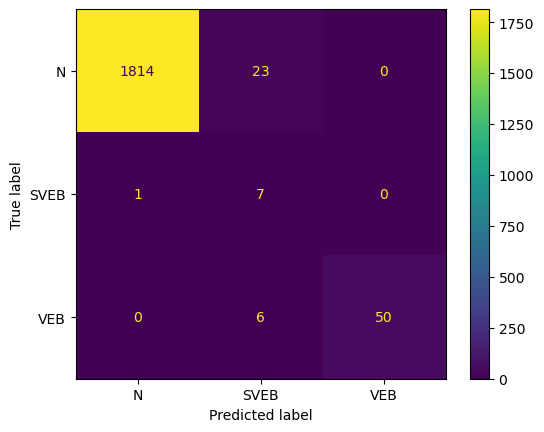

Fold 67:
  Test:  patient=66
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      1404
         1.0       0.01      1.00      0.01         1
         2.0       0.83      0.18      0.29        28

    accuracy                           0.89      1433
   macro avg       0.61      0.70      0.42      1433
weighted avg       0.99      0.89      0.94      1433

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.997654  0.006757   0.833333  0.894627     0.612582   
recall        0.908832  1.000000   0.178571  0.894627     0.695801   
f1-score      0.951174  0.013423   0.294118  0.894627     0.419572   
support    1404.000000  1.000000  28.000000  0.894627  1433.000000   

           weighted avg  
precision      0.993752  
recall         0.894627  
f1-score       0.937681  
support     1433.000000  


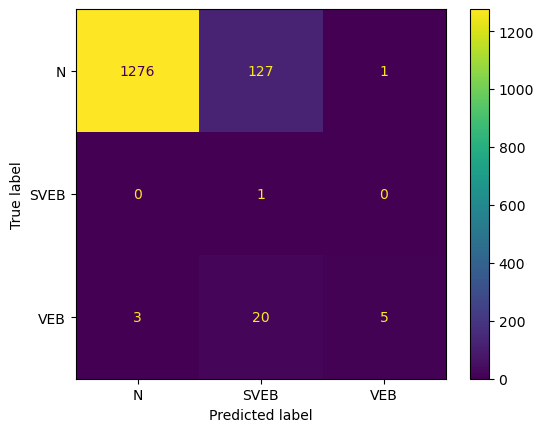

Fold 68:
  Test:  patient=67
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1756
         1.0       0.19      0.71      0.29        14
         2.0       0.86      0.71      0.78        70

    accuracy                           0.97      1840
   macro avg       0.68      0.80      0.69      1840
weighted avg       0.99      0.97      0.98      1840

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.997685   0.185185   0.862069  0.969565     0.681646   
recall        0.981777   0.714286   0.714286  0.969565     0.803449   
f1-score      0.989667   0.294118   0.781250  0.969565     0.688345   
support    1756.000000  14.000000  70.000000  0.969565  1840.000000   

           weighted avg  
precision      0.986344  
recall         0.969565  
f1-score       0.976446  
support     1840.000000  


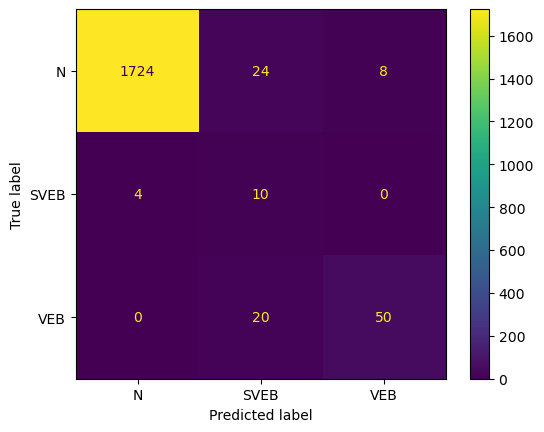

Fold 69:
  Test:  patient=68
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2161
         1.0       0.98      0.51      0.67       185
         2.0       0.03      1.00      0.06         3

    accuracy                           0.96      2349
   macro avg       0.67      0.84      0.58      2349
weighted avg       1.00      0.96      0.97      2349

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.999537    0.979167  0.031579  0.959557     0.670094   
recall        0.998149    0.508108  1.000000  0.959557     0.835419   
f1-score      0.998842    0.669039  0.061224  0.959557     0.576369   
support    2161.000000  185.000000  3.000000  0.959557  2349.000000   

           weighted avg  
precision      0.996696  
recall         0.959557  
f1-score       0.971671  
support     2349.000000  


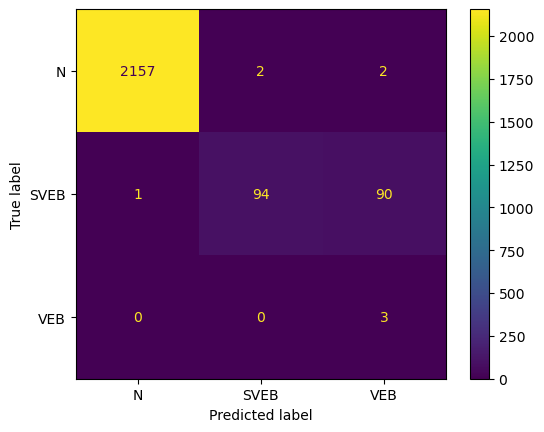

Fold 70:
  Test:  patient=69
              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96      2480
         1.0       0.79      0.89      0.84       614
         2.0       0.94      0.44      0.60        36

    accuracy                           0.93      3130
   macro avg       0.90      0.76      0.80      3130
weighted avg       0.93      0.93      0.93      3130

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.969472    0.791001   0.941176  0.930032     0.900550   
recall        0.947581    0.887622   0.444444  0.930032     0.759882   
f1-score      0.958401    0.836531   0.603774  0.930032     0.799569   
support    2480.000000  614.000000  36.000000  0.930032  3130.000000   

           weighted avg  
precision      0.934137  
recall         0.930032  
f1-score       0.930416  
support     3130.000000  


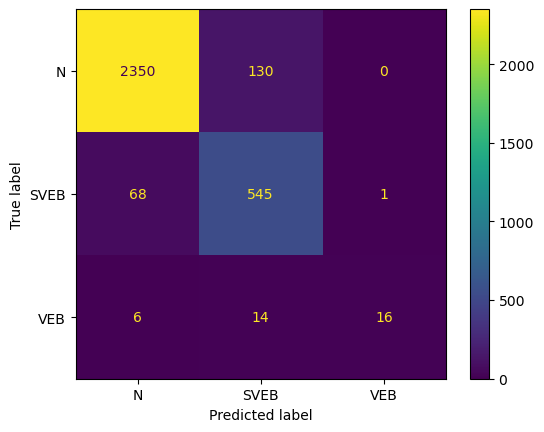

Fold 71:
  Test:  patient=70
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89      1673
         1.0       0.98      0.33      0.49       658
         2.0       0.00      0.00      0.00         1

    accuracy                           0.81      2332
   macro avg       0.60      0.44      0.46      2332
weighted avg       0.86      0.81      0.78      2332

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.807450    0.981900  0.0  0.808748     0.596450      0.856327
recall        0.997609    0.329787  0.0  0.808748     0.442465      0.808748
f1-score      0.892513    0.493743  0.0  0.808748     0.462085      0.779613
support    1673.000000  658.000000  1.0  0.808748  2332.000000   2332.000000


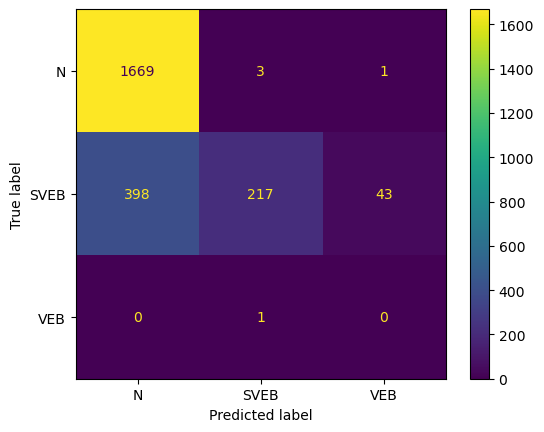

Fold 72:
  Test:  patient=71


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      2477
         1.0       0.78      0.48      0.60       382
         2.0       0.00      0.00      0.00         0

    accuracy                           0.90      2859
   macro avg       0.57      0.48      0.52      2859
weighted avg       0.92      0.90      0.91      2859

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.940047    0.777311  0.0  0.903813     0.572453      0.918303
recall        0.968510    0.484293  NaN  0.903813     0.484268      0.903813
f1-score      0.954066    0.596774  NaN  0.903813     0.516947      0.906327
support    2477.000000  382.000000  0.0  0.903813  2859.000000   2859.000000


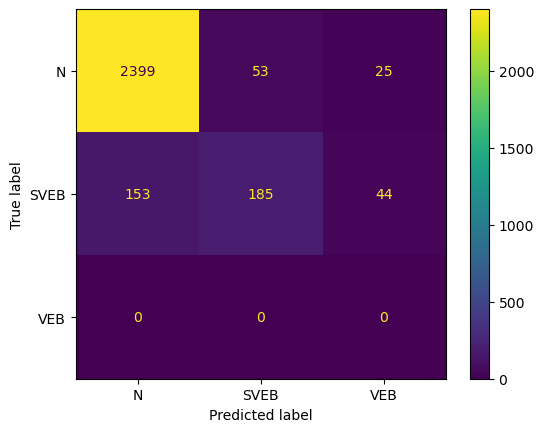

Fold 73:
  Test:  patient=72
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2214
         1.0       0.65      0.91      0.76       196
         2.0       0.11      0.43      0.17         7

    accuracy                           0.95      2417
   macro avg       0.59      0.77      0.64      2417
weighted avg       0.97      0.95      0.96      2417

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.999527    0.650909  0.107143  0.949524     0.585860   
recall        0.954381    0.913265  0.428571  0.949524     0.765406   
f1-score      0.976433    0.760085  0.171429  0.949524     0.635982   
support    2214.000000  196.000000  7.000000  0.949524  2417.000000   

           weighted avg  
precision      0.968672  
recall         0.949524  
f1-score       0.956557  
support     2417.000000  


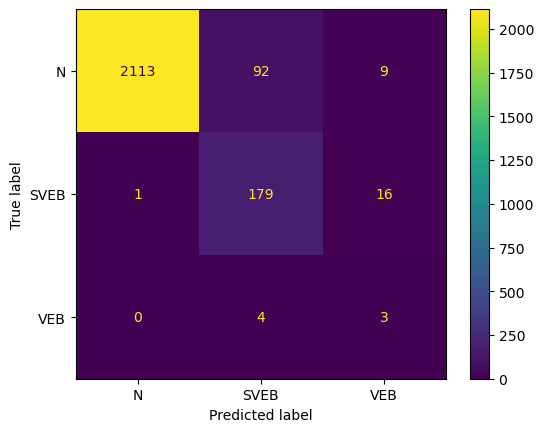

Fold 74:
  Test:  patient=73


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMM

              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57      2651
         1.0       0.00      0.00      0.00       145
         2.0       0.00      0.00      0.00         0

    accuracy                           0.38      2796
   macro avg       0.33      0.13      0.19      2796
weighted avg       0.95      0.38      0.54      2796

                   0.0    1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998124    NaN  0.0  0.380544     0.332708      0.946361
recall        0.401358    0.0  NaN  0.380544     0.133786      0.380544
f1-score      0.572505    NaN  NaN  0.380544     0.190835      0.542815
support    2651.000000  145.0  0.0  0.380544  2796.000000   2796.000000


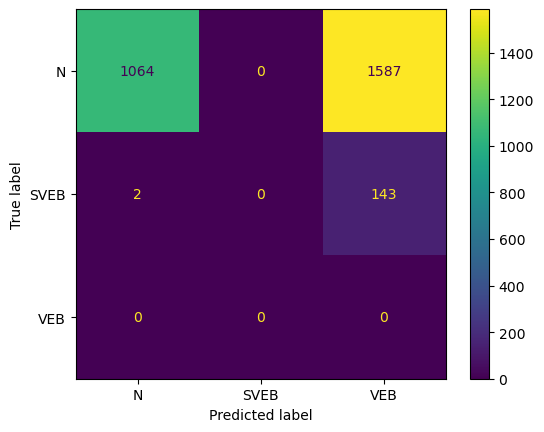

Fold 75:
  Test:  patient=74


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.52      0.68      2579
         1.0       0.23      0.88      0.37        80
         2.0       0.00      0.00      0.00         0

    accuracy                           0.53      2659
   macro avg       0.41      0.47      0.35      2659
weighted avg       0.97      0.53      0.67      2659

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.993338   0.234114  0.0  0.531027     0.409151      0.970496
recall        0.520357   0.875000  NaN  0.531027     0.465119      0.531027
f1-score      0.682952   0.369393  NaN  0.531027     0.350782      0.673518
support    2579.000000  80.000000  0.0  0.531027  2659.000000   2659.000000


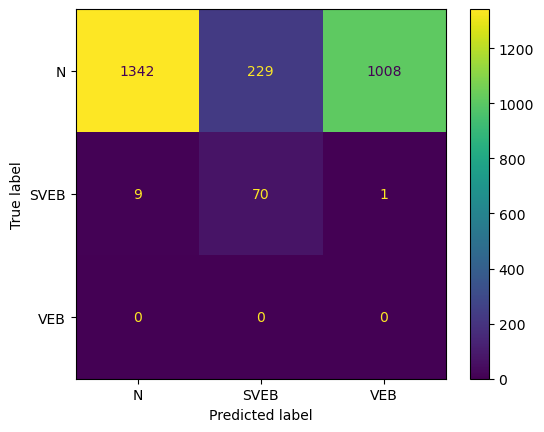

Fold 76:
  Test:  patient=75


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1842
         1.0       0.06      0.67      0.11        18
         2.0       0.00      0.00      0.00         0

    accuracy                           0.86      1860
   macro avg       0.35      0.51      0.34      1860
weighted avg       0.99      0.86      0.92      1860

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999368   0.058252  0.0  0.856989     0.352540      0.990261
recall        0.858849   0.666667  NaN  0.856989     0.508505      0.856989
f1-score      0.923796   0.107143  NaN  0.856989     0.343646      0.915893
support    1842.000000  18.000000  0.0  0.856989  1860.000000   1860.000000


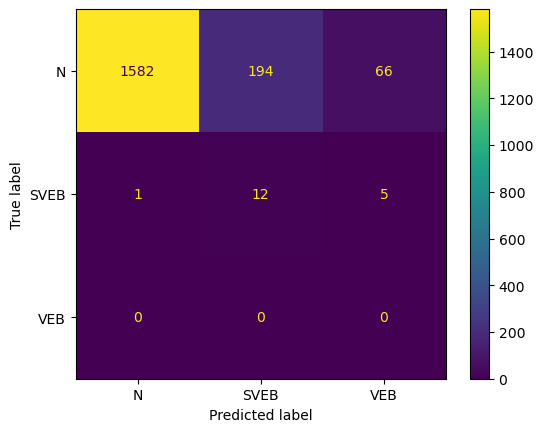

Fold 77:
  Test:  patient=76
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1755
         1.0       0.88      0.98      0.93       150
         2.0       0.67      0.33      0.44         6

    accuracy                           0.99      1911
   macro avg       0.85      0.77      0.79      1911
weighted avg       0.99      0.99      0.99      1911

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.998277    0.880240  0.666667  0.987441     0.848394   
recall        0.990313    0.980000  0.333333  0.987441     0.767882   
f1-score      0.994279    0.927445  0.444444  0.987441     0.788723   
support    1755.000000  150.000000  6.000000  0.987441  1911.000000   

           weighted avg  
precision      0.987971  
recall         0.987441  
f1-score       0.987307  
support     1911.000000  


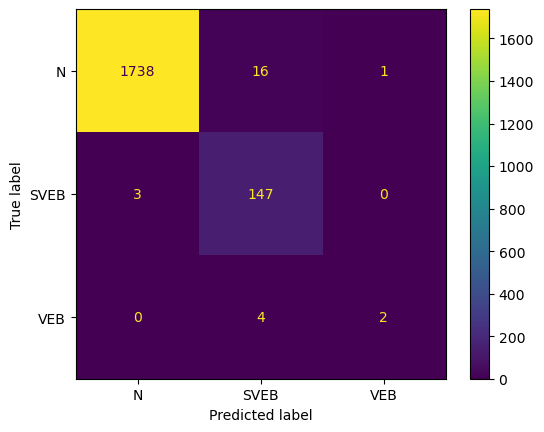

Fold 78:
  Test:  patient=77


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1885
         1.0       0.34      0.97      0.50        80
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      1965
   macro avg       0.45      0.63      0.49      1965
weighted avg       0.97      0.92      0.94      1965

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998844   0.337662  0.0  0.919084     0.445502      0.971926
recall        0.916711   0.975000  NaN  0.919084     0.630570      0.919084
f1-score      0.956017   0.501608  NaN  0.919084     0.485875      0.937516
support    1885.000000  80.000000  0.0  0.919084  1965.000000   1965.000000


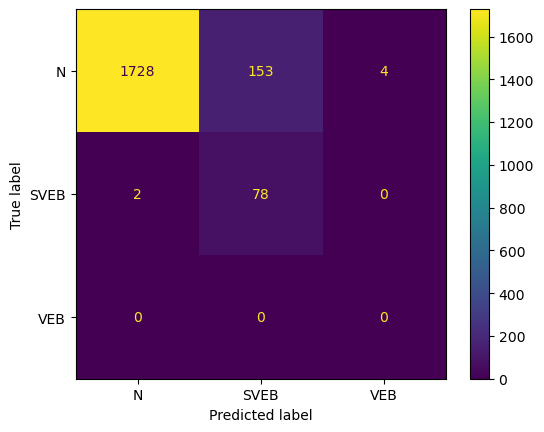

Fold 79:
  Test:  patient=78
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2339
         1.0       0.40      0.86      0.55        44
         2.0       0.00      0.00      0.00         1

    accuracy                           0.97      2384
   macro avg       0.47      0.61      0.51      2384
weighted avg       0.99      0.97      0.98      2384

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998688   0.404255  0.0  0.973574     0.467648      0.987298
recall        0.976058   0.863636  0.0  0.973574     0.613232      0.973574
f1-score      0.987243   0.550725  0.0  0.973574     0.512656      0.978773
support    2339.000000  44.000000  1.0  0.973574  2384.000000   2384.000000


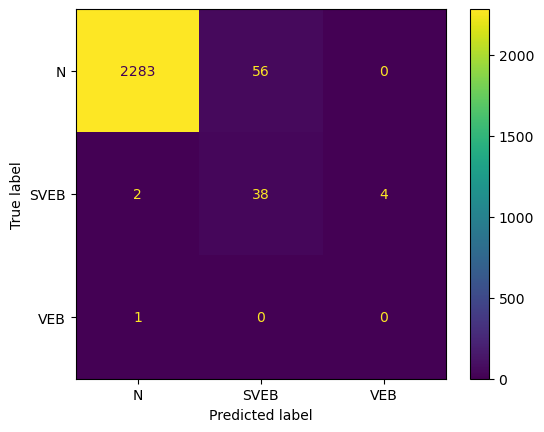

Fold 80:
  Test:  patient=79
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1489
         1.0       0.23      0.31      0.27       106
         2.0       0.58      0.42      0.49       254

    accuracy                           0.86      1849
   macro avg       0.59      0.57      0.57      1849
weighted avg       0.86      0.86      0.86      1849

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.959211    0.230769    0.575269  0.864251     0.588416   
recall        0.979181    0.311321    0.421260  0.864251     0.570587   
f1-score      0.969093    0.265060    0.486364  0.864251     0.573506   
support    1489.000000  106.000000  254.000000  0.864251  1849.000000   

           weighted avg  
precision      0.864708  
recall         0.864251  
f1-score       0.862419  
support     1849.000000  


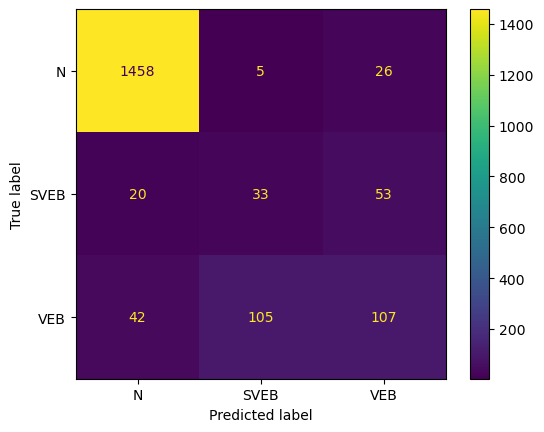

Fold 81:
  Test:  patient=80
              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      2392
         1.0       0.13      0.80      0.22       104
         2.0       0.44      0.07      0.11        61

    accuracy                           0.77      2557
   macro avg       0.52      0.55      0.40      2557
weighted avg       0.94      0.77      0.83      2557

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.988470    0.129688   0.444444  0.771607     0.520867   
recall        0.788462    0.798077   0.065574  0.771607     0.550704   
f1-score      0.877209    0.223118   0.114286  0.771607     0.404871   
support    2392.000000  104.000000  61.000000  0.771607  2557.000000   

           weighted avg  
precision      0.940562  
recall         0.771607  
f1-score       0.832405  
support     2557.000000  


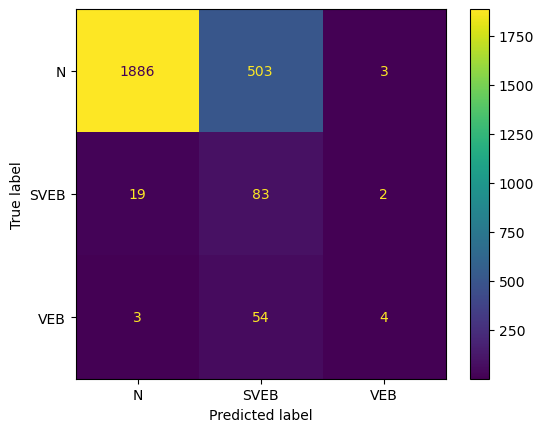

Fold 82:
  Test:  patient=81
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      2647
         1.0       0.04      0.81      0.07        21
         2.0       0.10      0.37      0.16        38

    accuracy                           0.79      2706
   macro avg       0.38      0.66      0.37      2706
weighted avg       0.98      0.79      0.87      2706

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996223   0.037445   0.104478  0.791205     0.379382   
recall        0.797129   0.809524   0.368421  0.791205     0.658358   
f1-score      0.885624   0.071579   0.162791  0.791205     0.373331   
support    2647.000000  21.000000  38.000000  0.791205  2706.000000   

           weighted avg  
precision      0.976260  
recall         0.791205  
f1-score       0.869156  
support     2706.000000  


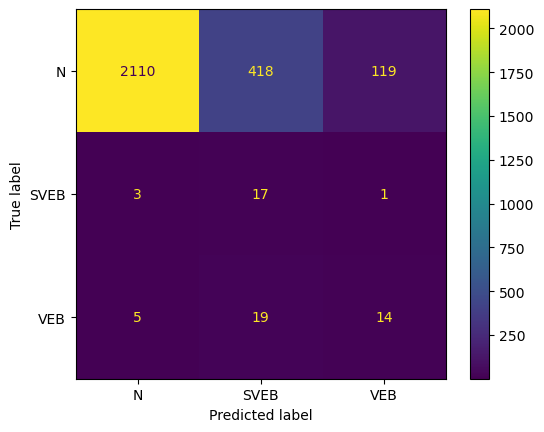

Fold 83:
  Test:  patient=82
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79      1648
         1.0       0.56      0.92      0.69        59
         2.0       0.00      0.00      0.00         0

    accuracy                           0.66      1707
   macro avg       0.52      0.52      0.49      1707
weighted avg       0.98      0.66      0.78      1707

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.996289   0.556701  0.0  0.660808     0.517663      0.981096
recall        0.651699   0.915254  NaN  0.660808     0.522318      0.660808
f1-score      0.787968   0.692308  NaN  0.660808     0.493425      0.784661
support    1648.000000  59.000000  0.0  0.660808  1707.000000   1707.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

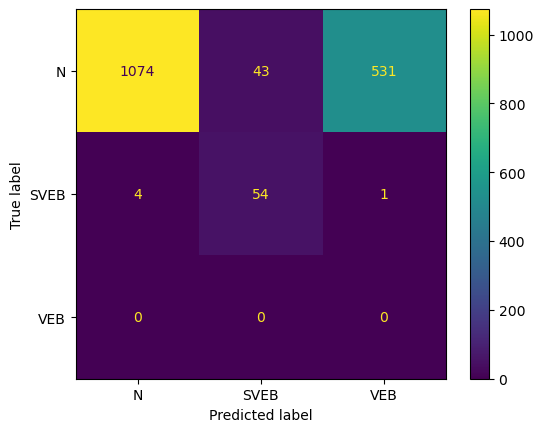

Fold 84:
  Test:  patient=83
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      2826
         1.0       0.13      0.22      0.16        27
         2.0       0.05      0.37      0.09        30

    accuracy                           0.91      2883
   macro avg       0.39      0.50      0.40      2883
weighted avg       0.98      0.91      0.94      2883

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.995805   0.127660   0.051402   0.91155     0.391622   
recall        0.923921   0.222222   0.366667   0.91155     0.504270   
f1-score      0.958517   0.162162   0.090164   0.91155     0.403614   
support    2826.000000  27.000000  30.000000   0.91155  2883.000000   

           weighted avg  
precision      0.977847  
recall         0.911550  
f1-score       0.942023  
support     2883.000000  


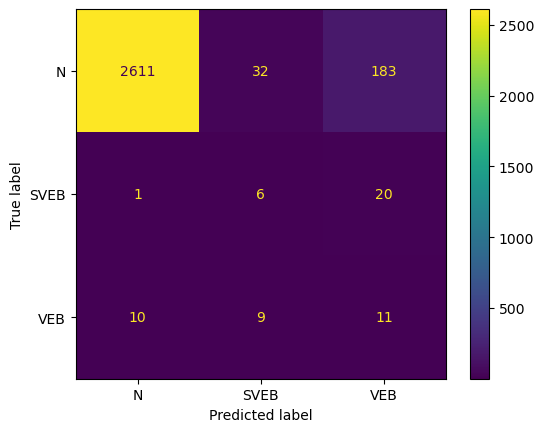

Fold 85:
  Test:  patient=84
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      1659
         1.0       0.15      0.90      0.25        20

    accuracy                           0.94      1679
   macro avg       0.57      0.92      0.61      1679
weighted avg       0.99      0.94      0.96      1679

                   0.0        1.0  accuracy    macro avg  weighted avg
precision     0.998715   0.146341  0.936272     0.572528      0.988561
recall        0.936709   0.900000  0.936272     0.918354      0.936272
f1-score      0.966719   0.251748  0.936272     0.609233      0.958202
support    1659.000000  20.000000  0.936272  1679.000000   1679.000000


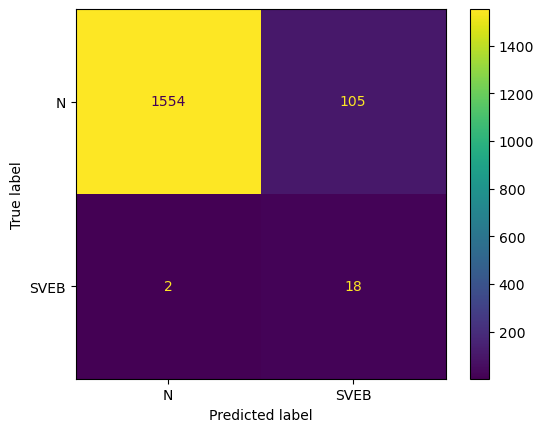

Fold 86:
  Test:  patient=85
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92      1665
         1.0       0.18      0.98      0.30        51
         2.0       0.91      0.98      0.95        44

    accuracy                           0.86      1760
   macro avg       0.70      0.94      0.72      1760
weighted avg       0.97      0.86      0.91      1760

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     1.000000   0.176056   0.914894  0.864773     0.696983   
recall        0.858258   0.980392   0.977273  0.864773     0.938641   
f1-score      0.923723   0.298507   0.945055  0.864773     0.722429   
support    1665.000000  51.000000  44.000000  0.864773  1760.000000   

           weighted avg  
precision      0.973997  
recall         0.864773  
f1-score       0.906140  
support     1760.000000  


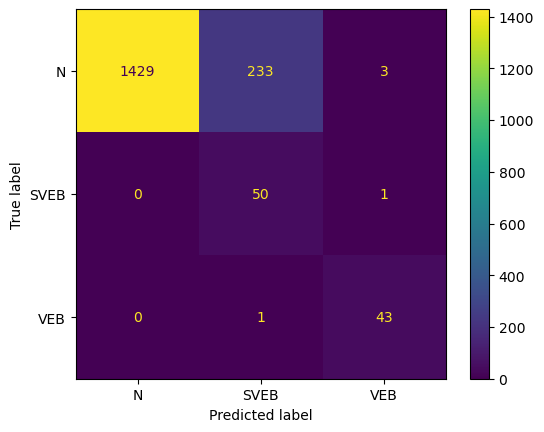

Fold 87:
  Test:  patient=86
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      4226
         1.0       0.06      0.93      0.11        30
         2.0       0.00      0.00      0.00         1

    accuracy                           0.89      4257
   macro avg       0.35      0.61      0.35      4257
weighted avg       0.99      0.89      0.94      4257

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.059574  0.0  0.893117     0.353191      0.993138
recall        0.893043   0.933333  0.0  0.893117     0.608792      0.893117
f1-score      0.943500   0.112000  0.0  0.893117     0.351833      0.937419
support    4226.000000  30.000000  1.0  0.893117  4257.000000   4257.000000


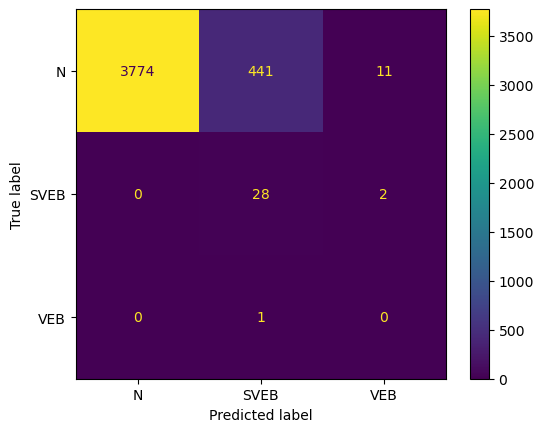

Fold 88:
  Test:  patient=87
              precision    recall  f1-score   support

         0.0       0.97      0.26      0.42      2058
         1.0       0.03      0.23      0.05        74
         2.0       0.00      0.67      0.01         6

    accuracy                           0.26      2138
   macro avg       0.34      0.39      0.16      2138
weighted avg       0.94      0.26      0.40      2138

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.974910   0.027687  0.004141  0.264266     0.335579   
recall        0.264334   0.229730  0.666667  0.264266     0.386910   
f1-score      0.415902   0.049419  0.008230  0.264266     0.157850   
support    2058.000000  74.000000  6.000000  0.264266  2138.000000   

           weighted avg  
precision      0.939401  
recall         0.264266  
f1-score       0.402073  
support     2138.000000  


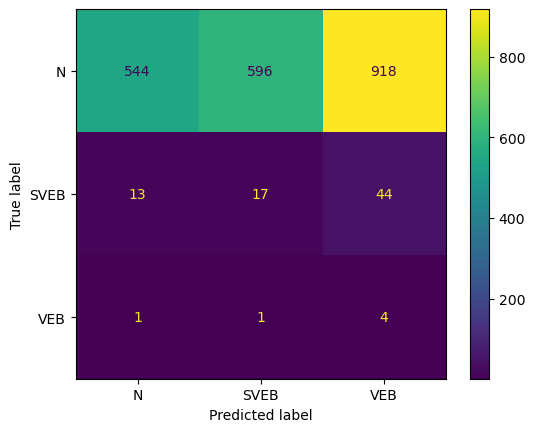

Fold 89:
  Test:  patient=88


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1829
         1.0       0.15      0.29      0.20         7
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1836
   macro avg       0.38      0.43      0.40      1836
weighted avg       0.99      0.99      0.99      1836

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997256  0.153846  0.0  0.990741     0.383701      0.994040
recall        0.993439  0.285714  NaN  0.990741     0.426384      0.990741
f1-score      0.995344  0.200000  NaN  0.990741     0.398448      0.992311
support    1829.000000  7.000000  0.0  0.990741  1836.000000   1836.000000


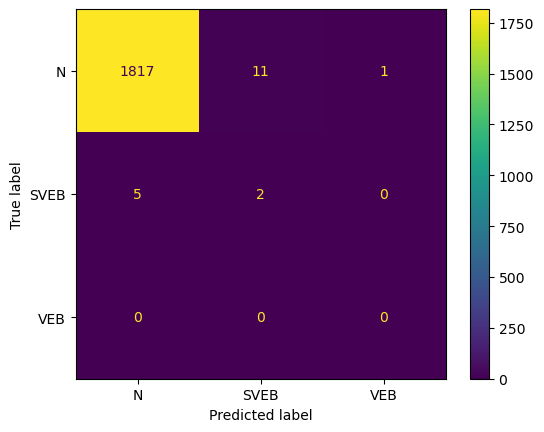

Fold 90:
  Test:  patient=89
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2167
         1.0       0.25      0.81      0.38        32
         2.0       0.93      0.99      0.96       427

    accuracy                           0.96      2626
   macro avg       0.73      0.92      0.77      2626
weighted avg       0.98      0.96      0.97      2626

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.997586   0.250000    0.933481  0.956969     0.727022   
recall        0.953392   0.812500    0.985948  0.956969     0.917280   
f1-score      0.974988   0.382353    0.958998  0.956969     0.772113   
support    2167.000000  32.000000  427.000000  0.956969  2626.000000   

           weighted avg  
precision      0.978052  
recall         0.956969  
f1-score       0.965166  
support     2626.000000  


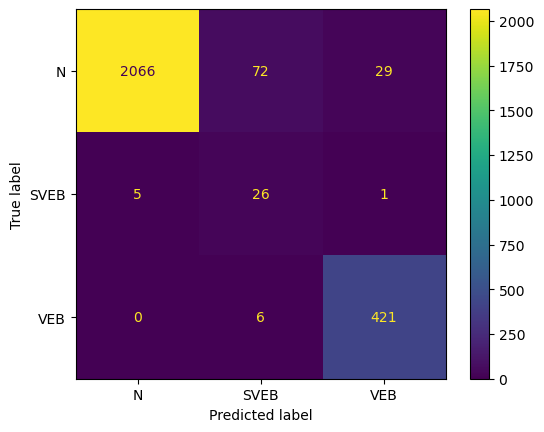

Fold 91:
  Test:  patient=90
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      2332
         1.0       0.54      0.72      0.62       321
         2.0       0.02      0.33      0.03         9

    accuracy                           0.85      2662
   macro avg       0.51      0.64      0.52      2662
weighted avg       0.93      0.85      0.88      2662

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.985359    0.537209  0.016393  0.846356     0.512987   
recall        0.865780    0.719626  0.333333  0.846356     0.639580   
f1-score      0.921707    0.615180  0.031250  0.846356     0.522712   
support    2332.000000  321.000000  9.000000  0.846356  2662.000000   

           weighted avg  
precision      0.928042  
recall         0.846356  
f1-score       0.881734  
support     2662.000000  


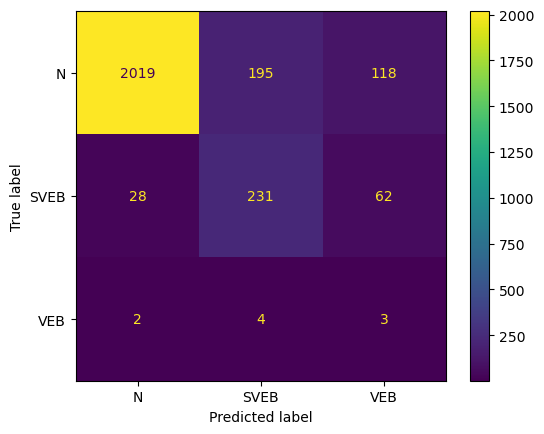

Fold 92:
  Test:  patient=91
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2105
         1.0       0.25      0.83      0.38        48
         2.0       0.68      0.70      0.69        64

    accuracy                           0.94      2217
   macro avg       0.64      0.83      0.68      2217
weighted avg       0.97      0.94      0.95      2217

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.998995   0.250000   0.681818  0.935498     0.643605   
recall        0.944893   0.833333   0.703125  0.935498     0.827117   
f1-score      0.971191   0.384615   0.692308  0.935498     0.682705   
support    2105.000000  48.000000  64.000000  0.935498  2217.000000   

           weighted avg  
precision      0.973623  
recall         0.935498  
f1-score       0.950441  
support     2217.000000  


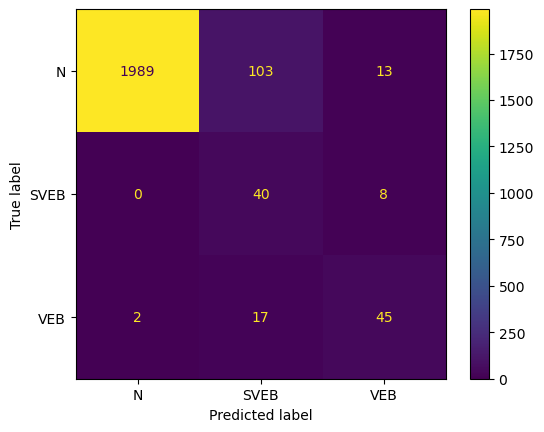

Fold 93:
  Test:  patient=92
              precision    recall  f1-score   support

         0.0       0.84      0.71      0.77      1788
         1.0       0.40      0.71      0.51       460
         2.0       0.26      0.22      0.24       478

    accuracy                           0.62      2726
   macro avg       0.50      0.55      0.51      2726
weighted avg       0.66      0.62      0.63      2726

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.836519    0.402967    0.262500  0.623624     0.500662   
recall        0.709732    0.708696    0.219665  0.623624     0.546031   
f1-score      0.767927    0.513790    0.239180  0.623624     0.506966   
support    1788.000000  460.000000  478.000000  0.623624  2726.000000   

           weighted avg  
precision      0.662706  
recall         0.623624  
f1-score       0.632328  
support     2726.000000  


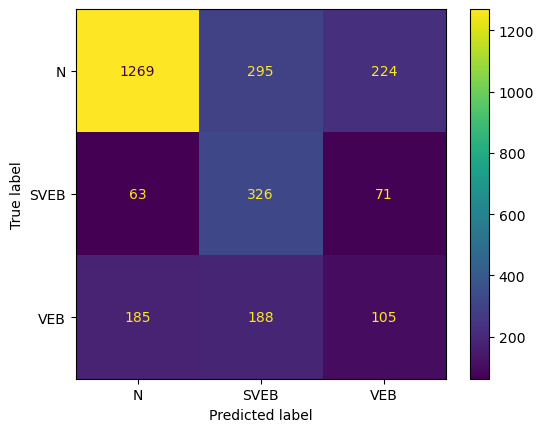

Fold 94:
  Test:  patient=93
              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93      2034
         1.0       0.41      0.65      0.50       227
         2.0       0.99      0.80      0.89       276

    accuracy                           0.88      2537
   macro avg       0.78      0.79      0.77      2537
weighted avg       0.91      0.88      0.89      2537

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.952869    0.408333    0.986667  0.878597     0.782623   
recall        0.914454    0.647577    0.804348  0.878597     0.788793   
f1-score      0.933266    0.500852    0.886228  0.878597     0.773449   
support    2034.000000  227.000000  276.000000  0.878597  2537.000000   

           weighted avg  
precision      0.907823  
recall         0.878597  
f1-score       0.889458  
support     2537.000000  


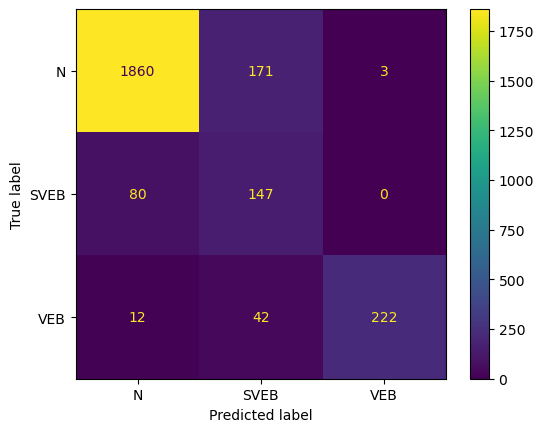

Fold 95:
  Test:  patient=94
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2810
         1.0       0.08      1.00      0.15        12
         2.0       0.42      0.79      0.54        28

    accuracy                           0.94      2850
   macro avg       0.50      0.91      0.55      2850
weighted avg       0.99      0.94      0.96      2850

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.999623   0.081633   0.415094  0.941404     0.498783   
recall        0.942705   1.000000   0.785714  0.941404     0.909473   
f1-score      0.970330   0.150943   0.543210  0.941404     0.554828   
support    2810.000000  12.000000  28.000000  0.941404  2850.000000   

           weighted avg  
precision      0.990015  
recall         0.941404  
f1-score       0.962683  
support     2850.000000  


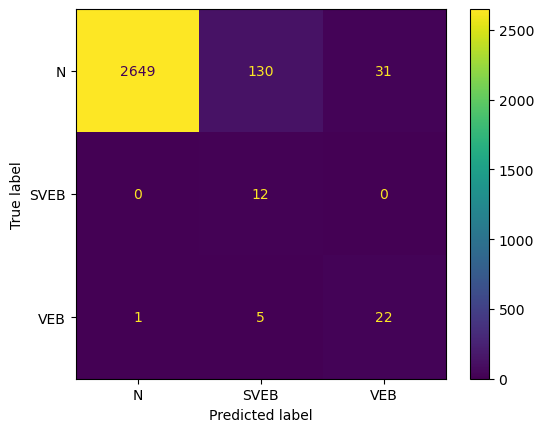

Fold 96:
  Test:  patient=95
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.96      2400
         1.0       0.14      0.89      0.24        38
         2.0       0.74      0.41      0.53       144

    accuracy                           0.91      2582
   macro avg       0.62      0.75      0.58      2582
weighted avg       0.97      0.91      0.93      2582

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.995565   0.137652    0.737500    0.9055     0.623572   
recall        0.935417   0.894737    0.409722    0.9055     0.746625   
f1-score      0.964554   0.238596    0.526786    0.9055     0.576645   
support    2400.000000  38.000000  144.000000    0.9055  2582.000000   

           weighted avg  
precision      0.968547  
recall         0.905500  
f1-score       0.929455  
support     2582.000000  


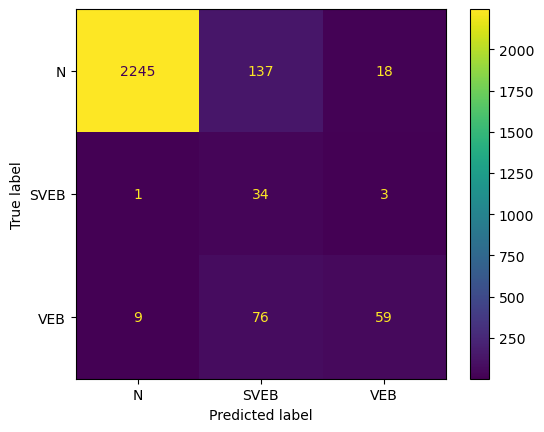

Fold 97:
  Test:  patient=96
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2167
         1.0       0.03      0.25      0.05         8
         2.0       0.20      0.67      0.31         3

    accuracy                           0.96      2178
   macro avg       0.41      0.63      0.45      2178
weighted avg       0.99      0.96      0.98      2178

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     0.999522  0.025641  0.200000  0.960973     0.408388   
recall        0.964006  0.250000  0.666667  0.960973     0.626891   
f1-score      0.981442  0.046512  0.307692  0.960973     0.445215   
support    2167.000000  8.000000  3.000000  0.960973  2178.000000   

           weighted avg  
precision      0.994843  
recall         0.960973  
f1-score       0.977080  
support     2178.000000  


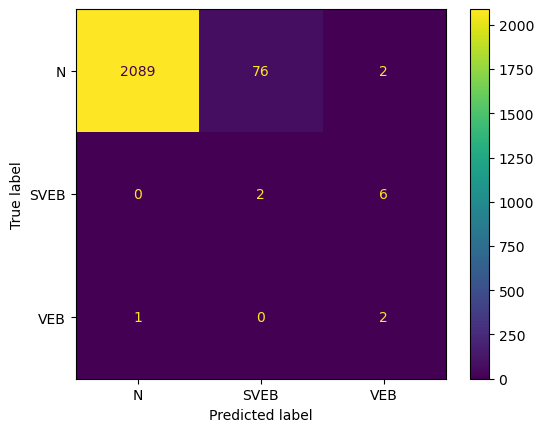

Fold 98:
  Test:  patient=97
              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75      3007
         1.0       0.05      0.87      0.10        69
         2.0       0.84      0.87      0.86       464

    accuracy                           0.65      3540
   macro avg       0.62      0.78      0.57      3540
weighted avg       0.94      0.65      0.75      3540

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.979156   0.050378    0.843096  0.648305     0.624210   
recall        0.609245   0.869565    0.868534  0.648305     0.782448   
f1-score      0.751128   0.095238    0.855626  0.648305     0.567331   
support    3007.000000  69.000000  464.000000  0.648305  3540.000000   

           weighted avg  
precision      0.943218  
recall         0.648305  
f1-score       0.752040  
support     3540.000000  


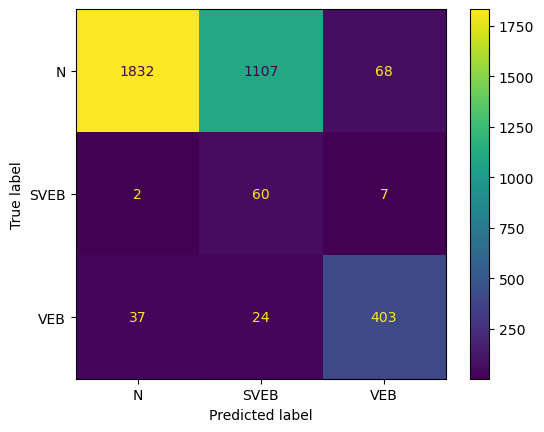

Fold 99:
  Test:  patient=98
              precision    recall  f1-score   support

         0.0       1.00      0.76      0.86      1672
         1.0       0.03      0.88      0.07        17
         2.0       1.00      0.98      0.99       727

    accuracy                           0.83      2416
   macro avg       0.68      0.87      0.64      2416
weighted avg       0.99      0.83      0.90      2416

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.998424   0.034722    1.000000  0.826573     0.677715   
recall        0.757775   0.882353    0.983494  0.826573     0.874541   
f1-score      0.861612   0.066815    0.991678  0.826573     0.640035   
support    1672.000000  17.000000  727.000000  0.826573  2416.000000   

           weighted avg  
precision      0.992117  
recall         0.826573  
f1-score       0.895158  
support     2416.000000  


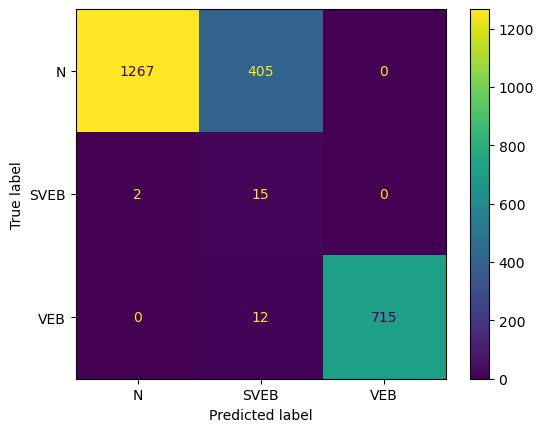

Fold 100:
  Test:  patient=99
              precision    recall  f1-score   support

         0.0       0.95      0.90      0.92      1873
         1.0       0.70      0.64      0.67       569
         2.0       0.17      0.96      0.28        27

    accuracy                           0.84      2469
   macro avg       0.60      0.84      0.63      2469
weighted avg       0.88      0.84      0.86      2469

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.945840    0.697318   0.166667  0.844066     0.603275   
recall        0.904431    0.639719   0.962963  0.844066     0.835704   
f1-score      0.924672    0.667278   0.284153  0.844066     0.625368   
support    1873.000000  569.000000  27.000000  0.844066  2469.000000   

           weighted avg  
precision      0.880046  
recall         0.844066  
f1-score       0.858349  
support     2469.000000  


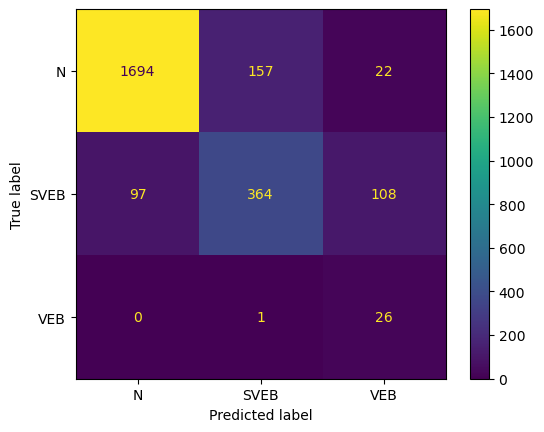

Fold 101:
  Test:  patient=100
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.83      2133
         1.0       0.02      0.54      0.05        26
         2.0       0.20      0.65      0.31        23

    accuracy                           0.71      2182
   macro avg       0.41      0.64      0.39      2182
weighted avg       0.97      0.71      0.82      2182

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991542   0.024561   0.200000  0.711732     0.405368   
recall        0.714487   0.538462   0.652174  0.711732     0.635041   
f1-score      0.830518   0.046980   0.306122  0.711732     0.394540   
support    2133.000000  26.000000  23.000000  0.711732  2182.000000   

           weighted avg  
precision      0.971676  
recall         0.711732  
f1-score       0.815654  
support     2182.000000  


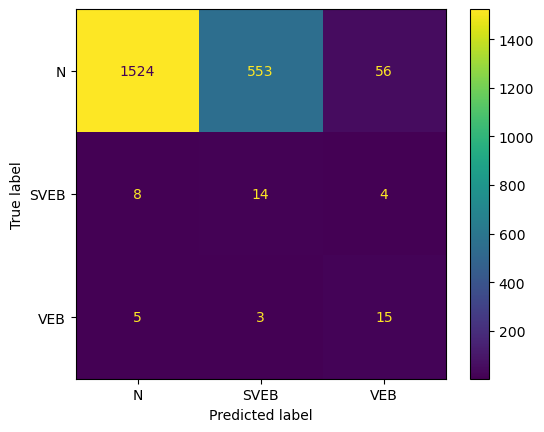

Fold 102:
  Test:  patient=101
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2560
         1.0       0.57      0.75      0.65       321
         2.0       0.67      0.88      0.76       240

    accuracy                           0.91      3121
   macro avg       0.75      0.85      0.79      3121
weighted avg       0.93      0.91      0.91      3121

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.995805    0.567059    0.673077  0.905159     0.745314   
recall        0.927344    0.750779    0.875000  0.905159     0.851041   
f1-score      0.960356    0.646113    0.760870  0.905159     0.789113   
support    2560.000000  321.000000  240.000000  0.905159  3121.000000   

           weighted avg  
precision      0.926891  
recall         0.905159  
f1-score       0.912695  
support     3121.000000  


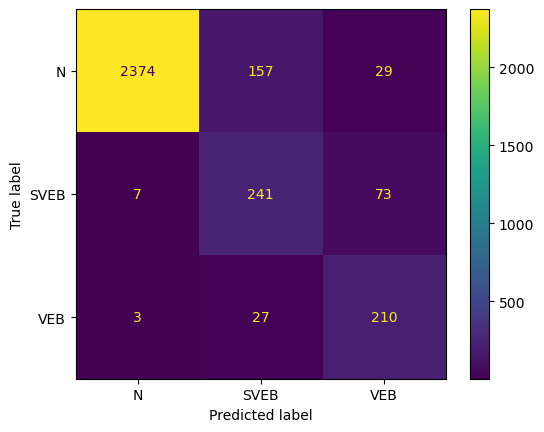

Fold 103:
  Test:  patient=102
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1742
         1.0       0.19      0.95      0.32        19
         2.0       0.93      0.67      0.78       132

    accuracy                           0.95      1893
   macro avg       0.70      0.86      0.69      1893
weighted avg       0.98      0.95      0.96      1893

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.995300   0.189474    0.927083    0.9514     0.703952   
recall        0.972445   0.947368    0.674242    0.9514     0.864685   
f1-score      0.983740   0.315789    0.780702    0.9514     0.693410   
support    1742.000000  19.000000  132.000000    0.9514  1893.000000   

           weighted avg  
precision      0.982455  
recall         0.951400  
f1-score       0.962878  
support     1893.000000  


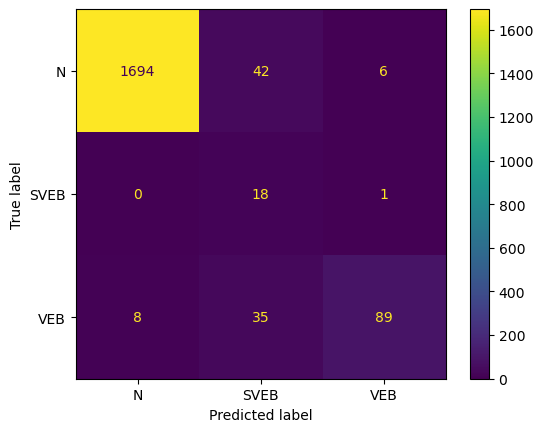

Fold 104:
  Test:  patient=103
              precision    recall  f1-score   support

         0.0       0.48      0.77      0.59      1101
         1.0       0.76      0.42      0.54      1818
         2.0       0.62      0.92      0.74       234

    accuracy                           0.58      3153
   macro avg       0.62      0.71      0.62      3153
weighted avg       0.65      0.58      0.57      3153

                   0.0          1.0         2.0  accuracy    macro avg  \
precision     0.475391     0.755424    0.615385  0.581034     0.615400   
recall        0.772025     0.421342    0.923077  0.581034     0.705481   
f1-score      0.588439     0.540960    0.738462  0.581034     0.622620   
support    1101.000000  1818.000000  234.000000  0.581034  3153.000000   

           weighted avg  
precision      0.647246  
recall         0.581034  
f1-score       0.572197  
support     3153.000000  


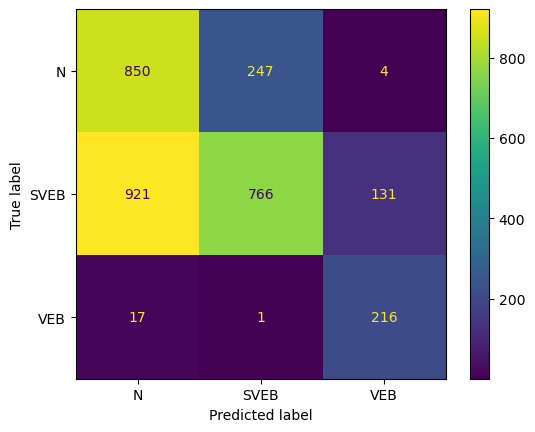

Fold 105:
  Test:  patient=104
              precision    recall  f1-score   support

         0.0       0.94      0.80      0.86      2050
         1.0       0.14      0.63      0.23       167
         2.0       0.81      0.34      0.48       447

    accuracy                           0.71      2664
   macro avg       0.63      0.59      0.52      2664
weighted avg       0.87      0.71      0.76      2664

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.941143    0.141319    0.808511  0.708709     0.630324   
recall        0.795610    0.628743    0.340045  0.708709     0.588132   
f1-score      0.862279    0.230769    0.478740  0.708709     0.523929   
support    2050.000000  167.000000  447.000000  0.708709  2664.000000   

           weighted avg  
precision      0.868749  
recall         0.708709  
f1-score       0.758336  
support     2664.000000  


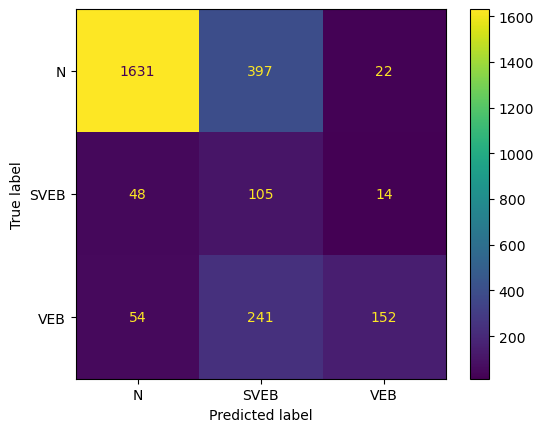

Fold 106:
  Test:  patient=105
              precision    recall  f1-score   support

         0.0       0.95      0.84      0.89      2787
         1.0       0.09      0.28      0.14       136
         2.0       0.10      0.13      0.11        75

    accuracy                           0.80      2998
   macro avg       0.38      0.42      0.38      2998
weighted avg       0.89      0.80      0.84      2998

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.950547    0.089202   0.095238  0.798199     0.378329   
recall        0.841407    0.279412   0.133333  0.798199     0.418051   
f1-score      0.892653    0.135231   0.111111  0.798199     0.379665   
support    2787.000000  136.000000  75.000000  0.798199  2998.000000   

           weighted avg  
precision      0.890077  
recall         0.798199  
f1-score       0.838742  
support     2998.000000  


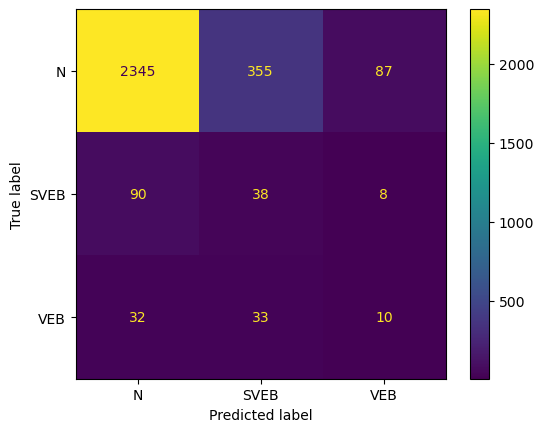

Fold 107:
  Test:  patient=106
              precision    recall  f1-score   support

         0.0       0.95      0.78      0.86      2552
         1.0       0.18      0.73      0.29       227
         2.0       0.56      0.32      0.41       555

    accuracy                           0.70      3334
   macro avg       0.56      0.61      0.52      3334
weighted avg       0.83      0.70      0.74      3334

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.948194    0.182618    0.557632   0.70186     0.562815   
recall        0.781740    0.731278    0.322523   0.70186     0.611847   
f1-score      0.856959    0.292254    0.408676   0.70186     0.519296   
support    2552.000000  227.000000  555.000000   0.70186  3334.000000   

           weighted avg  
precision      0.831053  
recall         0.701860  
f1-score       0.743886  
support     3334.000000  


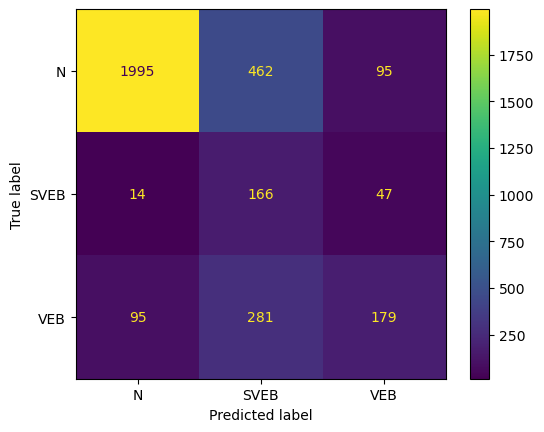

Fold 108:
  Test:  patient=107
              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1506
         1.0       0.80      0.66      0.73       631
         2.0       0.12      0.95      0.22        22

    accuracy                           0.82      2159
   macro avg       0.61      0.84      0.62      2159
weighted avg       0.87      0.82      0.84      2159

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.913547    0.803468   0.122807  0.824456     0.613274   
recall        0.891102    0.660856   0.954545  0.824456     0.835501   
f1-score      0.902185    0.725217   0.217617  0.824456     0.615006   
support    1506.000000  631.000000  22.000000  0.824456  2159.000000   

           weighted avg  
precision      0.873317  
recall         0.824456  
f1-score       0.843488  
support     2159.000000  


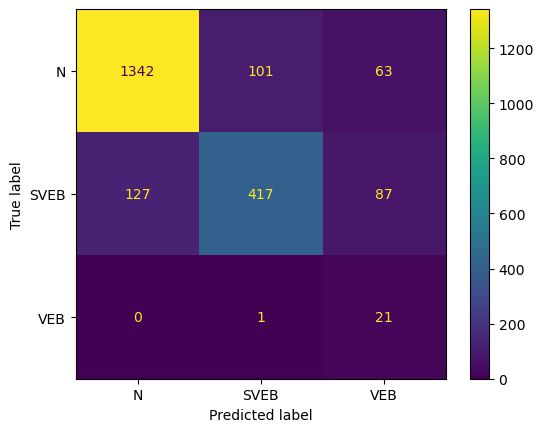

Fold 109:
  Test:  patient=108
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91      1785
         1.0       0.60      0.89      0.72       454
         2.0       0.93      0.85      0.89       437

    accuracy                           0.87      2676
   macro avg       0.83      0.87      0.84      2676
weighted avg       0.90      0.87      0.88      2676

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.963863    0.604167    0.934837  0.869208     0.834289   
recall        0.866667    0.894273    0.853547  0.869208     0.871496   
f1-score      0.912684    0.721137    0.892344  0.869208     0.842055   
support    1785.000000  454.000000  437.000000  0.869208  2676.000000   

           weighted avg  
precision      0.898098  
recall         0.869208  
f1-score       0.876866  
support     2676.000000  


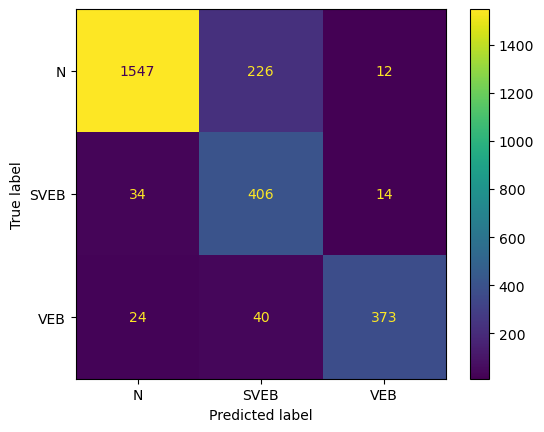

Fold 110:
  Test:  patient=109
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1774
         1.0       0.58      0.92      0.71        12
         2.0       0.57      1.00      0.73         8

    accuracy                           0.99      1794
   macro avg       0.72      0.97      0.81      1794
weighted avg       0.99      0.99      0.99      1794

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.999432   0.578947  0.571429  0.991639     0.716603   
recall        0.992108   0.916667  1.000000  0.991639     0.969592   
f1-score      0.995757   0.709677  0.727273  0.991639     0.810902   
support    1774.000000  12.000000  8.000000  0.991639  1794.000000   

           weighted avg  
precision      0.994711  
recall         0.991639  
f1-score       0.992646  
support     1794.000000  


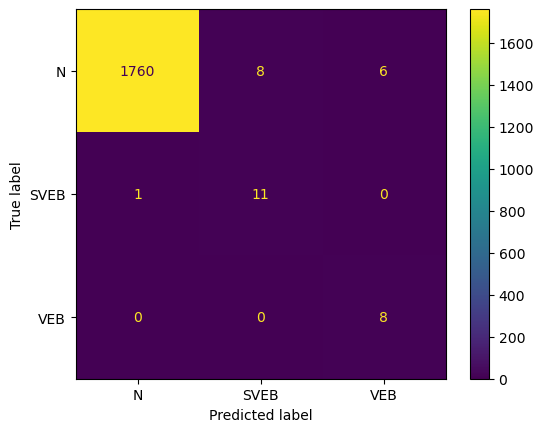

Fold 111:
  Test:  patient=110
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1896
         1.0       0.54      0.78      0.64         9
         2.0       0.97      0.97      0.97        74

    accuracy                           1.00      1979
   macro avg       0.84      0.92      0.87      1979
weighted avg       1.00      1.00      1.00      1979

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     1.000000  0.538462   0.972973  0.995958     0.837145   
recall        0.997890  0.777778   0.972973  0.995958     0.916214   
f1-score      0.998944  0.636364   0.972973  0.995958     0.869427   
support    1896.000000  9.000000  74.000000  0.995958  1979.000000   

           weighted avg  
precision      0.996890  
recall         0.995958  
f1-score       0.996324  
support     1979.000000  


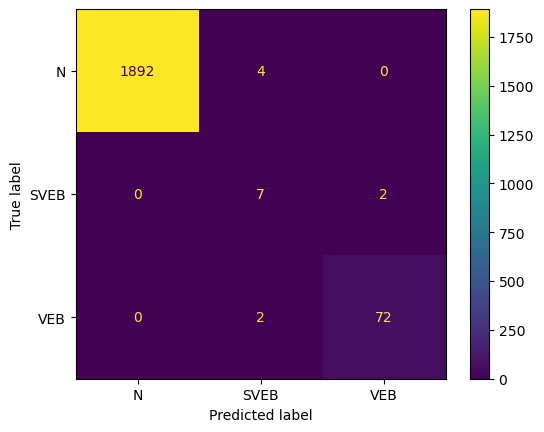

Fold 112:
  Test:  patient=111
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      1624
         1.0       0.07      0.67      0.12        15
         2.0       0.20      0.08      0.11        26

    accuracy                           0.90      1665
   macro avg       0.42      0.55      0.40      1665
weighted avg       0.97      0.90      0.93      1665

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.988734   0.068493   0.200000  0.903303     0.419076   
recall        0.918719   0.666667   0.076923  0.903303     0.554103   
f1-score      0.952442   0.124224   0.111111  0.903303     0.395925   
support    1624.000000  15.000000  26.000000  0.903303  1665.000000   

           weighted avg  
precision      0.968127  
recall         0.903303  
f1-score       0.931842  
support     1665.000000  


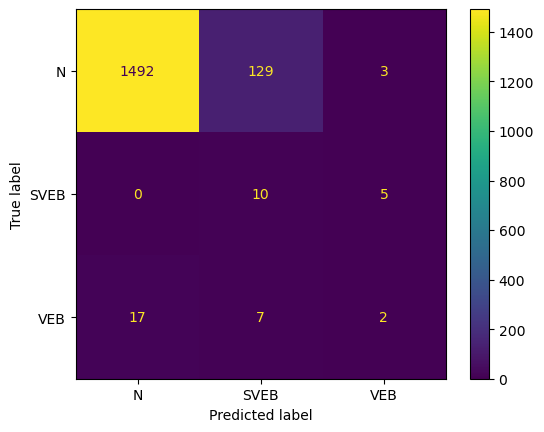

Fold 113:
  Test:  patient=112
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      2188
         1.0       0.00      0.00      0.00         9
         2.0       0.13      0.93      0.24        41

    accuracy                           0.89      2238
   macro avg       0.38      0.61      0.39      2238
weighted avg       0.98      0.89      0.92      2238

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995908  0.0   0.134752  0.886953     0.376887      0.976127
recall        0.889854  0.0   0.926829  0.886953     0.605561      0.886953
f1-score      0.939899  0.0   0.235294  0.886953     0.391731      0.923211
support    2188.000000  9.0  41.000000  0.886953  2238.000000   2238.000000


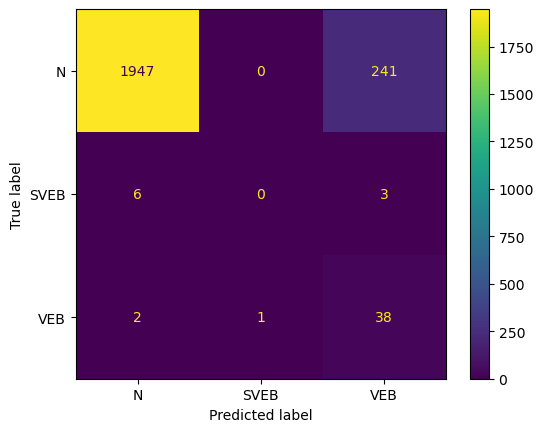

Fold 114:
  Test:  patient=113
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1944
         1.0       0.16      0.88      0.26         8
         2.0       1.00      0.93      0.96        97

    accuracy                           0.98      2049
   macro avg       0.72      0.93      0.74      2049
weighted avg       1.00      0.98      0.99      2049

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.999478  0.155556   1.000000  0.980966     0.718344   
recall        0.984053  0.875000   0.927835  0.980966     0.928963   
f1-score      0.991706  0.264151   0.962567  0.980966     0.739474   
support    1944.000000  8.000000  97.000000  0.980966  2049.000000   

           weighted avg  
precision      0.996207  
recall         0.980966  
f1-score       0.987485  
support     2049.000000  


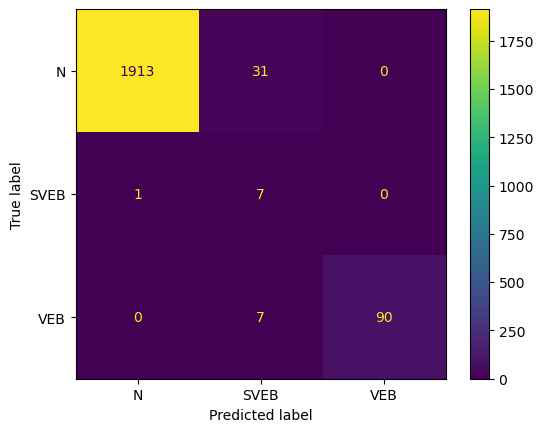

Fold 115:
  Test:  patient=114


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      2004
         1.0       0.26      0.96      0.41       135
         2.0       0.00      0.00      0.00         0

    accuracy                           0.82      2139
   macro avg       0.42      0.59      0.44      2139
weighted avg       0.95      0.82      0.86      2139

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999384    0.261044  0.0  0.819542     0.420143      0.952785
recall        0.809880    0.962963  NaN  0.819542     0.590948      0.819542
f1-score      0.894708    0.410742  NaN  0.819542     0.435150      0.864163
support    2004.000000  135.000000  0.0  0.819542  2139.000000   2139.000000


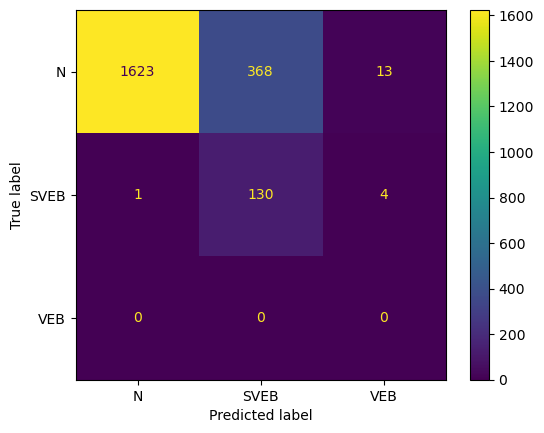

Fold 116:
  Test:  patient=115
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1839
         1.0       0.83      0.91      0.87       196
         2.0       1.00      1.00      1.00         1

    accuracy                           0.97      2036
   macro avg       0.94      0.96      0.95      2036
weighted avg       0.98      0.97      0.97      2036

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.990654    0.828704  1.0  0.973477     0.939786      0.975068
recall        0.979880    0.913265  1.0  0.973477     0.964382      0.973477
f1-score      0.985238    0.868932  1.0  0.973477     0.951390      0.974049
support    1839.000000  196.000000  1.0  0.973477  2036.000000   2036.000000


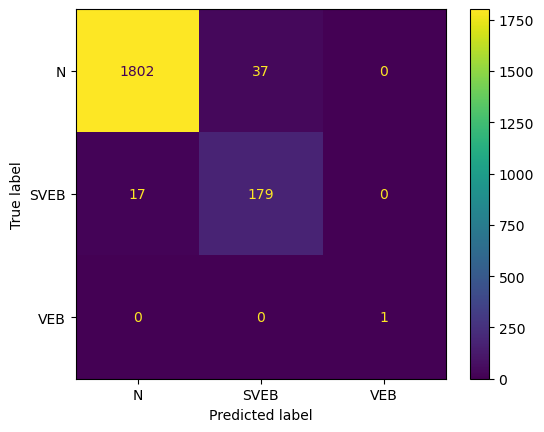

Fold 117:
  Test:  patient=116
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1589
         1.0       0.74      0.81      0.78        64
         2.0       1.00      1.00      1.00       256

    accuracy                           0.98      1909
   macro avg       0.91      0.93      0.92      1909
weighted avg       0.98      0.98      0.98      1909

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.992415   0.742857    0.996109  0.983761     0.910460   
recall        0.988043   0.812500    1.000000  0.983761     0.933514   
f1-score      0.990224   0.776119    0.998051  0.983761     0.921465   
support    1589.000000  64.000000  256.000000  0.983761  1909.000000   

           weighted avg  
precision      0.984544  
recall         0.983761  
f1-score       0.984096  
support     1909.000000  


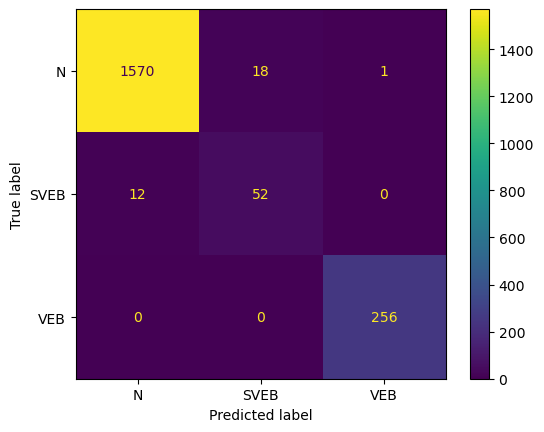

Fold 118:
  Test:  patient=117
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1470
         1.0       0.34      0.98      0.50        48
         2.0       1.00      0.89      0.94       542

    accuracy                           0.95      2060
   macro avg       0.78      0.95      0.81      2060
weighted avg       0.98      0.95      0.96      2060

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     1.000000   0.338129    0.995893  0.954369     0.778008   
recall        0.975510   0.979167    0.894834  0.954369     0.949837   
f1-score      0.987603   0.502674    0.942663  0.954369     0.810980   
support    1470.000000  48.000000  542.000000  0.954369  2060.000000   

           weighted avg  
precision      0.983497  
recall         0.954369  
f1-score       0.964480  
support     2060.000000  


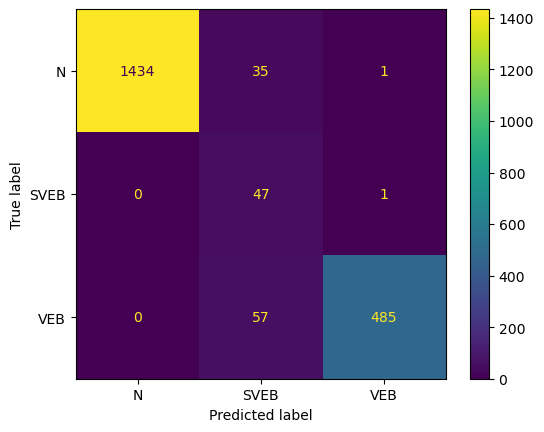

Fold 119:
  Test:  patient=118
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78      3103
         1.0       0.17      0.86      0.28       241
         2.0       0.51      0.84      0.63       141

    accuracy                           0.67      3485
   macro avg       0.56      0.78      0.56      3485
weighted avg       0.92      0.67      0.74      3485

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.997996    0.165342    0.510823  0.665136     0.558053   
recall        0.641959    0.863071    0.836879  0.665136     0.780636   
f1-score      0.781330    0.277518    0.634409  0.665136     0.564419   
support    3103.000000  241.000000  141.000000  0.665136  3485.000000   

           weighted avg  
precision      0.920704  
recall         0.665136  
f1-score       0.740545  
support     3485.000000  


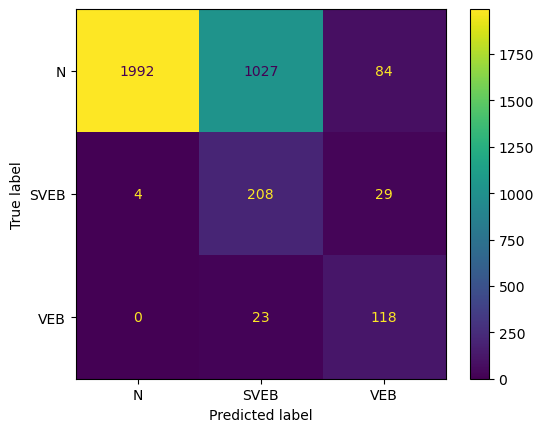

Fold 120:
  Test:  patient=119
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      1323
         1.0       0.49      0.30      0.37       628
         2.0       0.45      0.54      0.49       307

    accuracy                           0.70      2258
   macro avg       0.58      0.59      0.57      2258
weighted avg       0.67      0.70      0.68      2258

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.811875    0.485861    0.445946  0.695748     0.581227   
recall        0.919879    0.300955    0.537459  0.695748     0.586098   
f1-score      0.862509    0.371681    0.487445  0.695748     0.573878   
support    1323.000000  628.000000  307.000000  0.695748  2258.000000   

           weighted avg  
precision      0.671451  
recall         0.695748  
f1-score       0.675005  
support     2258.000000  


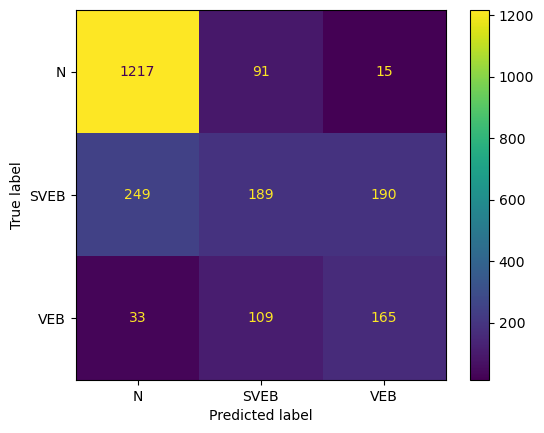

Fold 121:
  Test:  patient=120
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1887
         1.0       0.95      1.00      0.98        41
         2.0       1.00      0.60      0.75         5

    accuracy                           1.00      1933
   macro avg       0.98      0.87      0.91      1933
weighted avg       1.00      1.00      1.00      1933

              0.0        1.0   2.0  accuracy    macro avg  weighted avg
precision     1.0   0.953488  1.00  0.998965     0.984496      0.999013
recall        1.0   1.000000  0.60  0.998965     0.866667      0.998965
f1-score      1.0   0.976190  0.75  0.998965     0.908730      0.998848
support    1887.0  41.000000  5.00  0.998965  1933.000000   1933.000000


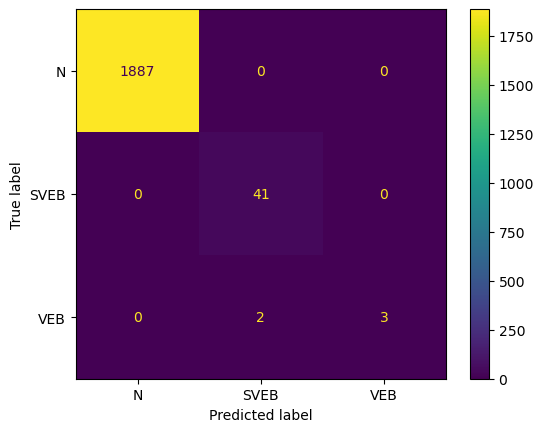

Fold 122:
  Test:  patient=121
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1771
         1.0       0.95      1.00      0.98        40
         2.0       1.00      0.86      0.92         7

    accuracy                           1.00      1818
   macro avg       0.98      0.95      0.97      1818
weighted avg       1.00      1.00      1.00      1818

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.952381  1.000000    0.9989     0.984127   
recall        0.999435   1.000000  0.857143    0.9989     0.952193   
f1-score      0.999718   0.975610  0.923077    0.9989     0.966135   
support    1771.000000  40.000000  7.000000    0.9989  1818.000000   

           weighted avg  
precision      0.998952  
recall         0.998900  
f1-score       0.998892  
support     1818.000000  


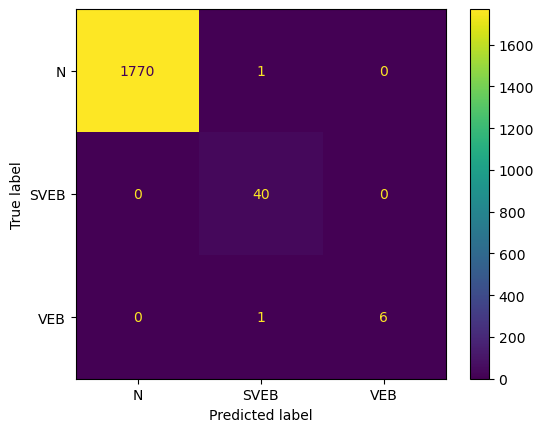

Fold 123:
  Test:  patient=122
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2484
         1.0       0.36      0.94      0.53        53
         2.0       0.96      0.99      0.97       343

    accuracy                           0.96      2880
   macro avg       0.77      0.96      0.83      2880
weighted avg       0.98      0.96      0.97      2880

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.998743   0.364964    0.955056  0.963194     0.772921   
recall        0.959742   0.943396    0.991254  0.963194     0.964797   
f1-score      0.978854   0.526316    0.972818  0.963194     0.825996   
support    2484.000000  53.000000  343.000000  0.963194  2880.000000   

           weighted avg  
precision      0.981877  
recall         0.963194  
f1-score       0.969808  
support     2880.000000  


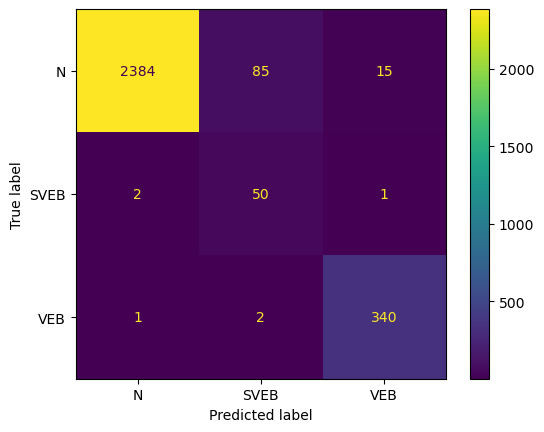

Fold 124:
  Test:  patient=123
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      1505
         1.0       0.85      0.79      0.82       399
         2.0       0.90      0.69      0.78        54

    accuracy                           0.93      1958
   macro avg       0.90      0.82      0.85      1958
weighted avg       0.92      0.93      0.92      1958

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.944948    0.849866   0.902439  0.925945     0.899084   
recall        0.969435    0.794486   0.685185  0.925945     0.816369   
f1-score      0.957035    0.821244   0.778947  0.925945     0.852409   
support    1505.000000  399.000000  54.000000  0.925945  1958.000000   

           weighted avg  
precision      0.924400  
recall         0.925945  
f1-score       0.924452  
support     1958.000000  


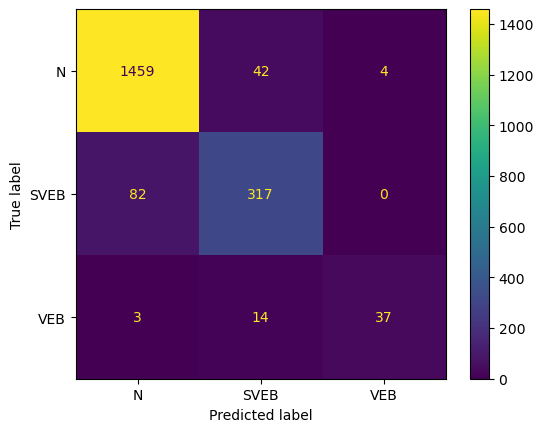

Fold 125:
  Test:  patient=124
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      2168
         1.0       0.03      0.38      0.06        26
         2.0       0.08      0.74      0.14        27

    accuracy                           0.75      2221
   macro avg       0.37      0.63      0.35      2221
weighted avg       0.98      0.75      0.84      2221

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     1.000000   0.030675   0.076923  0.749662     0.369199   
recall        0.754151   0.384615   0.740741  0.749662     0.626502   
f1-score      0.859847   0.056818   0.139373  0.749662     0.352013   
support    2168.000000  26.000000  27.000000  0.749662  2221.000000   

           weighted avg  
precision      0.977431  
recall         0.749662  
f1-score       0.841688  
support     2221.000000  


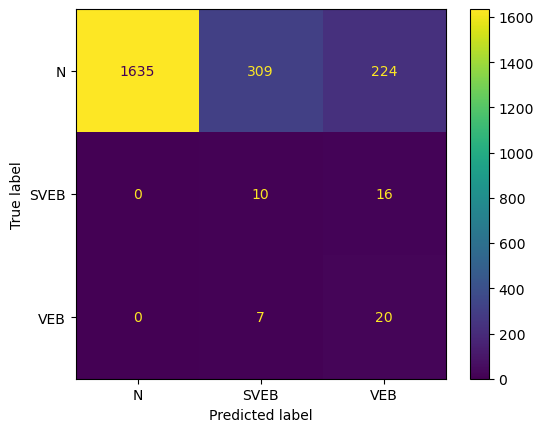

Fold 126:
  Test:  patient=125
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94      2352
         1.0       0.23      0.91      0.37       125
         2.0       0.86      0.23      0.37       210

    accuracy                           0.84      2687
   macro avg       0.69      0.68      0.56      2687
weighted avg       0.94      0.84      0.87      2687

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.982268    0.234086    0.859649  0.844064     0.692001   
recall        0.894983    0.912000    0.233333  0.844064     0.680105   
f1-score      0.936596    0.372549    0.367041  0.844064     0.558729   
support    2352.000000  125.000000  210.000000  0.844064  2687.000000   

           weighted avg  
precision      0.937879  
recall         0.844064  
f1-score       0.865844  
support     2687.000000  


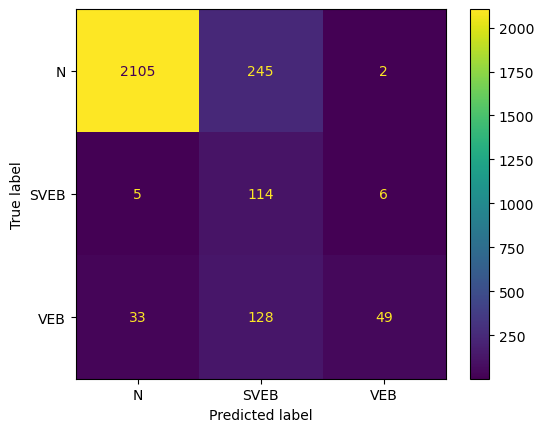

Fold 127:
  Test:  patient=126
              precision    recall  f1-score   support

         0.0       0.99      0.74      0.85      2189
         1.0       0.04      0.35      0.07        68
         2.0       0.23      0.31      0.26        54

    accuracy                           0.72      2311
   macro avg       0.42      0.47      0.40      2311
weighted avg       0.95      0.72      0.81      2311

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.992674   0.040134   0.226667  0.721333     0.419825   
recall        0.742805   0.352941   0.314815  0.721333     0.470187   
f1-score      0.849752   0.072072   0.263566  0.721333     0.395130   
support    2189.000000  68.000000  54.000000  0.721333  2311.000000   

           weighted avg  
precision      0.946747  
recall         0.721333  
f1-score       0.813172  
support     2311.000000  


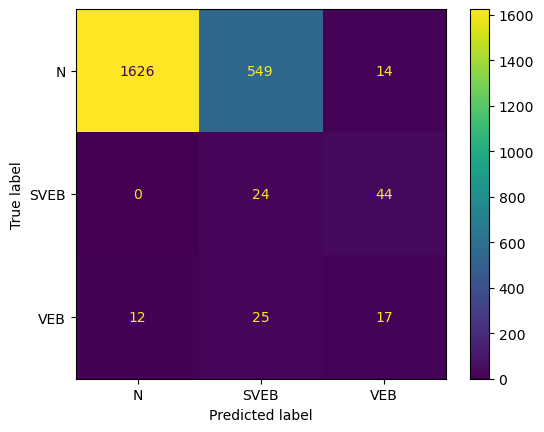

Fold 128:
  Test:  patient=127
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1464
         1.0       0.76      0.82      0.78       152
         2.0       0.96      0.89      0.93        91

    accuracy                           0.96      1707
   macro avg       0.90      0.89      0.90      1707
weighted avg       0.96      0.96      0.96      1707

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.980809    0.756098   0.964286  0.958407     0.900397   
recall        0.977459    0.815789   0.890110  0.958407     0.894453   
f1-score      0.979131    0.784810   0.925714  0.958407     0.896552   
support    1464.000000  152.000000  91.000000  0.958407  1707.000000   

           weighted avg  
precision      0.959918  
recall         0.958407  
f1-score       0.958980  
support     1707.000000  


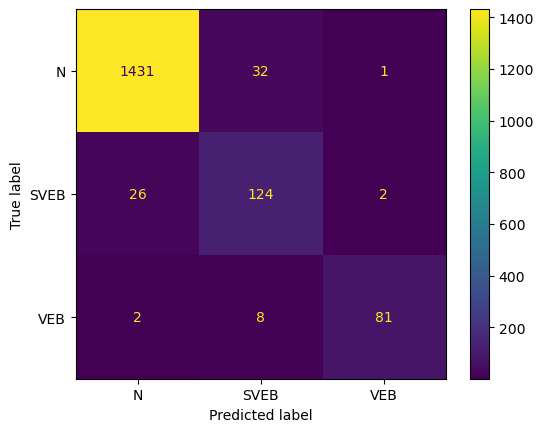

Fold 129:
  Test:  patient=128
              precision    recall  f1-score   support

         0.0       0.99      0.69      0.81      2001
         1.0       0.18      0.11      0.14        74
         2.0       0.11      0.82      0.19        97

    accuracy                           0.67      2172
   macro avg       0.43      0.54      0.38      2172
weighted avg       0.92      0.67      0.76      2172

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.988497   0.181818   0.108548  0.673573     0.426288   
recall        0.687156   0.108108   0.824742  0.673573     0.540002   
f1-score      0.810731   0.135593   0.191847  0.673573     0.379390   
support    2001.000000  74.000000  97.000000  0.673573  2172.000000   

           weighted avg  
precision      0.921716  
recall         0.673573  
f1-score       0.760090  
support     2172.000000  


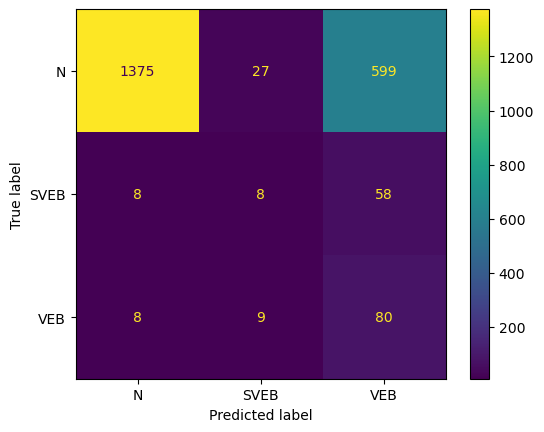

Fold 130:
  Test:  patient=129
              precision    recall  f1-score   support

         0.0       0.97      0.67      0.80      2120
         1.0       0.24      0.83      0.38       277
         2.0       0.24      0.23      0.23       207

    accuracy                           0.65      2604
   macro avg       0.49      0.58      0.47      2604
weighted avg       0.84      0.65      0.71      2604

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.974079    0.244161    0.239796  0.654762     0.486012   
recall        0.673585    0.830325    0.227053  0.654762     0.576988   
f1-score      0.796431    0.377358    0.233251  0.654762     0.469013   
support    2120.000000  277.000000  207.000000  0.654762  2604.000000   

           weighted avg  
precision      0.838064  
recall         0.654762  
f1-score       0.707083  
support     2604.000000  


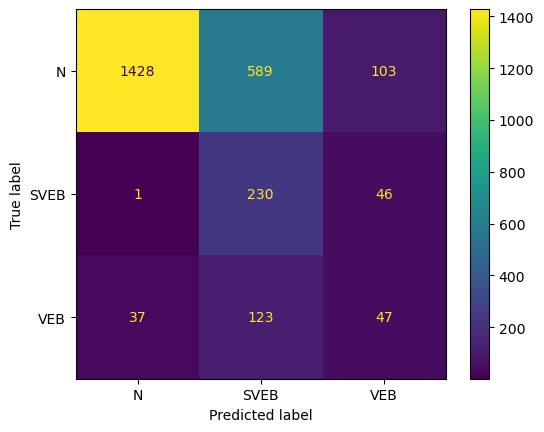

Fold 131:
  Test:  patient=130
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96      1740
         1.0       0.81      0.90      0.85       523
         2.0       0.92      0.95      0.94       577

    accuracy                           0.93      2840
   macro avg       0.90      0.93      0.92      2840
weighted avg       0.94      0.93      0.93      2840

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.980108    0.810997    0.919866  0.932746     0.903657   
recall        0.934483    0.902486    0.954939  0.932746     0.930636   
f1-score      0.956752    0.854299    0.937075  0.932746     0.916042   
support    1740.000000  523.000000  577.000000  0.932746  2840.000000   

           weighted avg  
precision      0.936726  
recall         0.932746  
f1-score       0.933887  
support     2840.000000  


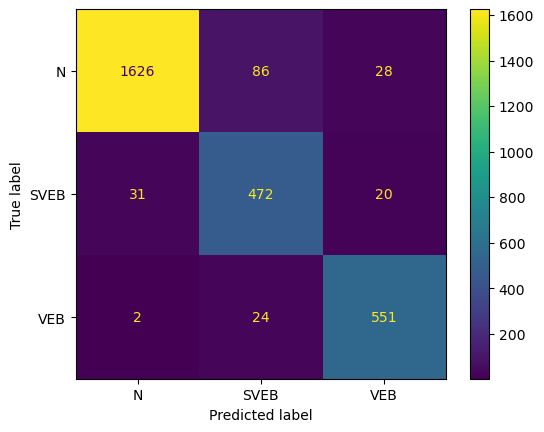

Fold 132:
  Test:  patient=131


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      2188
         1.0       0.00      0.00      0.00         0
         2.0       0.91      0.95      0.93       338

    accuracy                           0.87      2526
   macro avg       0.64      0.60      0.62      2526
weighted avg       0.99      0.87      0.93      2526

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999470  0.0    0.911932  0.874109     0.637134      0.987757
recall        0.862431  NaN    0.949704  0.874109     0.604045      0.874109
f1-score      0.925908  NaN    0.930435  0.874109     0.618781      0.926514
support    2188.000000  0.0  338.000000  0.874109  2526.000000   2526.000000


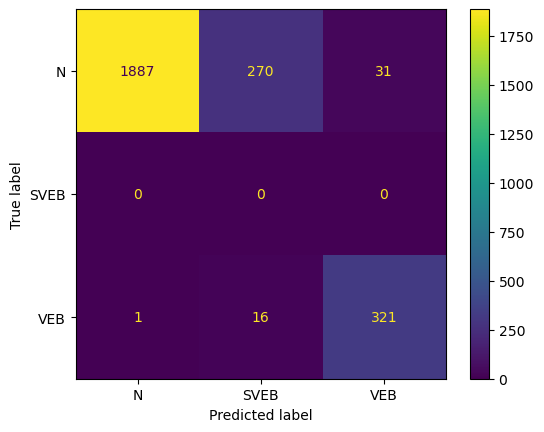

Fold 133:
  Test:  patient=132
              precision    recall  f1-score   support

         0.0       1.00      0.64      0.78      2211
         1.0       0.08      0.51      0.13        80
         2.0       0.13      0.92      0.22        53

    accuracy                           0.65      2344
   macro avg       0.40      0.69      0.38      2344
weighted avg       0.95      0.65      0.75      2344

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.997901   0.077358   0.127273  0.646758     0.400844   
recall        0.644957   0.512500   0.924528  0.646758     0.693995   
f1-score      0.783516   0.134426   0.223744  0.646758     0.380562   
support    2211.000000  80.000000  53.000000  0.646758  2344.000000   

           weighted avg  
precision      0.946797  
recall         0.646758  
f1-score       0.748706  
support     2344.000000  


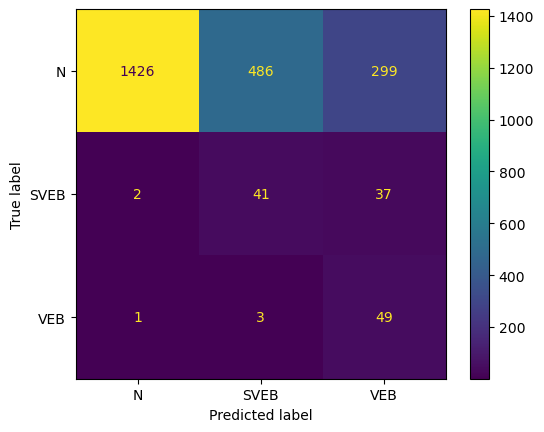

Fold 134:
  Test:  patient=133


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2411
         1.0       0.00      0.00      0.00         0
         2.0       0.82      0.99      0.90       344

    accuracy                           0.97      2755
   macro avg       0.61      0.65      0.63      2755
weighted avg       0.98      0.97      0.97      2755

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999571  0.0    0.820144   0.96951     0.606572      0.977167
recall        0.965989  NaN    0.994186   0.96951     0.653392      0.969510
f1-score      0.982493  NaN    0.898817   0.96951     0.627103      0.972045
support    2411.000000  0.0  344.000000   0.96951  2755.000000   2755.000000


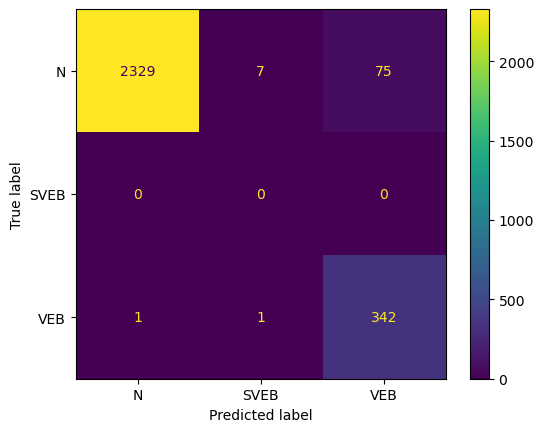

Fold 135:
  Test:  patient=134


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2443
         1.0       0.00      0.00      0.00         0
         2.0       0.63      1.00      0.77       229

    accuracy                           0.95      2672
   macro avg       0.54      0.65      0.58      2672
weighted avg       0.97      0.95      0.95      2672

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.629834  0.945734     0.543278      0.968275
recall        0.941056  NaN    0.995633  0.945734     0.645563      0.945734
f1-score      0.969633  NaN    0.771574  0.945734     0.580402      0.952659
support    2443.000000  0.0  229.000000  0.945734  2672.000000   2672.000000


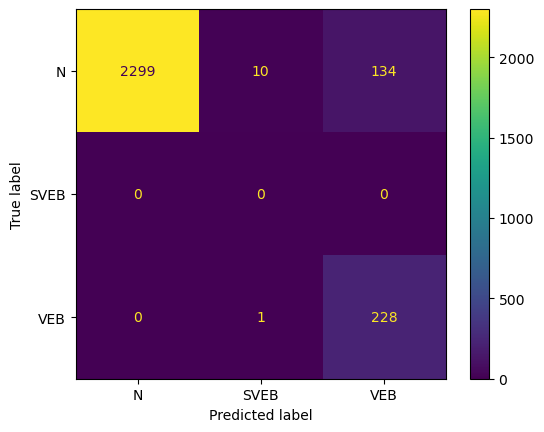

Fold 136:
  Test:  patient=135
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2323
         1.0       0.02      1.00      0.05         2
         2.0       1.00      0.57      0.72       125

    accuracy                           0.97      2450
   macro avg       0.67      0.85      0.59      2450
weighted avg       1.00      0.97      0.98      2450

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     1.000000  0.023256    1.00000  0.965714     0.674419   
recall        0.987086  1.000000    0.56800  0.965714     0.851695   
f1-score      0.993501  0.045455    0.72449  0.965714     0.587815   
support    2323.000000  2.000000  125.00000  0.965714  2450.000000   

           weighted avg  
precision      0.999203  
recall         0.965714  
f1-score       0.979002  
support     2450.000000  


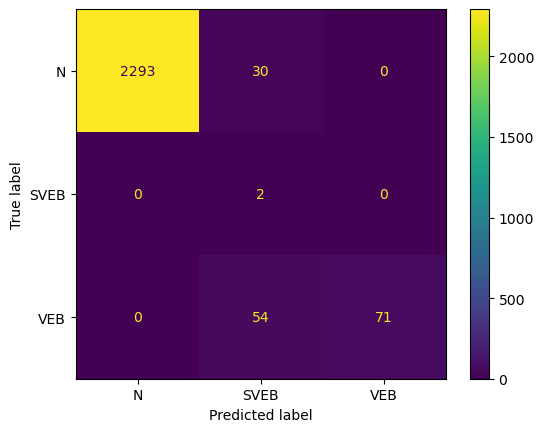

Fold 137:
  Test:  patient=136
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2268
         1.0       0.29      0.12      0.17        16
         2.0       0.92      0.77      0.84       121

    accuracy                           0.98      2405
   macro avg       0.73      0.63      0.67      2405
weighted avg       0.98      0.98      0.98      2405

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.984327   0.285714    0.920792  0.979626     0.730278   
recall        0.996914   0.125000    0.768595  0.979626     0.630170   
f1-score      0.990581   0.173913    0.837838  0.979626     0.667444   
support    2268.000000  16.000000  121.000000  0.979626  2405.000000   

           weighted avg  
precision      0.976483  
recall         0.979626  
f1-score       0.977463  
support     2405.000000  


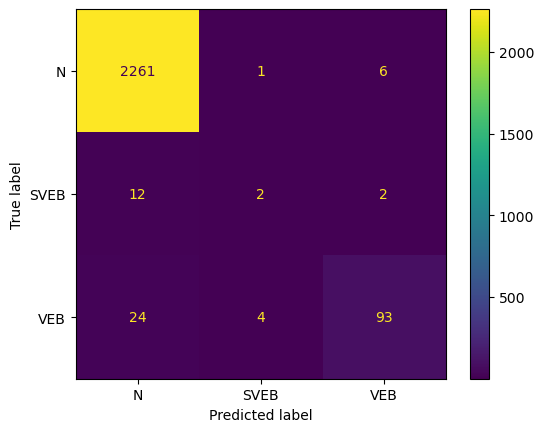

Fold 138:
  Test:  patient=137


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1518
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.85      0.91       247

    accuracy                           0.98      1765
   macro avg       0.66      0.62      0.63      1765
weighted avg       0.98      0.98      0.98      1765

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.979909  0.0    0.985915  0.975637     0.655275      0.980750
recall        0.996047  NaN    0.850202  0.975637     0.615417      0.975637
f1-score      0.987912  NaN    0.913043  0.975637     0.633652      0.977435
support    1518.000000  0.0  247.000000  0.975637  1765.000000   1765.000000


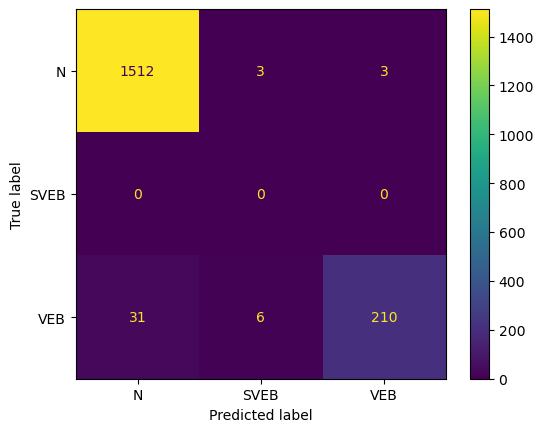

Fold 139:
  Test:  patient=138
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2434
         1.0       0.62      1.00      0.77        48
         2.0       1.00      0.89      0.94         9

    accuracy                           0.99      2491
   macro avg       0.87      0.96      0.90      2491
weighted avg       0.99      0.99      0.99      2491

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.623377  1.000000  0.988358     0.874459   
recall        0.988496   1.000000  0.888889  0.988358     0.959128   
f1-score      0.994215   0.768000  0.941176  0.988358     0.901130   
support    2434.000000  48.000000  9.000000  0.988358  2491.000000   

           weighted avg  
precision      0.992743  
recall         0.988358  
f1-score       0.989664  
support     2491.000000  


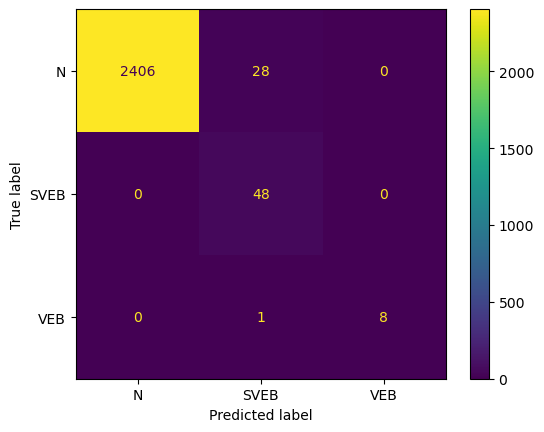

Fold 140:
  Test:  patient=139
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2638
         1.0       0.89      0.95      0.92        65
         2.0       0.50      1.00      0.67         1

    accuracy                           1.00      2704
   macro avg       0.79      0.98      0.86      2704
weighted avg       1.00      1.00      1.00      2704

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.999240   0.885714  0.500000  0.995932     0.794985   
recall        0.996967   0.953846  1.000000  0.995932     0.983605   
f1-score      0.998102   0.918519  0.666667  0.995932     0.861096   
support    2638.000000  65.000000  1.000000  0.995932  2704.000000   

           weighted avg  
precision      0.996327  
recall         0.995932  
f1-score       0.996067  
support     2704.000000  


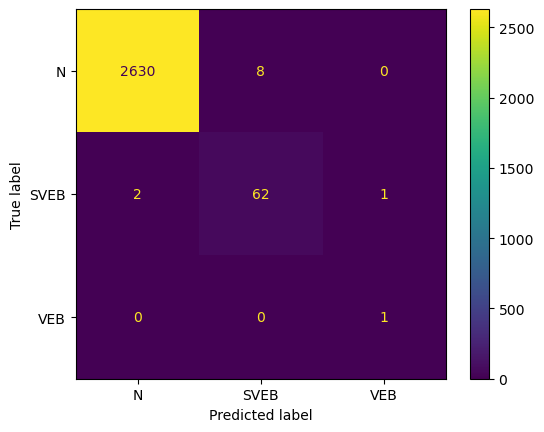

Fold 141:
  Test:  patient=140
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      1776
         1.0       0.02      0.50      0.04         2
         2.0       0.96      0.88      0.92       350

    accuracy                           0.97      2128
   macro avg       0.66      0.79      0.65      2128
weighted avg       0.99      0.97      0.98      2128

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.994872  0.018868    0.962500  0.965695     0.658747   
recall        0.983108  0.500000    0.880000  0.965695     0.787703   
f1-score      0.988955  0.036364    0.919403  0.965695     0.648241   
support    1776.000000  2.000000  350.000000  0.965695  2128.000000   

           weighted avg  
precision      0.988630  
recall         0.965695  
f1-score       0.976620  
support     2128.000000  


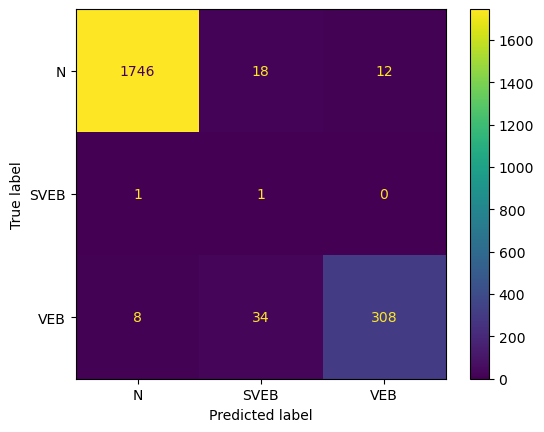

Fold 142:
  Test:  patient=141


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2946
         1.0       0.00      0.00      0.00         0
         2.0       0.95      0.95      0.95        41

    accuracy                           0.98      2987
   macro avg       0.65      0.64      0.65      2987
weighted avg       1.00      0.98      0.99      2987

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999653  0.0   0.95122  0.977235     0.650291      0.998988
recall        0.977597  NaN   0.95122  0.977235     0.642939      0.977235
f1-score      0.988502  NaN   0.95122  0.977235     0.646574      0.987990
support    2946.000000  0.0  41.00000  0.977235  2987.000000   2987.000000


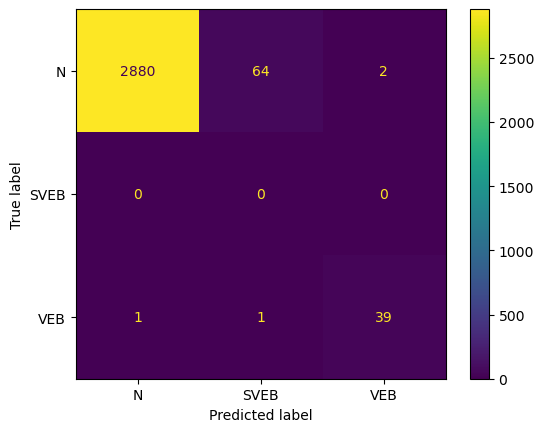

Fold 143:
  Test:  patient=142


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3597
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.99      0.99        83

    accuracy                           1.00      3680
   macro avg       0.66      0.66      0.66      3680
weighted avg       1.00      1.00      1.00      3680

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.987952  0.998098     0.662651      0.999728
recall        0.998332  NaN   0.987952  0.998098     0.662095      0.998098
f1-score      0.999165  NaN   0.987952  0.998098     0.662372      0.998912
support    3597.000000  0.0  83.000000  0.998098  3680.000000   3680.000000


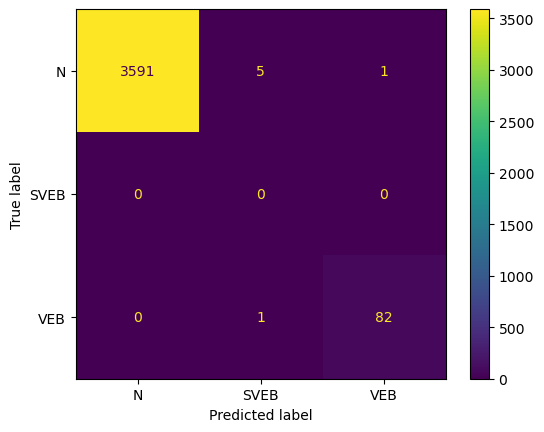

Fold 144:
  Test:  patient=143


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2076
         1.0       0.00      0.00      0.00         0
         2.0       0.80      1.00      0.89         4

    accuracy                           0.98      2080
   macro avg       0.60      0.66      0.63      2080
weighted avg       1.00      0.98      0.99      2080

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.800000  0.983654     0.600000      0.999615
recall        0.983622  NaN  1.000000  0.983654     0.661207      0.983654
f1-score      0.991744  NaN  0.888889  0.983654     0.626877      0.991546
support    2076.000000  0.0  4.000000  0.983654  2080.000000   2080.000000


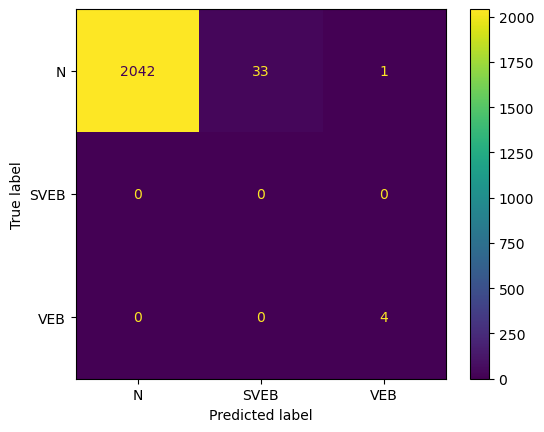

Fold 145:
  Test:  patient=144
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2798
         1.0       0.00      0.00      0.00         1
         2.0       0.42      0.83      0.56         6

    accuracy                           0.99      2805
   macro avg       0.47      0.61      0.52      2805
weighted avg       1.00      0.99      0.99      2805

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.416667  0.987166     0.472222      0.998396
recall        0.987848  0.0  0.833333  0.987166     0.607061      0.987166
f1-score      0.993887  0.0  0.555556  0.987166     0.516481      0.992595
support    2798.000000  1.0  6.000000  0.987166  2805.000000   2805.000000


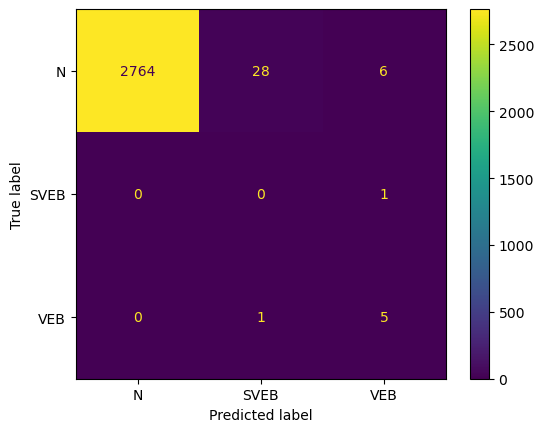

Fold 146:
  Test:  patient=145


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1791
         1.0       0.00      0.00      0.00         0
         2.0       0.98      1.00      0.99       230

    accuracy                           1.00      2021
   macro avg       0.66      0.67      0.66      2021
weighted avg       1.00      1.00      1.00      2021

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.982906  0.997526     0.660969      0.998055
recall        0.997208  NaN    1.000000  0.997526     0.665736      0.997526
f1-score      0.998602  NaN    0.991379  0.997526     0.663327      0.997780
support    1791.000000  0.0  230.000000  0.997526  2021.000000   2021.000000


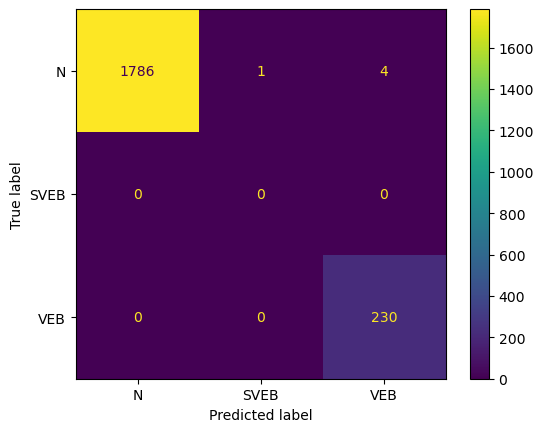

Fold 147:
  Test:  patient=146


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1800
         1.0       0.00      0.00      0.00         0
         2.0       0.95      0.98      0.97        64

    accuracy                           0.99      1864
   macro avg       0.65      0.66      0.66      1864
weighted avg       1.00      0.99      0.99      1864

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999440  0.0   0.954545  0.991953     0.651329      0.997899
recall        0.992222  NaN   0.984375  0.991953     0.658866      0.991953
f1-score      0.995818  NaN   0.969231  0.991953     0.655016      0.994905
support    1800.000000  0.0  64.000000  0.991953  1864.000000   1864.000000


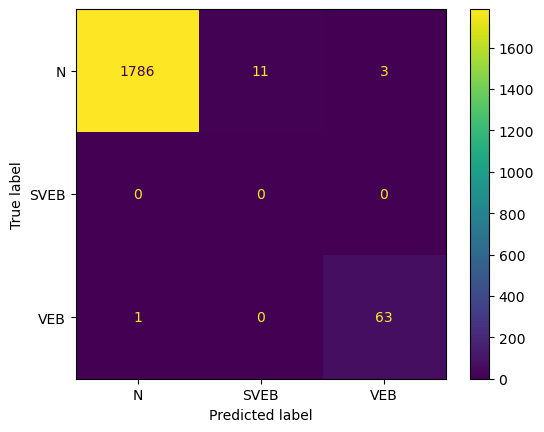

Fold 148:
  Test:  patient=147


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      2630
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00         3

    accuracy                           0.95      2633
   macro avg       0.67      0.65      0.66      2633
weighted avg       1.00      0.95      0.98      2633

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  1.0  0.954804     0.666667      1.000000
recall        0.954753  NaN  1.0  0.954804     0.651584      0.954804
f1-score      0.976853  NaN  1.0  0.954804     0.658951      0.976879
support    2630.000000  0.0  3.0  0.954804  2633.000000   2633.000000


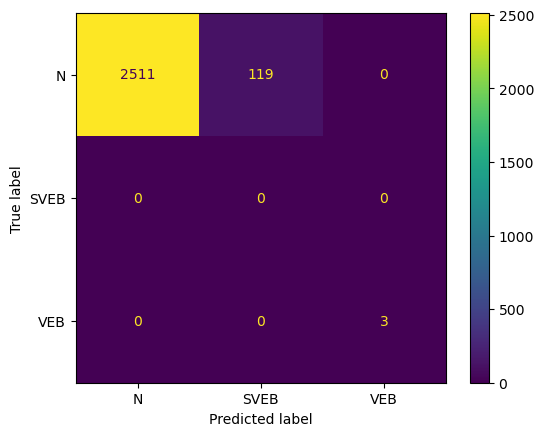

Fold 149:
  Test:  patient=148
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1518
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         2

    accuracy                           0.96      1520
   macro avg       0.33      0.32      0.33      1520
weighted avg       1.00      0.96      0.98      1520

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999312  0.0  0.0  0.955263     0.333104      0.997997
recall        0.956522  NaN  0.0  0.955263     0.318841      0.955263
f1-score      0.977449  NaN  0.0  0.955263     0.325816      0.976163
support    1518.000000  0.0  2.0  0.955263  1520.000000   1520.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

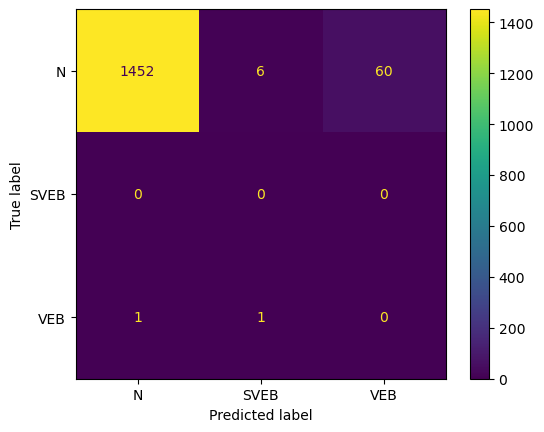

Fold 150:
  Test:  patient=149
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1644
         1.0       0.00      0.00      0.00         0
         2.0       0.07      0.15      0.10        27

    accuracy                           0.95      1671
   macro avg       0.36      0.37      0.36      1671
weighted avg       0.98      0.95      0.97      1671

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.996238  0.0   0.074074  0.953321     0.356771      0.981338
recall        0.966545  NaN   0.148148  0.953321     0.371564      0.953321
f1-score      0.981167  NaN   0.098765  0.953321     0.359977      0.966909
support    1644.000000  0.0  27.000000  0.953321  1671.000000   1671.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

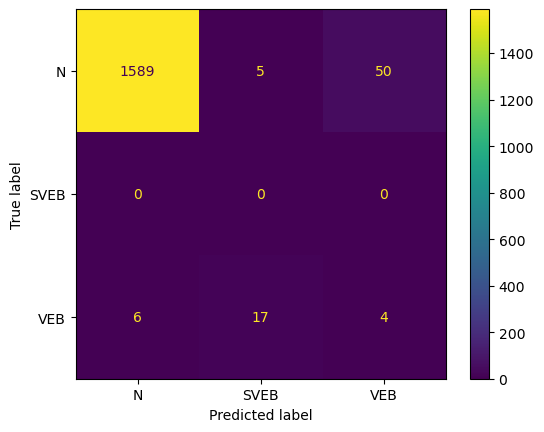

Fold 151:
  Test:  patient=150
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2660
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.95      0.96       366

    accuracy                           0.96      3026
   macro avg       0.65      0.64      0.65      3026
weighted avg       0.99      0.96      0.98      3026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997278  0.0    0.966480  0.961996     0.654586      0.993553
recall        0.964286  NaN    0.945355  0.961996     0.636547      0.961996
f1-score      0.980505  NaN    0.955801  0.961996     0.645435      0.977517
support    2660.000000  0.0  366.000000  0.961996  3026.000000   3026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

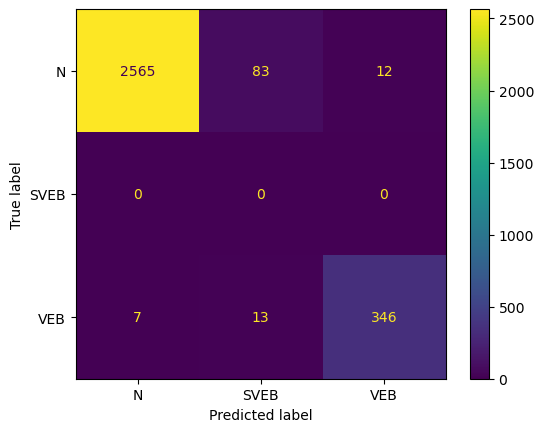

Fold 152:
  Test:  patient=151


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1211
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.27      0.43       849

    accuracy                           0.70      2060
   macro avg       0.66      0.42      0.47      2060
weighted avg       0.99      0.70      0.76      2060

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.978903  0.696117     0.659634      0.991305
recall        0.992568  NaN    0.273263  0.696117     0.421944      0.696117
f1-score      0.996270  NaN    0.427256  0.696117     0.474509      0.761759
support    1211.000000  0.0  849.000000  0.696117  2060.000000   2060.000000


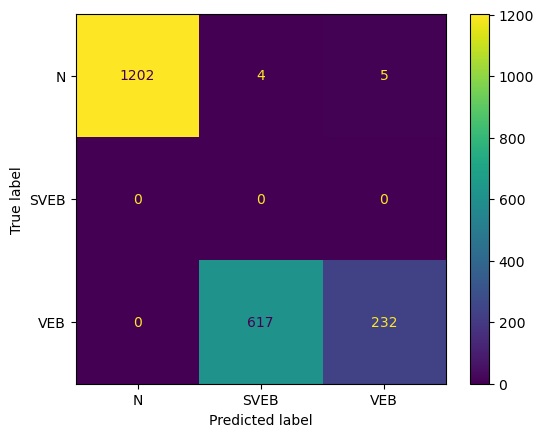

Fold 153:
  Test:  patient=152
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2360
         1.0       0.89      0.80      0.84       179
         2.0       0.99      0.98      0.99       110

    accuracy                           0.98      2649
   macro avg       0.95      0.92      0.94      2649
weighted avg       0.98      0.98      0.98      2649

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.984447    0.888199    0.990826   0.97886     0.954491   
recall        0.992373    0.798883    0.981818   0.97886     0.924358   
f1-score      0.988394    0.841176    0.986301   0.97886     0.938624   
support    2360.000000  179.000000  110.000000   0.97886  2649.000000   

           weighted avg  
precision      0.978208  
recall         0.978860  
f1-score       0.978359  
support     2649.000000  


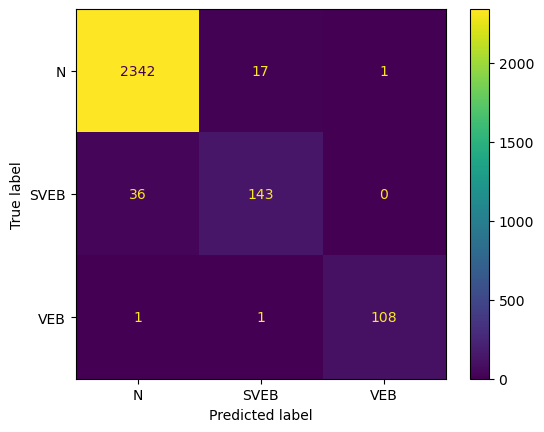

Fold 154:
  Test:  patient=153
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      2070
         1.0       0.33      0.88      0.48       104
         2.0       0.89      1.00      0.94         8

    accuracy                           0.91      2182
   macro avg       0.74      0.93      0.79      2182
weighted avg       0.96      0.91      0.93      2182

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.993651    0.325088  0.888889  0.906508     0.735876   
recall        0.907246    0.884615  1.000000  0.906508     0.930621   
f1-score      0.948485    0.475452  0.941176  0.906508     0.788371   
support    2070.000000  104.000000  8.000000  0.906508  2182.000000   

           weighted avg  
precision      0.961401  
recall         0.906508  
f1-score       0.925912  
support     2182.000000  


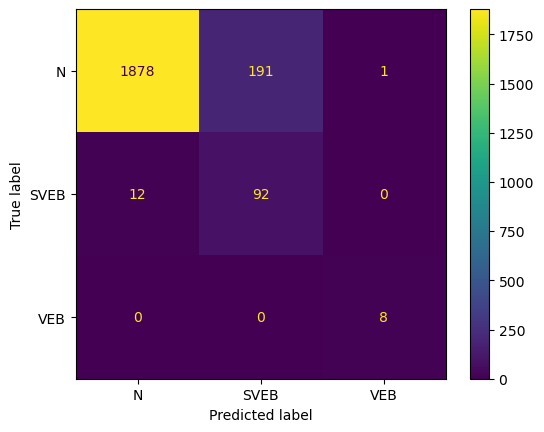

Fold 155:
  Test:  patient=154
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      2814
         1.0       0.30      0.96      0.46       124
         2.0       0.99      0.89      0.94       185

    accuracy                           0.91      3123
   macro avg       0.76      0.92      0.78      3123
weighted avg       0.97      0.91      0.93      3123

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.994546    0.304348    0.993939  0.908101     0.764278   
recall        0.907249    0.959677    0.886486  0.908101     0.917804   
f1-score      0.948894    0.462136    0.937143  0.908101     0.782724   
support    2814.000000  124.000000  185.000000  0.908101  3123.000000   

           weighted avg  
precision      0.967106  
recall         0.908101  
f1-score       0.928871  
support     3123.000000  


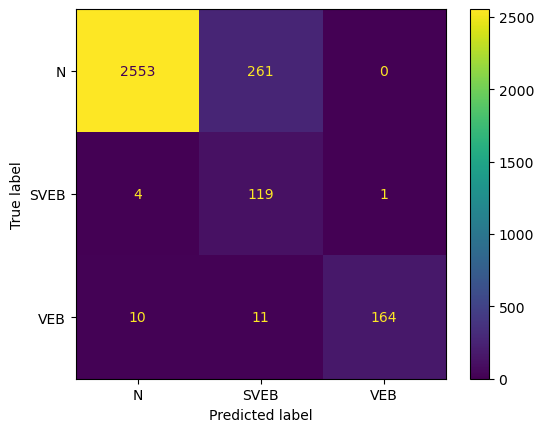

Fold 156:
  Test:  patient=155


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2190
         1.0       0.00      0.00      0.00         0
         2.0       0.85      0.85      0.85        13

    accuracy                           1.00      2203
   macro avg       0.62      0.61      0.62      2203
weighted avg       1.00      1.00      1.00      2203

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.846154   0.99773     0.615385      0.999092
recall        0.998630  NaN   0.846154   0.99773     0.614928      0.997730
f1-score      0.999315  NaN   0.846154   0.99773     0.615156      0.998411
support    2190.000000  0.0  13.000000   0.99773  2203.000000   2203.000000


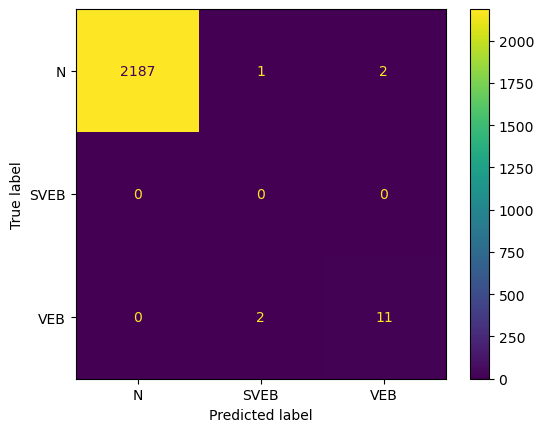

Fold 157:
  Test:  patient=156


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2563
         1.0       0.00      0.00      0.00         0
         2.0       0.33      1.00      0.50         6

    accuracy                           0.99      2569
   macro avg       0.44      0.66      0.50      2569
weighted avg       1.00      0.99      1.00      2569

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.333333   0.99494     0.444444      0.998443
recall        0.994928  NaN  1.000000   0.99494     0.664976      0.994940
f1-score      0.997457  NaN  0.500000   0.99494     0.499152      0.996296
support    2563.000000  0.0  6.000000   0.99494  2569.000000   2569.000000


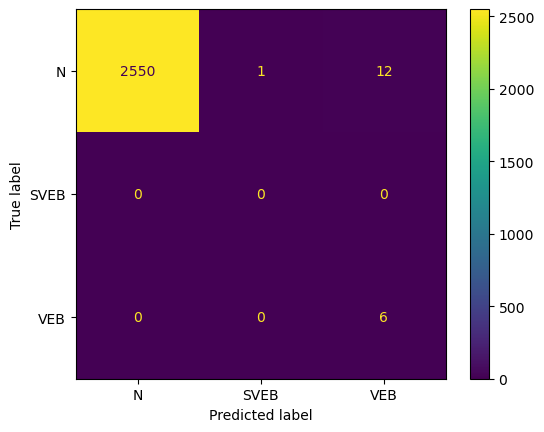

Fold 158:
  Test:  patient=157


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1703
         1.0       0.14      1.00      0.25         2
         2.0       0.00      0.00      0.00         5

    accuracy                           0.99      1710
   macro avg       0.38      0.66      0.42      1710
weighted avg       0.99      0.99      0.99      1710

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998231  0.142857  NaN  0.991228     0.380363      0.994312
recall        0.994128  1.000000  0.0  0.991228     0.664709      0.991228
f1-score      0.996175  0.250000  NaN  0.991228     0.415392      0.992390
support    1703.000000  2.000000  5.0  0.991228  1710.000000   1710.000000


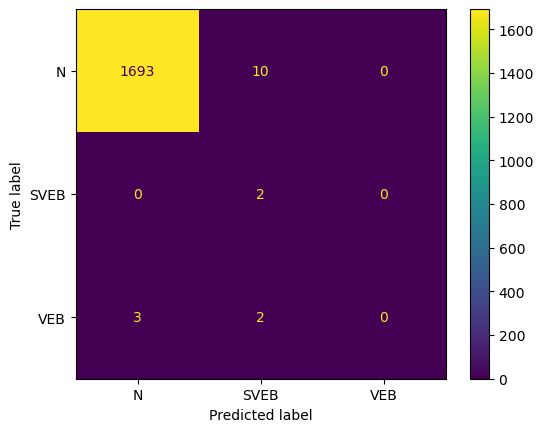

Fold 159:
  Test:  patient=158
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1496
         1.0       0.75      0.43      0.55         7
         2.0       0.67      0.50      0.57         4

    accuracy                           1.00      1507
   macro avg       0.80      0.64      0.71      1507
weighted avg       1.00      1.00      1.00      1507

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     0.997333  0.750000  0.666667  0.996019     0.804667   
recall        1.000000  0.428571  0.500000  0.996019     0.642857   
f1-score      0.998665  0.545455  0.571429  0.996019     0.705183   
support    1496.000000  7.000000  4.000000  0.996019  1507.000000   

           weighted avg  
precision      0.995307  
recall         0.996019  
f1-score       0.995426  
support     1507.000000  


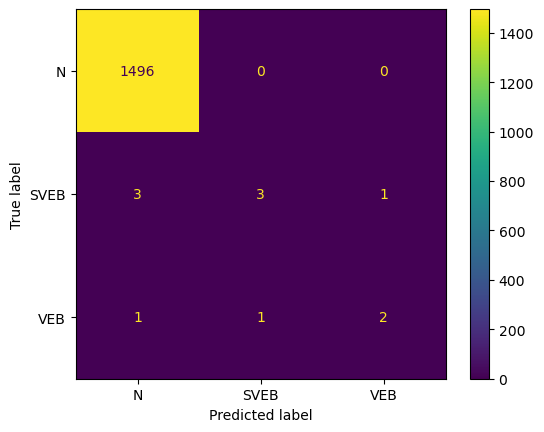

Fold 160:
  Test:  patient=159


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1884
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.98      0.98       719

    accuracy                           0.99      2603
   macro avg       0.66      0.66      0.66      2603
weighted avg       0.99      0.99      0.99      2603

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.993070  0.0    0.991525  0.985401     0.661532      0.992644
recall        0.988854  NaN    0.976356  0.985401     0.655070      0.985401
f1-score      0.990957  NaN    0.983882  0.985401     0.658280      0.989003
support    1884.000000  0.0  719.000000  0.985401  2603.000000   2603.000000


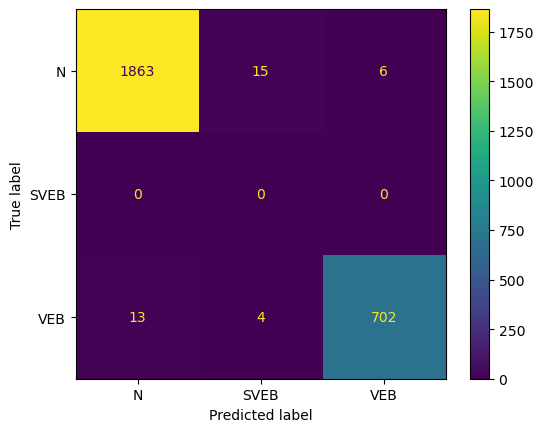

Fold 161:
  Test:  patient=160


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1711
         1.0       0.00      0.00      0.00         0
         2.0       0.30      0.75      0.43         4

    accuracy                           0.95      1715
   macro avg       0.43      0.57      0.47      1715
weighted avg       1.00      0.95      0.98      1715

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.300000  0.954519     0.433333      0.998367
recall        0.954997  NaN  0.750000  0.954519     0.568332      0.954519
f1-score      0.976981  NaN  0.428571  0.954519     0.468517      0.975701
support    1711.000000  0.0  4.000000  0.954519  1715.000000   1715.000000


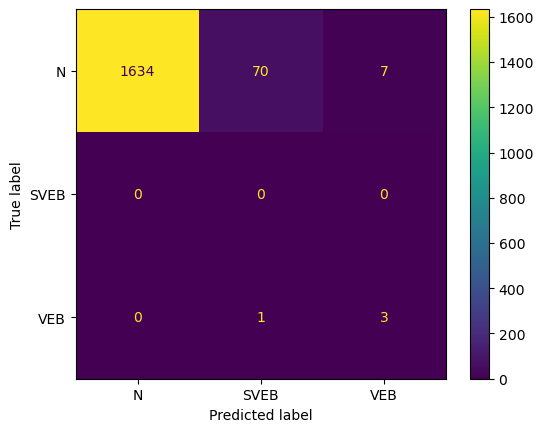

Fold 162:
  Test:  patient=161


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1835
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.99      0.99       783

    accuracy                           0.99      2618
   macro avg       0.66      0.66      0.66      2618
weighted avg       0.99      0.99      0.99      2618

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.993996  0.0    0.989744  0.990451     0.661246      0.992724
recall        0.992371  NaN    0.985951  0.990451     0.659441      0.990451
f1-score      0.993182  NaN    0.987844  0.990451     0.660342      0.991586
support    1835.000000  0.0  783.000000  0.990451  2618.000000   2618.000000


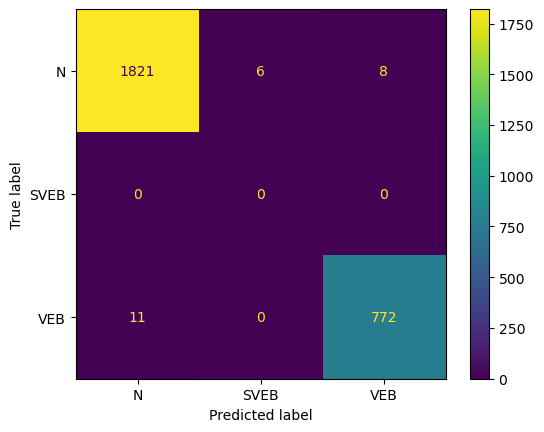

Fold 163:
  Test:  patient=162
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1705
         2.0       1.00      1.00      1.00       755

    accuracy                           1.00      2460
   macro avg       1.00      1.00      1.00      2460
weighted avg       1.00      1.00      1.00      2460

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.998827    0.997351  0.998374     0.998089      0.998374
recall        0.998827    0.997351  0.998374     0.998089      0.998374
f1-score      0.998827    0.997351  0.998374     0.998089      0.998374
support    1705.000000  755.000000  0.998374  2460.000000   2460.000000


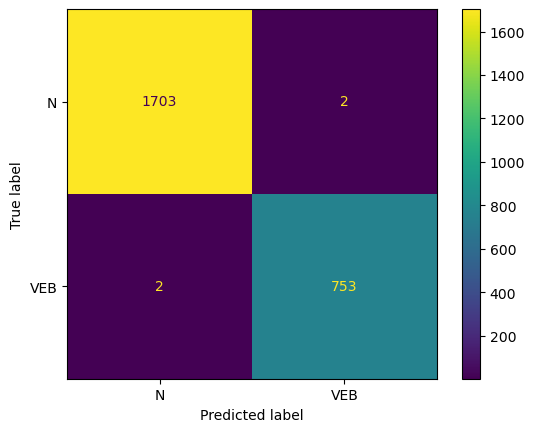

Fold 164:
  Test:  patient=163


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1843
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.98      0.98      1364

    accuracy                           0.98      3207
   macro avg       0.66      0.66      0.66      3207
weighted avg       0.99      0.98      0.99      3207

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.987541  0.0     0.988872  0.984097     0.658804      0.988107
recall        0.989148  NaN     0.977273  0.984097     0.655474      0.984097
f1-score      0.988344  NaN     0.983038  0.984097     0.657127      0.986087
support    1843.000000  0.0  1364.000000  0.984097  3207.000000   3207.000000


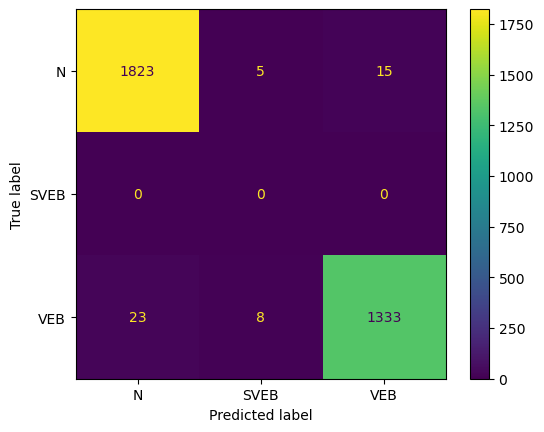

Fold 165:
  Test:  patient=164


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1560
         1.0       0.00      0.00      0.00         0
         2.0       0.93      1.00      0.97        57

    accuracy                           0.97      1617
   macro avg       0.64      0.66      0.65      1617
weighted avg       1.00      0.97      0.98      1617

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.934426  0.969079     0.644809      0.997688
recall        0.967949  NaN   1.000000  0.969079     0.655983      0.969079
f1-score      0.983713  NaN   0.966102  0.969079     0.649938      0.983093
support    1560.000000  0.0  57.000000  0.969079  1617.000000   1617.000000


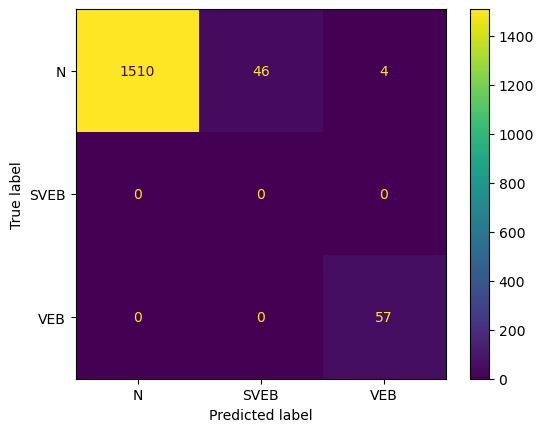

Fold 166:
  Test:  patient=165
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1245
         1.0       0.99      0.92      0.95       589
         2.0       0.00      0.00      0.00         1

    accuracy                           0.97      1835
   macro avg       0.66      0.64      0.65      1835
weighted avg       0.99      0.97      0.98      1835

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.988818    0.985455  0.0  0.970027     0.658091      0.987199
recall        0.994378    0.920204  0.0  0.970027     0.638194      0.970027
f1-score      0.991590    0.951712  0.0  0.970027     0.647767      0.978249
support    1245.000000  589.000000  1.0  0.970027  1835.000000   1835.000000


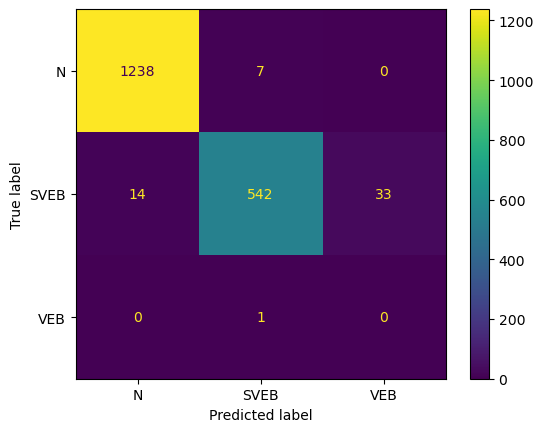

Fold 167:
  Test:  patient=166


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1427
         1.0       0.96      0.97      0.96       536
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1963
   macro avg       0.65      0.65      0.65      1963
weighted avg       0.99      0.98      0.98      1963

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997871    0.961111  0.0  0.980642     0.652994      0.987834
recall        0.985284    0.968284  NaN  0.980642     0.651189      0.980642
f1-score      0.991537    0.964684  NaN  0.980642     0.652074      0.984205
support    1427.000000  536.000000  0.0  0.980642  1963.000000   1963.000000


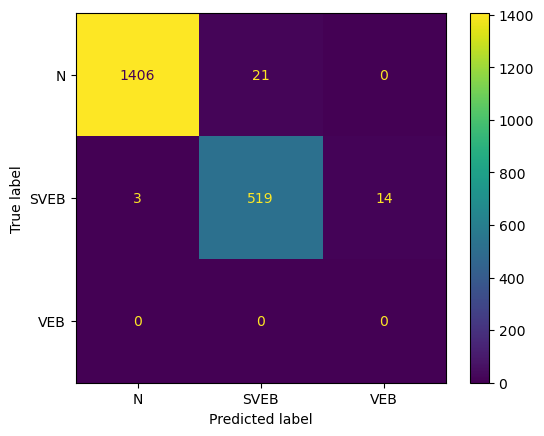

Fold 168:
  Test:  patient=167


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3199
         1.0       0.00      0.00      0.00         0
         2.0       0.98      0.98      0.98       457

    accuracy                           0.99      3656
   macro avg       0.66      0.66      0.66      3656
weighted avg       1.00      0.99      0.99      3656

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997806  0.0    0.976139  0.993982     0.657982      0.995098
recall        0.995311  NaN    0.984683  0.993982     0.659998      0.993982
f1-score      0.996557  NaN    0.980392  0.993982     0.658983      0.994537
support    3199.000000  0.0  457.000000  0.993982  3656.000000   3656.000000


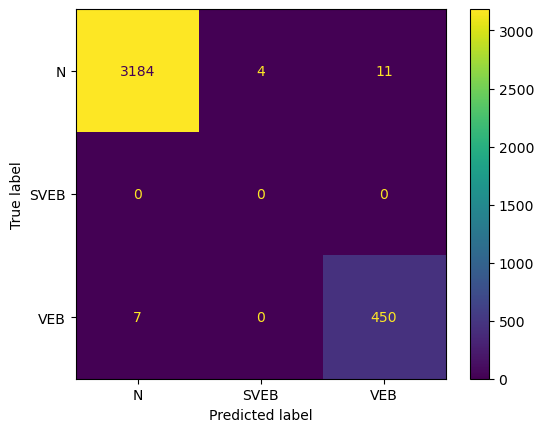

Fold 169:
  Test:  patient=168
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      3447
         1.0       0.00      0.00      0.00         0
         2.0       0.91      0.99      0.95       450

    accuracy                           0.98      3897
   macro avg       0.64      0.66      0.65      3897
weighted avg       0.99      0.98      0.99      3897

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999116  0.0    0.906504   0.98486     0.635207      0.988422
recall        0.984044  NaN    0.991111   0.98486     0.658385      0.984860
f1-score      0.991523  NaN    0.946921   0.98486     0.646148      0.986373
support    3447.000000  0.0  450.000000   0.98486  3897.000000   3897.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

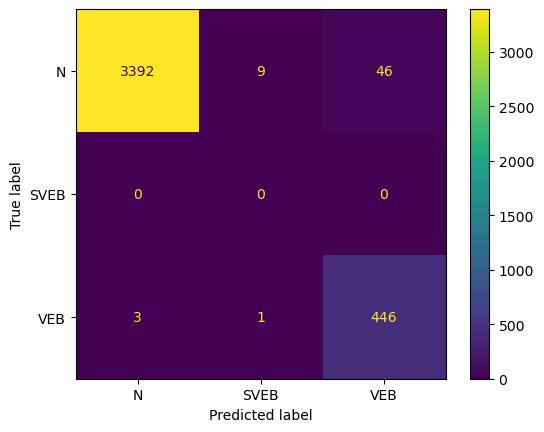

Fold 170:
  Test:  patient=169


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2007
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00       452

    accuracy                           1.00      2459
   macro avg       0.67      0.67      0.67      2459
weighted avg       1.00      1.00      1.00      2459

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.997792   0.99878     0.665931      0.999594
recall        0.998505  NaN    1.000000   0.99878     0.666168      0.998780
f1-score      0.999252  NaN    0.998895   0.99878     0.666049      0.999186
support    2007.000000  0.0  452.000000   0.99878  2459.000000   2459.000000


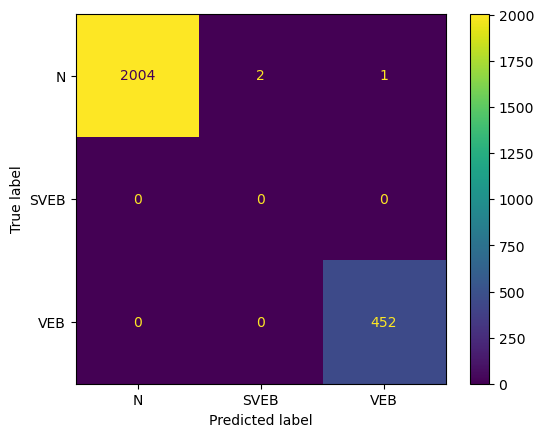

Fold 171:
  Test:  patient=170


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2153
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      1.00       543

    accuracy                           1.00      2696
   macro avg       0.67      0.66      0.67      2696
weighted avg       1.00      1.00      1.00      2696

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    1.000000  0.998516     0.666667      1.000000
recall        0.999536  NaN    0.994475  0.998516     0.664670      0.998516
f1-score      0.999768  NaN    0.997230  0.998516     0.665666      0.999257
support    2153.000000  0.0  543.000000  0.998516  2696.000000   2696.000000


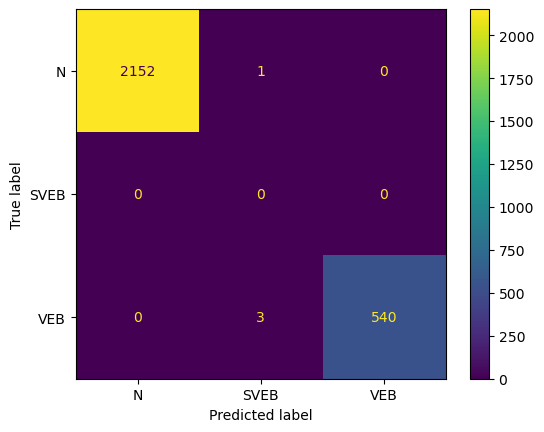

Fold 172:
  Test:  patient=171


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1460
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      1.00       313

    accuracy                           1.00      1773
   macro avg       0.67      0.66      0.66      1773
weighted avg       1.00      1.00      1.00      1773

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.996795  0.998308     0.665598      0.999434
recall        0.999315  NaN    0.993610  0.998308     0.664308      0.998308
f1-score      0.999657  NaN    0.995200  0.998308     0.664952      0.998871
support    1460.000000  0.0  313.000000  0.998308  1773.000000   1773.000000


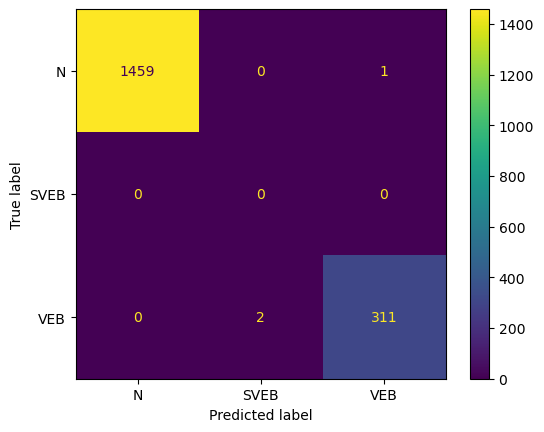

Fold 173:
  Test:  patient=172
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2566
         1.0       0.33      0.17      0.22         6
         2.0       0.52      1.00      0.68        92

    accuracy                           0.97      2664
   macro avg       0.62      0.71      0.63      2664
weighted avg       0.98      0.97      0.97      2664

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.998390  0.333333   0.519774  0.965841     0.617166   
recall        0.966485  0.166667   1.000000  0.965841     0.711050   
f1-score      0.982178  0.222222   0.684015  0.965841     0.629472   
support    2566.000000  6.000000  92.000000  0.965841  2664.000000   

           weighted avg  
precision      0.980363  
recall         0.965841  
f1-score       0.970170  
support     2664.000000  


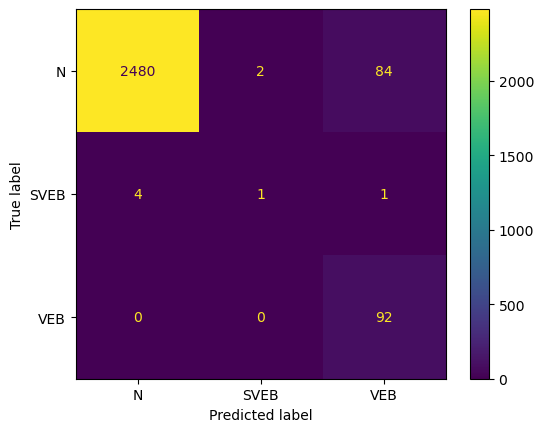

Fold 174:
  Test:  patient=173
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      1622
         1.0       0.01      0.40      0.03         5
         2.0       0.02      1.00      0.03         1

    accuracy                           0.87      1628
   macro avg       0.34      0.76      0.33      1628
weighted avg       1.00      0.87      0.93      1628

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.013245  0.015873  0.870393     0.343039   
recall        0.871763  0.400000  1.000000  0.870393     0.757254   
f1-score      0.931489  0.025641  0.031250  0.870393     0.329460   
support    1622.000000  5.000000  1.000000  0.870393  1628.000000   

           weighted avg  
precision      0.996365  
recall         0.870393  
f1-score       0.928154  
support     1628.000000  


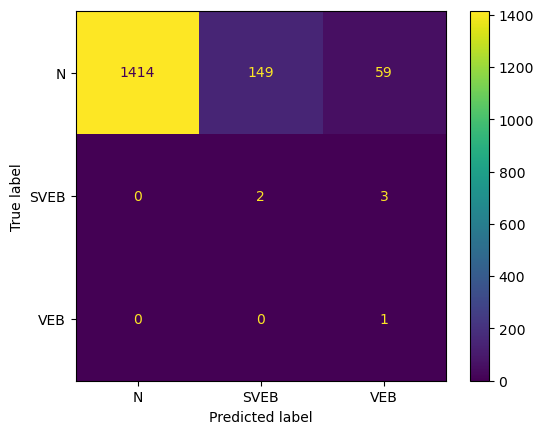

Fold 175:
  Test:  patient=174


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1544
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00      1554

    accuracy                           1.00      3098
   macro avg       0.67      0.66      0.66      3098
weighted avg       1.00      1.00      1.00      3098

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.998052  0.0     0.998069  0.996772     0.665374      0.998061
recall        0.995466  NaN     0.998069  0.996772     0.664512      0.996772
f1-score      0.996757  NaN     0.998069  0.996772     0.664942      0.997416
support    1544.000000  0.0  1554.000000  0.996772  3098.000000   3098.000000


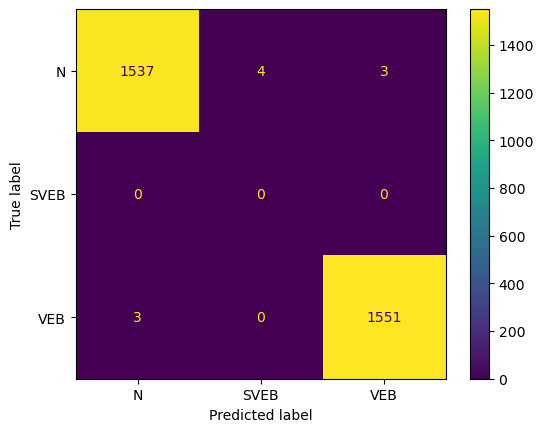

Fold 176:
  Test:  patient=175
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1085
         2.0       1.00      1.00      1.00      1120

    accuracy                           1.00      2205
   macro avg       1.00      1.00      1.00      2205
weighted avg       1.00      1.00      1.00      2205

                   0.0          2.0  accuracy    macro avg  weighted avg
precision     0.998153     0.996435  0.997279     0.997294      0.997280
recall        0.996313     0.998214  0.997279     0.997264      0.997279
f1-score      0.997232     0.997324  0.997279     0.997278      0.997279
support    1085.000000  1120.000000  0.997279  2205.000000   2205.000000


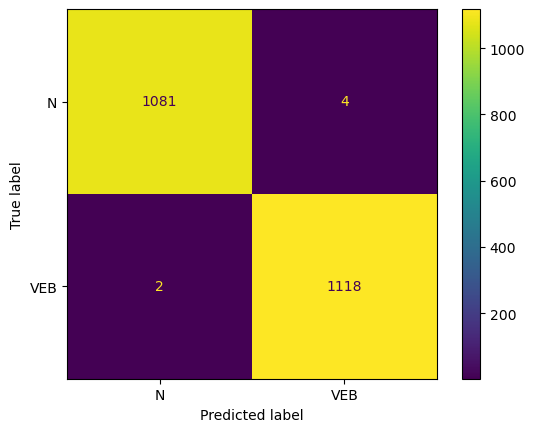

Fold 177:
  Test:  patient=176
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1802
         1.0       1.00      0.38      0.55         8
         2.0       1.00      1.00      1.00       683

    accuracy                           1.00      2493
   macro avg       1.00      0.79      0.85      2493
weighted avg       1.00      1.00      1.00      2493

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.997231  1.000000    0.998538  0.997593     0.998590   
recall        0.999445  0.375000    1.000000  0.997593     0.791482   
f1-score      0.998337  0.545455    0.999268  0.997593     0.847687   
support    1802.000000  8.000000  683.000000  0.997593  2493.000000   

           weighted avg  
precision      0.997598  
recall         0.997593  
f1-score       0.997139  
support     2493.000000  


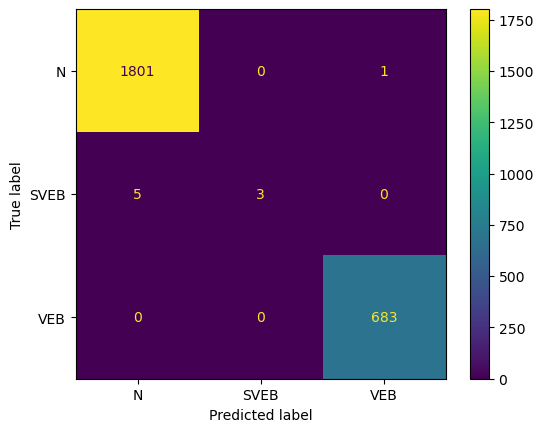

Fold 178:
  Test:  patient=177


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1435
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00       491

    accuracy                           1.00      1926
   macro avg       0.67      0.67      0.67      1926
weighted avg       1.00      1.00      1.00      1926

                   0.0  1.0    2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    1.0  0.999481     0.666667      1.000000
recall        0.999303  NaN    1.0  0.999481     0.666434      0.999481
f1-score      0.999651  NaN    1.0  0.999481     0.666550      0.999740
support    1435.000000  0.0  491.0  0.999481  1926.000000   1926.000000


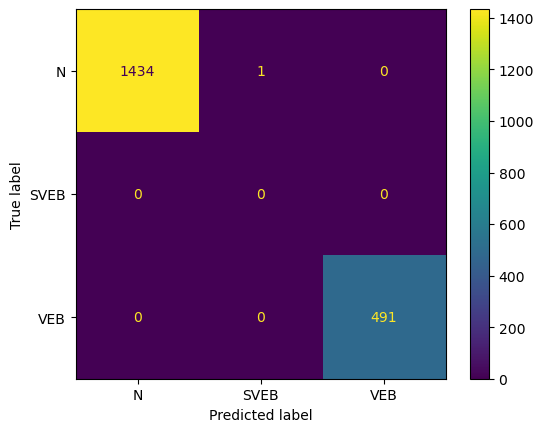

Fold 179:
  Test:  patient=178
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2230
         1.0       0.06      1.00      0.12         1
         2.0       0.99      1.00      0.99       422

    accuracy                           0.99      2653
   macro avg       0.68      1.00      0.70      2653
weighted avg       1.00      0.99      0.99      2653

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     1.000000  0.062500    0.988290  0.992461     0.683597   
recall        0.991031  1.000000    1.000000  0.992461     0.997010   
f1-score      0.995495  0.117647    0.994111  0.992461     0.702418   
support    2230.000000  1.000000  422.000000  0.992461  2653.000000   

           weighted avg  
precision      0.997784  
recall         0.992461  
f1-score       0.994944  
support     2653.000000  


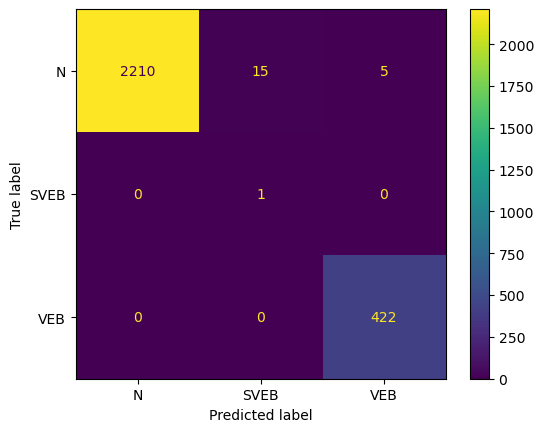

Fold 180:
  Test:  patient=179
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1857
         1.0       0.00      0.00      0.00         1
         2.0       0.76      1.00      0.86        93

    accuracy                           0.98      1951
   macro avg       0.59      0.66      0.62      1951
weighted avg       0.99      0.98      0.98      1951

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999451  0.0   0.756098  0.981548     0.585183      0.987339
recall        0.981152  0.0   1.000000  0.981548     0.660384      0.981548
f1-score      0.990217  0.0   0.861111  0.981548     0.617110      0.983556
support    1857.000000  1.0  93.000000  0.981548  1951.000000   1951.000000


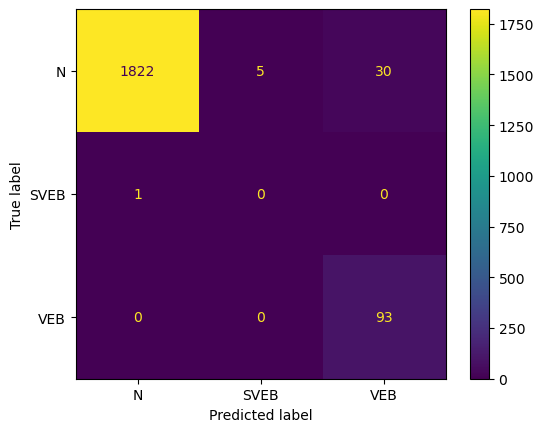

Fold 181:
  Test:  patient=180


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2117
         1.0       0.00      0.00      0.00         2
         2.0       1.00      1.00      1.00       235

    accuracy                           1.00      2354
   macro avg       0.66      0.67      0.67      2354
weighted avg       1.00      1.00      1.00      2354

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999056  NaN    0.995763  0.998726     0.664939      0.997878
recall        0.999528  0.0    1.000000  0.998726     0.666509      0.998726
f1-score      0.999292  NaN    0.997877  0.998726     0.665723      0.998301
support    2117.000000  2.0  235.000000  0.998726  2354.000000   2354.000000


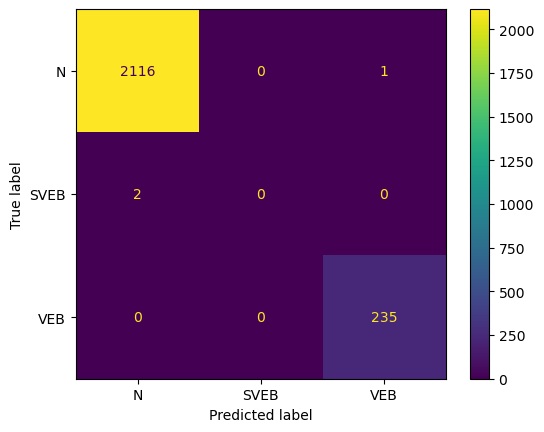

Fold 182:
  Test:  patient=181


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2119
         1.0       0.00      0.00      0.00         0
         2.0       0.75      1.00      0.86        27

    accuracy                           0.97      2146
   macro avg       0.58      0.66      0.61      2146
weighted avg       1.00      0.97      0.98      2146

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.750000  0.973905     0.583333      0.996855
recall        0.973572  NaN   1.000000  0.973905     0.657857      0.973905
f1-score      0.986609  NaN   0.857143  0.973905     0.614584      0.984980
support    2119.000000  0.0  27.000000  0.973905  2146.000000   2146.000000


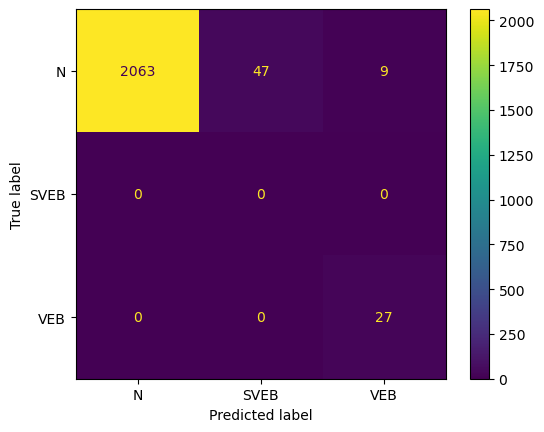

Fold 183:
  Test:  patient=182
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2993
         1.0       0.00      0.00      0.00         0
         2.0       0.60      0.75      0.67         4

    accuracy                           0.99      2997
   macro avg       0.53      0.58      0.55      2997
weighted avg       1.00      0.99      1.00      2997

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999663  0.0  0.600000  0.991992     0.533221      0.999130
recall        0.992315  NaN  0.750000  0.991992     0.580772      0.991992
f1-score      0.995976  NaN  0.666667  0.991992     0.554214      0.995536
support    2993.000000  0.0  4.000000  0.991992  2997.000000   2997.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

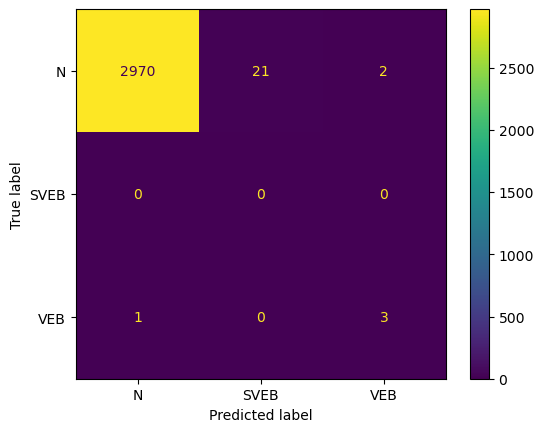

Fold 184:
  Test:  patient=183
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1969
         1.0       0.00      0.00      0.00         3
         2.0       0.97      1.00      0.99       802

    accuracy                           0.99      2774
   macro avg       0.66      0.66      0.66      2774
weighted avg       0.99      0.99      0.99      2774

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998458  0.0    0.973301  0.989185     0.657253      0.990105
recall        0.986287  0.0    1.000000  0.989185     0.662096      0.989185
f1-score      0.992335  0.0    0.986470  0.989185     0.659602      0.989566
support    1969.000000  3.0  802.000000  0.989185  2774.000000   2774.000000


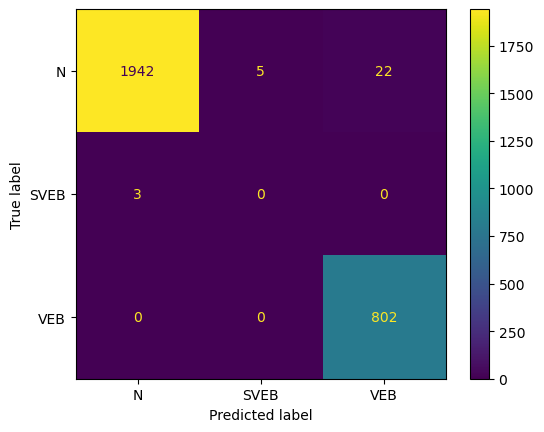

Fold 185:
  Test:  patient=184


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1608
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00       137

    accuracy                           0.95      1745
   macro avg       0.67      0.65      0.66      1745
weighted avg       1.00      0.95      0.97      1745

                   0.0  1.0    2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    1.0  0.950716     0.666667      1.000000
recall        0.946517  NaN    1.0  0.950716     0.648839      0.950716
f1-score      0.972524  NaN    1.0  0.950716     0.657508      0.974681
support    1608.000000  0.0  137.0  0.950716  1745.000000   1745.000000


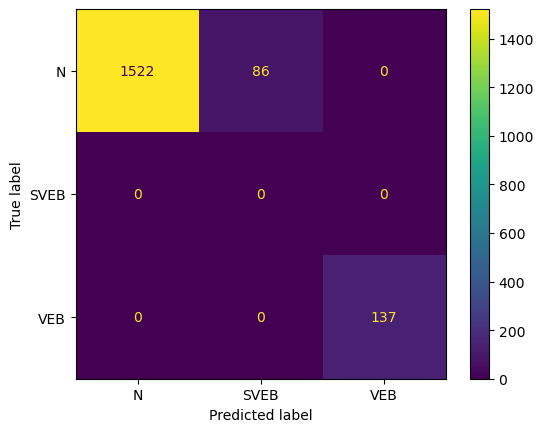

Fold 186:
  Test:  patient=185


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1150
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00      1110

    accuracy                           1.00      2260
   macro avg       0.67      0.67      0.67      2260
weighted avg       1.00      1.00      1.00      2260

                   0.0  1.0     2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0     1.0  0.999115     0.666667      1.000000
recall        0.998261  NaN     1.0  0.999115     0.666087      0.999115
f1-score      0.999130  NaN     1.0  0.999115     0.666377      0.999557
support    1150.000000  0.0  1110.0  0.999115  2260.000000   2260.000000


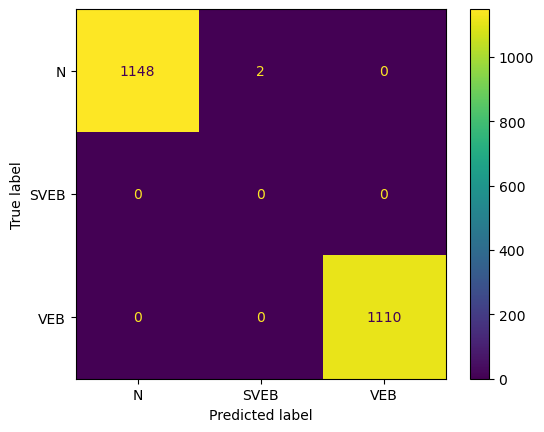

Fold 187:
  Test:  patient=186
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2338
         1.0       0.33      1.00      0.50         1
         2.0       0.37      0.91      0.53        22

    accuracy                           0.98      2361
   macro avg       0.57      0.96      0.67      2361
weighted avg       0.99      0.98      0.99      2361

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     1.000000  0.333333   0.370370  0.984752     0.567901   
recall        0.985458  1.000000   0.909091  0.984752     0.964850   
f1-score      0.992676  0.500000   0.526316  0.984752     0.672997   
support    2338.000000  1.000000  22.000000  0.984752  2361.000000   

           weighted avg  
precision      0.993851  
recall         0.984752  
f1-score       0.988121  
support     2361.000000  


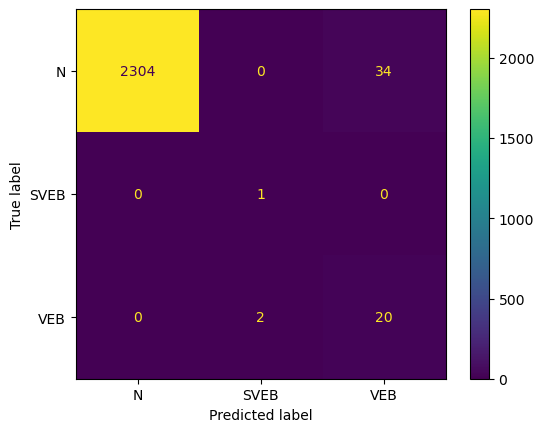

Fold 188:
  Test:  patient=187
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2146
         1.0       0.00      0.00      0.00         1
         2.0       0.89      0.94      0.91        17

    accuracy                           1.00      2164
   macro avg       0.63      0.65      0.64      2164
weighted avg       1.00      1.00      1.00      2164

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.888889  0.998152     0.629630      0.998665
recall        0.999068  0.0   0.941176  0.998152     0.646748      0.998152
f1-score      0.999534  0.0   0.914286  0.998152     0.637940      0.998402
support    2146.000000  1.0  17.000000  0.998152  2164.000000   2164.000000


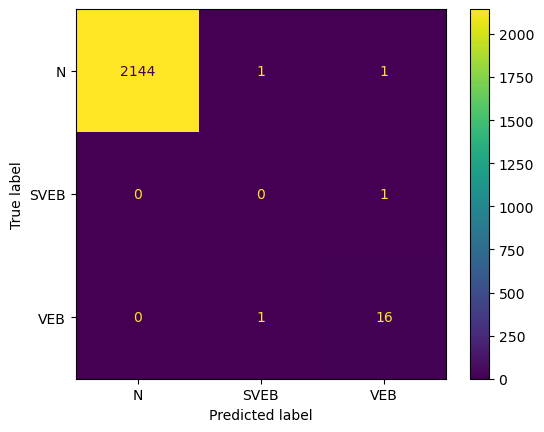

Fold 189:
  Test:  patient=188
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1670
         1.0       0.83      0.73      0.78        26
         2.0       0.47      1.00      0.64         7

    accuracy                           0.99      1703
   macro avg       0.76      0.91      0.80      1703
weighted avg       0.99      0.99      0.99      1703

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.999399   0.826087  0.466667  0.992366     0.764051   
recall        0.996407   0.730769  1.000000  0.992366     0.909059   
f1-score      0.997901   0.775510  0.636364  0.992366     0.803258   
support    1670.000000  26.000000  7.000000  0.992366  1703.000000   

           weighted avg  
precision      0.994564  
recall         0.992366  
f1-score       0.993020  
support     1703.000000  


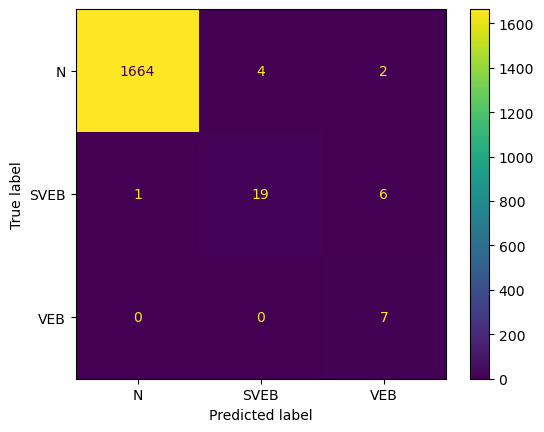

Fold 190:
  Test:  patient=189
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2840
         1.0       0.06      0.33      0.10         3
         2.0       0.88      1.00      0.93        21

    accuracy                           0.99      2864
   macro avg       0.64      0.78      0.68      2864
weighted avg       1.00      0.99      1.00      2864

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.999646  0.055556   0.875000  0.992668     0.643400   
recall        0.993310  0.333333   1.000000  0.992668     0.775548   
f1-score      0.996468  0.095238   0.933333  0.992668     0.675013   
support    2840.000000  3.000000  21.000000  0.992668  2864.000000   

           weighted avg  
precision      0.997743  
recall         0.992668  
f1-score       0.995061  
support     2864.000000  


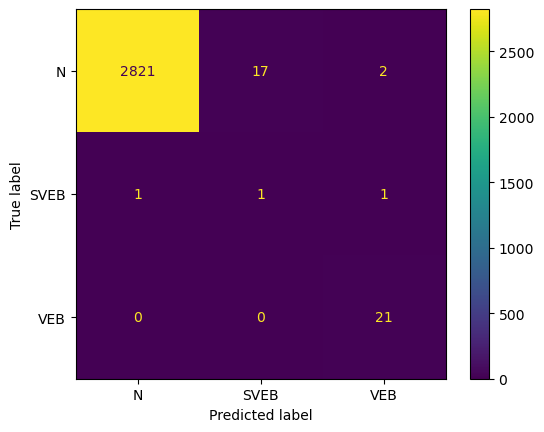

Fold 191:
  Test:  patient=190


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2311
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00        12

    accuracy                           1.00      2323
   macro avg       0.67      0.67      0.67      2323
weighted avg       1.00      1.00      1.00      2323

                   0.0  1.0   2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   1.0  0.997848     0.666667      1.000000
recall        0.997836  NaN   1.0  0.997848     0.665945      0.997848
f1-score      0.998917  NaN   1.0  0.997848     0.666306      0.998923
support    2311.000000  0.0  12.0  0.997848  2323.000000   2323.000000


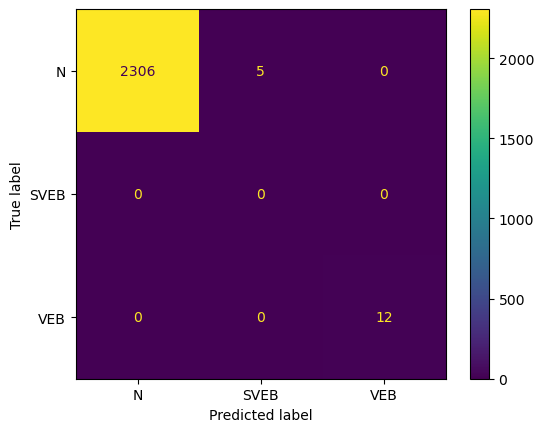

Fold 192:
  Test:  patient=191


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2065
         1.0       0.00      0.00      0.00         0
         2.0       0.82      1.00      0.90        81

    accuracy                           0.99      2146
   macro avg       0.61      0.66      0.63      2146
weighted avg       0.99      0.99      0.99      2146

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.818182  0.991146     0.606061      0.993137
recall        0.990799  NaN   1.000000  0.991146     0.663600      0.991146
f1-score      0.995378  NaN   0.900000  0.991146     0.631793      0.991778
support    2065.000000  0.0  81.000000  0.991146  2146.000000   2146.000000


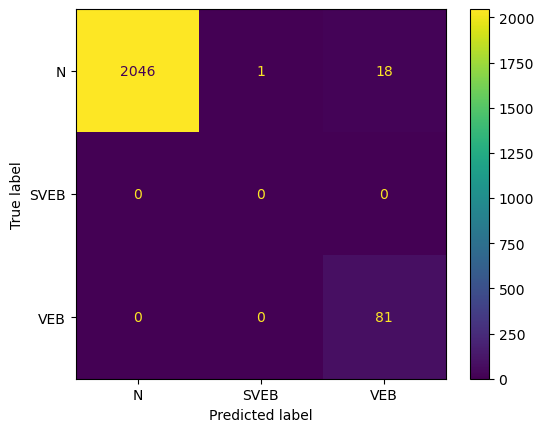

Fold 193:
  Test:  patient=192


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2473
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2473
   macro avg       0.33      0.33      0.33      2473
weighted avg       1.00      1.00      1.00      2473

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.998787     0.333333      1.000000
recall        0.998787  NaN  NaN  0.998787     0.332929      0.998787
f1-score      0.999393  NaN  NaN  0.998787     0.333131      0.999393
support    2473.000000  0.0  0.0  0.998787  2473.000000   2473.000000


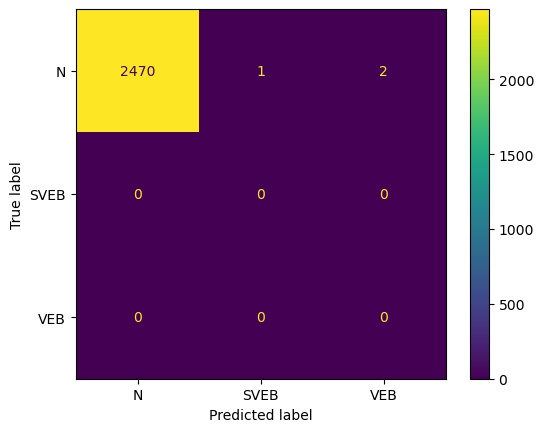

Fold 194:
  Test:  patient=193
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      1451
         1.0       0.03      1.00      0.05         1

    accuracy                           0.97      1452
   macro avg       0.51      0.99      0.52      1452
weighted avg       1.00      0.97      0.99      1452

                   0.0      1.0  accuracy    macro avg  weighted avg
precision     1.000000  0.02500   0.97314     0.512500      0.999329
recall        0.973122  1.00000   0.97314     0.986561      0.973140
f1-score      0.986378  0.04878   0.97314     0.517579      0.985732
support    1451.000000  1.00000   0.97314  1452.000000   1452.000000


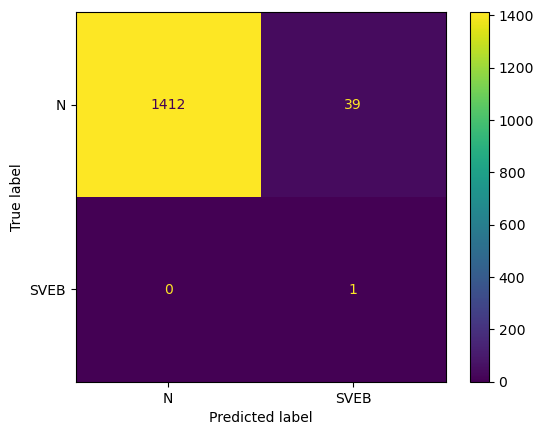

Fold 195:
  Test:  patient=194
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      1451
         1.0       0.04      0.44      0.07         9
         2.0       1.00      0.78      0.87       795

    accuracy                           0.91      2255
   macro avg       0.66      0.74      0.64      2255
weighted avg       0.95      0.91      0.93      2255

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.936601  0.038462    0.995169  0.911308     0.656744   
recall        0.987595  0.444444    0.777358  0.911308     0.736466   
f1-score      0.961422  0.070796    0.872881  0.911308     0.635033   
support    1451.000000  9.000000  795.000000  0.911308  2255.000000   

           weighted avg  
precision      0.953665  
recall         0.911308  
f1-score       0.926653  
support     2255.000000  


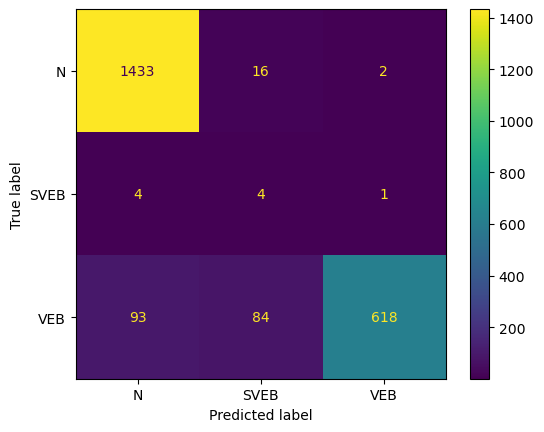

Fold 196:
  Test:  patient=195
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1845
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.89      0.94       138

    accuracy                           0.99      1984
   macro avg       0.67      0.63      0.65      1984
weighted avg       0.99      0.99      0.99      1984

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.995146  0.0    1.000000  0.991935     0.665049      0.994982
recall        1.000000  0.0    0.891304  0.991935     0.630435      0.991935
f1-score      0.997567  0.0    0.942529  0.991935     0.646699      0.993236
support    1845.000000  1.0  138.000000  0.991935  1984.000000   1984.000000


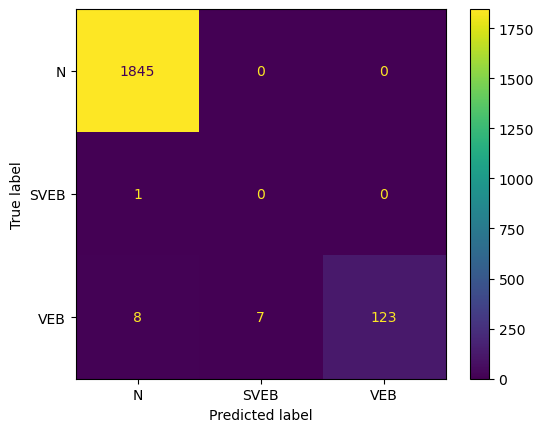

Fold 197:
  Test:  patient=196


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1885
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.91      0.95        23

    accuracy                           1.00      1908
   macro avg       0.67      0.64      0.65      1908
weighted avg       1.00      1.00      1.00      1908

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999470  0.0   1.000000  0.998952     0.666490      0.999476
recall        1.000000  NaN   0.913043  0.998952     0.637681      0.998952
f1-score      0.999735  NaN   0.954545  0.998952     0.651427      0.999190
support    1885.000000  0.0  23.000000  0.998952  1908.000000   1908.000000


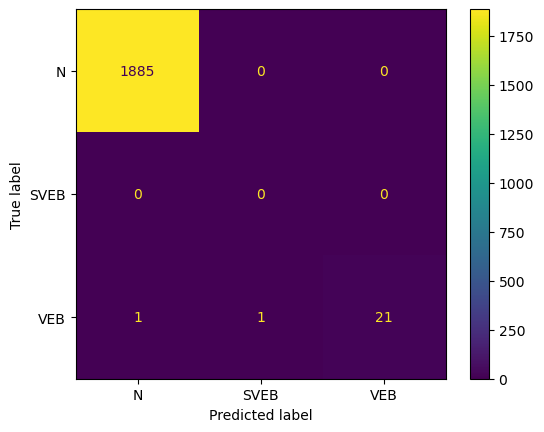

Fold 198:
  Test:  patient=197
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2271
         1.0       0.04      0.20      0.06         5
         2.0       0.99      0.99      0.99       382

    accuracy                           0.99      2658
   macro avg       0.68      0.73      0.68      2658
weighted avg       1.00      0.99      0.99      2658

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.997333  0.035714    0.994737  0.986832     0.675928   
recall        0.988111  0.200000    0.989529  0.986832     0.725880   
f1-score      0.992701  0.060606    0.992126  0.986832     0.681811   
support    2271.000000  5.000000  382.000000  0.986832  2658.000000   

           weighted avg  
precision      0.995151  
recall         0.986832  
f1-score       0.990865  
support     2658.000000  


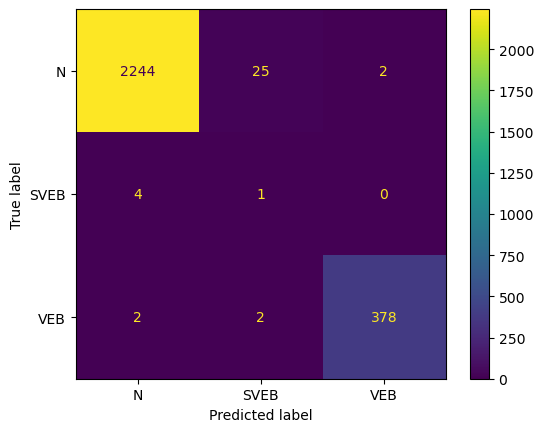

Fold 199:
  Test:  patient=198
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2137
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.99      1.00       200

    accuracy                           0.99      2338
   macro avg       0.67      0.66      0.66      2338
weighted avg       1.00      0.99      0.99      2338

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999055  0.0    1.000000  0.989307     0.666352      0.998708
recall        0.989237  0.0    0.995000  0.989307     0.661412      0.989307
f1-score      0.994122  0.0    0.997494  0.989307     0.663872      0.993985
support    2137.000000  1.0  200.000000  0.989307  2338.000000   2338.000000


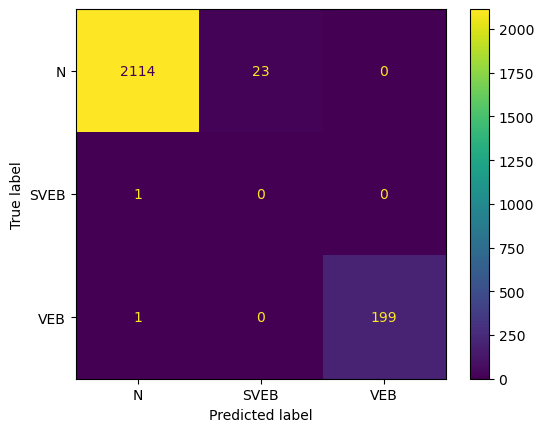

Fold 200:
  Test:  patient=199
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2436
         1.0       0.00      0.00      0.00         5
         2.0       1.00      0.99      1.00       531

    accuracy                           0.99      2972
   macro avg       0.67      0.66      0.66      2972
weighted avg       1.00      0.99      0.99      2972

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997531  0.0    1.000000  0.993271     0.665844      0.996294
recall        0.995074  0.0    0.994350  0.993271     0.663141      0.993271
f1-score      0.996301  0.0    0.997167  0.993271     0.664489      0.994779
support    2436.000000  5.0  531.000000  0.993271  2972.000000   2972.000000


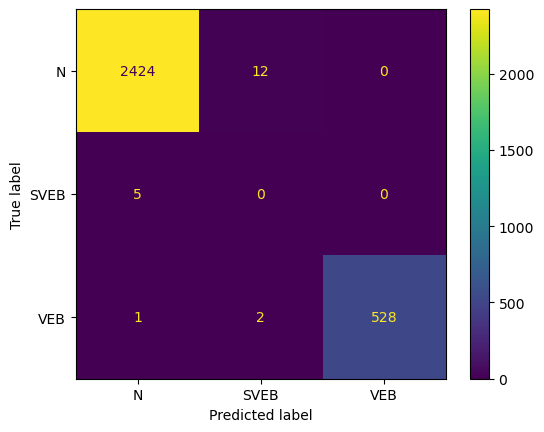

Fold 201:
  Test:  patient=200
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2480
         1.0       0.00      0.00      0.00         2
         2.0       0.98      1.00      0.99       161

    accuracy                           1.00      2643
   macro avg       0.66      0.67      0.66      2643
weighted avg       1.00      1.00      1.00      2643

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999193  0.0    0.981707   0.99773     0.660300      0.997372
recall        0.998387  0.0    1.000000   0.99773     0.666129      0.997730
f1-score      0.998790  0.0    0.990769   0.99773     0.663186      0.997545
support    2480.000000  2.0  161.000000   0.99773  2643.000000   2643.000000


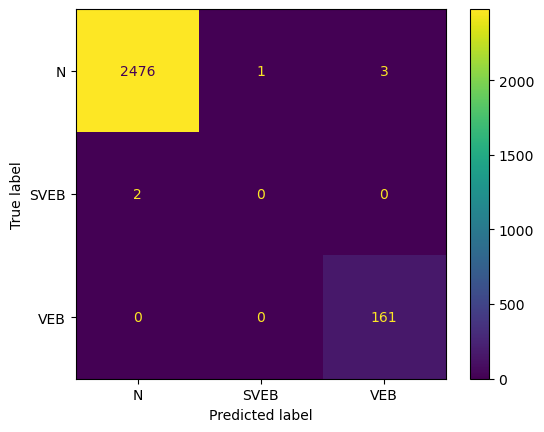

Fold 202:
  Test:  patient=201


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1998
         1.0       0.00      0.00      0.00         1
         2.0       0.97      1.00      0.99       167

    accuracy                           1.00      2166
   macro avg       0.66      0.67      0.66      2166
weighted avg       1.00      1.00      1.00      2166

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  NaN    0.970930  0.997692     0.656977      0.997297
recall        0.997998  0.0    1.000000  0.997692     0.665999      0.997692
f1-score      0.998998  NaN    0.985251  0.997692     0.661416      0.997477
support    1998.000000  1.0  167.000000  0.997692  2166.000000   2166.000000


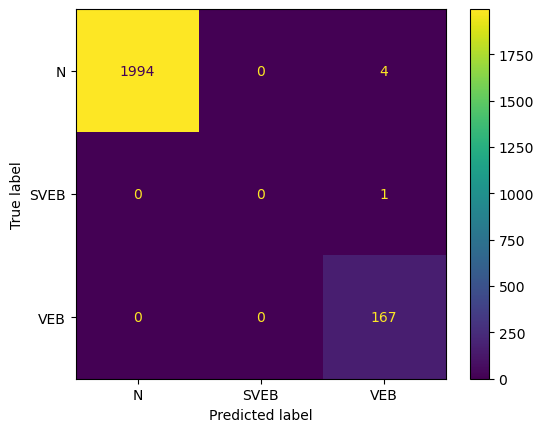

Fold 203:
  Test:  patient=202


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86      1539
         1.0       0.90      0.94      0.92       126
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77      1665
   macro avg       0.63      0.56      0.59      1665
weighted avg       0.99      0.77      0.86      1665

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000    0.900763  0.0  0.766366     0.633588      0.992490
recall        0.752437    0.936508  NaN  0.766366     0.562982      0.766366
f1-score      0.858732    0.918288  NaN  0.766366     0.592340      0.863239
support    1539.000000  126.000000  0.0  0.766366  1665.000000   1665.000000


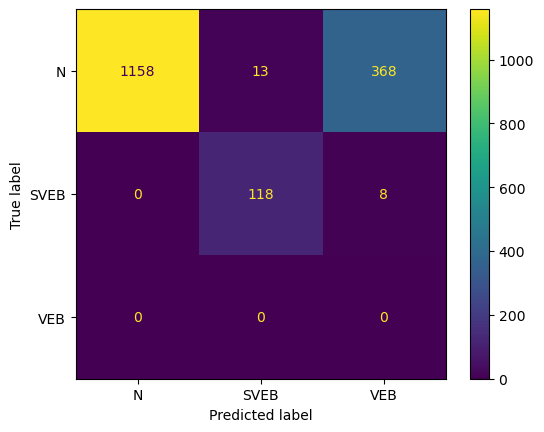

Fold 204:
  Test:  patient=203
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1634
         1.0       0.39      0.89      0.54        35
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      1669
   macro avg       0.46      0.60      0.50      1669
weighted avg       0.99      0.92      0.95      1669

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998000   0.387500  0.0  0.915518     0.461833      0.985197
recall        0.916157   0.885714  NaN  0.915518     0.600624      0.915518
f1-score      0.955329   0.539130  NaN  0.915518     0.498153      0.946601
support    1634.000000  35.000000  0.0  0.915518  1669.000000   1669.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

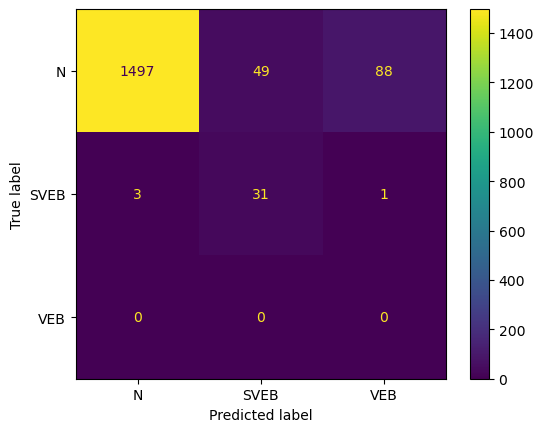

Fold 205:
  Test:  patient=204
              precision    recall  f1-score   support

         0.0       1.00      0.49      0.65      1874
         1.0       0.11      0.62      0.19         8
         2.0       0.29      0.99      0.45       386

    accuracy                           0.57      2268
   macro avg       0.47      0.70      0.43      2268
weighted avg       0.87      0.57      0.62      2268

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.995633  0.111111    0.293803  0.573633     0.466849   
recall        0.486660  0.625000    0.994819  0.573633     0.702159   
f1-score      0.653763  0.188679    0.453633  0.573633     0.432025   
support    1874.000000  8.000000  386.000000  0.573633  2268.000000   

           weighted avg  
precision      0.873066  
recall         0.573633  
f1-score       0.618062  
support     2268.000000  


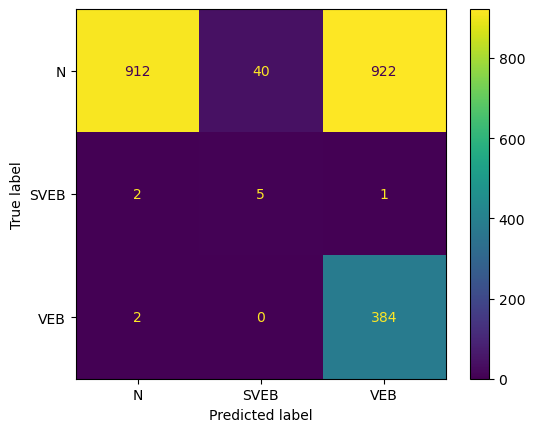

Fold 206:
  Test:  patient=205
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1888
         1.0       0.88      0.91      0.89        32
         2.0       0.96      0.96      0.96        70

    accuracy                           0.99      1990
   macro avg       0.94      0.95      0.95      1990
weighted avg       1.00      0.99      1.00      1990

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.998410   0.878788   0.957143  0.994975     0.944780   
recall        0.997881   0.906250   0.957143  0.994975     0.953758   
f1-score      0.998146   0.892308   0.957143  0.994975     0.949199   
support    1888.000000  32.000000  70.000000  0.994975  1990.000000   

           weighted avg  
precision      0.995035  
recall         0.994975  
f1-score       0.995001  
support     1990.000000  


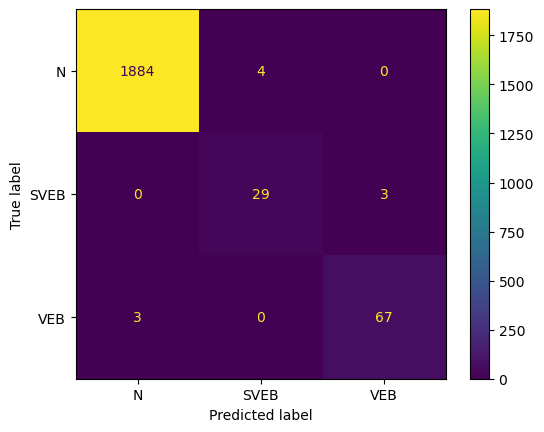

Fold 207:
  Test:  patient=206
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2081
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      0.99       274

    accuracy                           1.00      2355
   macro avg       0.67      0.66      0.66      2355
weighted avg       1.00      1.00      1.00      2355

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999519  0.0    0.996337  0.998726     0.665285      0.999149
recall        0.999519  NaN    0.992701  0.998726     0.664073      0.998726
f1-score      0.999519  NaN    0.994516  0.998726     0.664678      0.998937
support    2081.000000  0.0  274.000000  0.998726  2355.000000   2355.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

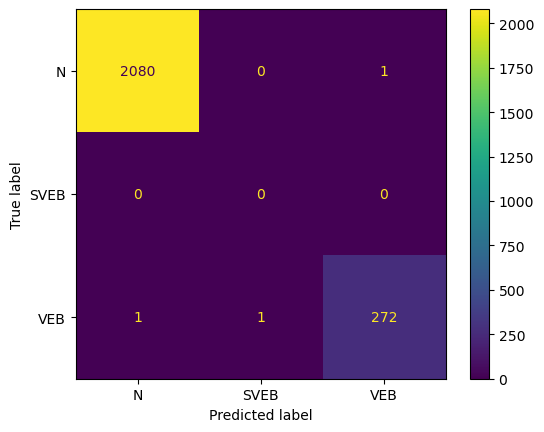

Fold 208:
  Test:  patient=207
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1482
         2.0       1.00      1.00      1.00       612

    accuracy                           1.00      2094
   macro avg       1.00      1.00      1.00      2094
weighted avg       1.00      1.00      1.00      2094

              0.0    2.0  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1482.0  612.0       1.0     2094.0        2094.0


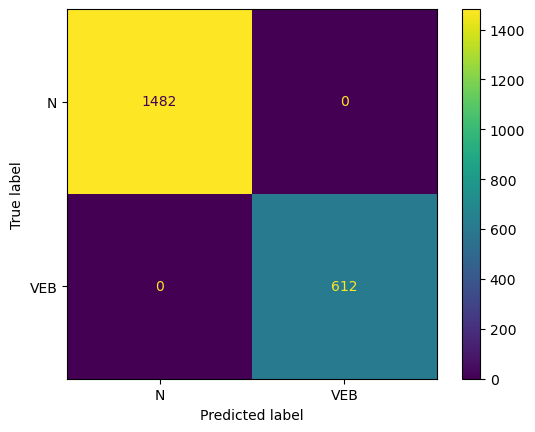

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [8]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_PCA, acc_PCA,confusion_matrix_final,list_fscore = cross_valid(pipe_smote_PCA, skf, X, y,groups)
end_time=time.time()

In [9]:
df_PCA

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.927160   0.322954    0.629596     0.572556      0.907518
precision     0.980958   0.217855    0.563102     0.589558      0.965537
recall        0.897356   0.571084    0.768587     0.664545      0.881068
support    3099.572115  90.248780  236.333333  3420.307692   3420.307692

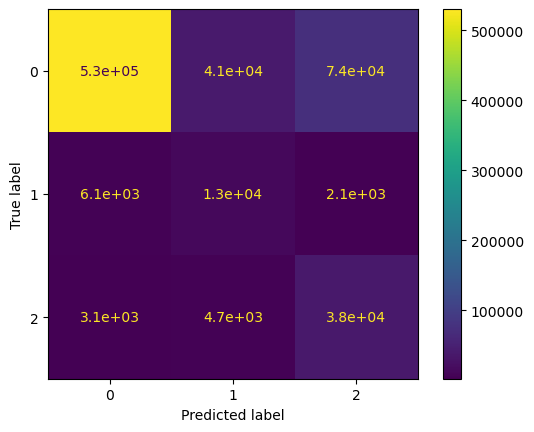

In [11]:
ConfusionMatrixDisplay(confusion_matrix_final).plot()

In [12]:
list_fscore

{'patient0': {'0.0': 0.9852641124461574,
  '1.0': 0.4444444444444444,
  '2.0': 0.2857142857142857,
  'macro avg': 0.5718076142016292,
  'weighted avg': 0.9771009967459864},
 'patient1': {'0.0': 0.8973902728351127,
  '1.0': 0.07058823529411765,
  'macro avg': 0.3226595027097435,
  'weighted avg': 0.8960581535479898},
 'patient2': {'0.0': 0.9863614223088163,
  '1.0': 0.0,
  'macro avg': 0.3287871407696054,
  'weighted avg': 0.9854143638140407},
 'patient3': {'0.0': 0.9574731626754749,
  '2.0': 0.36283185840707965,
  'macro avg': 0.4401016736941849,
  'weighted avg': 0.9479718791700174},
 'patient4': {'0.0': 0.9861660079051382,
  '2.0': 0.8132118451025057,
  'macro avg': 0.5997926176692147,
  'weighted avg': 0.9417750085678386},
 'patient5': {'0.0': 0.6875471698113208,
  '1.0': 0.0,
  '2.0': 0.04287515762925599,
  'macro avg': 0.24347410914685894,
  'weighted avg': 0.679757617034991},
 'patient6': {'0.0': 0.9264199655765921,
  '2.0': 0.1546134663341646,
  'macro avg': 0.36034447730358554,

In [13]:
import json

# export the dictionary to a JSON file
with open('KNN_complete.json', 'w') as f:
    json.dump(list_fscore, f)

In [14]:
print("Time"+str(end_time-start_time))

Time4394.012223958969


In [29]:
vector_patient=[]
for i in groups:
    vector_patient.append(i)
vector_patient

vector=[]
for i in vector_patient:
    if(i in vector):
        continue
    else:
        vector.append(i)

In [30]:
vector

[133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 1,
 4,
 5,
 6,
 8,
 10,
 11,
 12,
 14,
 15,
 17,
 19,
 21,
 23,
 24,
 25,
 26,
 27,
 32,
 34,
 37,
 39,
 0,
 2,
 3,
 7,
 9,
 13,
 16,
 18,
 20,
 22,
 28,
 29,
 30,
 31,
 33,
 35,
 36,
 38,
 40,
 41,
 42,
 43,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 

In [35]:
len(vector)

208

In [36]:
vector=np.array(vector)

In [37]:
vector

array([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
       146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207,   1,   4,   5,
         6,   8,  10,  11,  12,  14,  15,  17,  19,  21,  23,  24,  25,
        26,  27,  32,  34,  37,  39,   0,   2,   3,   7,   9,  13,  16,
        18,  20,  22,  28,  29,  30,  31,  33,  35,  36,  38,  40,  41,
        42,  43,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 11

In [41]:
vector[74+43]

42